# DSE Dissertation

## Topic Analysis

In [1]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [2]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 128290 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-37ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-37ubuntu0.1) ...
Setting up w3m (0.5.3-37ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [ ]:
# Mount Google Drive to access required files

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

#### Load Packages

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sn
from wordcloud import WordCloud
import re
import spacy
import codecs
import csv
import sys

In [4]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [5]:
!pip install Unidecode
import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.4 MB/s eta 0:00:00


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

In [7]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.3 MB/s eta 0:00:00


In [8]:
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Input, GlobalAveragePooling1D, Dropout, LSTM
from keras.initializers import he_normal
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

#### Load Dataset

In [ ]:
"""

Loading dataset

"""

class UtteranceExample:
    def __init__(self, text, label, do_lower_case):
        self.original_text = text
        self.text = text
        self.label = label

        if do_lower_case:
            self.text = self.text.lower()

    def to_dict(self):
      return {
          'utterance': self.original_text,
          'intent': self.label,
      }
        
def load_utterance_examples(file_path, do_lower_case=True):
    examples = []

    with open('{}/seq.in'.format(file_path), 'r', encoding="utf-8") as f_text, open('{}/label'.format(file_path), 'r', encoding="utf-8") as f_label:
        for text, label in zip(f_text, f_label):
            e = UtteranceExample(text.strip(), label.strip(), do_lower_case)
            examples.append(e)

    return examples



##### Load sample dataset

In [9]:
SAMPLE_DATASET_PATH = "/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/train"
corpus_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/train/seq.in"


In [ ]:
data = load_utterance_examples(SAMPLE_DATASET_PATH, False)

utterances= pd.DataFrame.from_records([d.to_dict() for d in data])

utterances = utterances.sample(frac=1).reset_index(drop=True)

with pd.option_context('expand_frame_repr', False):
    print (utterances)
#print(utterances.head())

                                              utterance                    intent
0     why is a payment i made reverted back to my ac...    reverted_card_payment?
1                  are these cards available in europe?           country_support
...                                                 ...                       ...
8620  i have tried a couple of times to make a purch...         declined_transfer
8621   why was i blocked from withdrawing from the atm?  declined_cash_withdrawal

[8622 rows x 2 columns]


##### Load Actual dataset

In [10]:
ACTUAL_DATASET_PATH = "/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/train/Topic_Analysis_Data.csv"
corpus_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/train/Topic_Analysis_Data.csv"

In [11]:
utterances = pd.read_csv(ACTUAL_DATASET_PATH)

utterances.head()

utterances = utterances.sample(frac=1).reset_index(drop=True)

with pd.option_context('expand_frame_repr', False):
    print (utterances)

                  intent                                          utterance
0             zelle_send          I think we sent that to the wrong person.
1             zelle_send                       make it to her email address
2       change_acct_info                                          Log in id
3           cash_advance   what is my cash advance amount on my credit card
4           acct_balance             when do you want the increase to start
...                  ...                                                ...
14675  suspected_dispute                           unauthorized payment why
14676         zelle_send                          Instead send it on Dec 26
14677    budget_insights                     can you help me with budgeting
14678    creditscore_faq  So my credit card has no interest until next y...
14679   get_transactions          and now the ones on lighter fluidÂ please

[14680 rows x 2 columns]


### Exploratory Data Analysis

In [12]:
utterances.shape

(14680, 2)

In [13]:
utterances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14680 entries, 0 to 14679
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   intent     14680 non-null  object
 1   utterance  14680 non-null  object
dtypes: object(2)
memory usage: 229.5+ KB


In [14]:
utterances.describe()

intent                 utterance
count              14680                     14680
unique                32                     12410
top     get_transactions  emily's bill pay account
freq                2373                         8

In [15]:
utterances.dropna(axis=0,inplace=True)#dropping na
utterances.shape

(14680, 2)

In [16]:
utterances.drop_duplicates(subset=['utterance'],inplace=True)#dropping duplicates
utterances.shape

(12410, 2)

In [17]:
#Look for missing intents
utterances['intent'].isnull().sum()

0

In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

type_counts_train = utterances['intent'].value_counts(sort=True, ascending=True)

#Another way of printing the values.
#print(pd.DataFrame({'count' : utterances.groupby( [ "intent"] ).size()}).reset_index().sort_values('count'))

print(type_counts_train)

"""

It shows that the utterances per intent are imbalanced.

TOTAL OF 77 INTENT CLASSES

"""
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 5)

add_external_account        5
balance_forecast           12
balance_transfer           17
card_on_off                37
card_activation            43
log_out                    57
simplified_refund          62
auto_pay                   71
money_brief                98
interest_rates            100
login_troubleshooting     103
creditscore_faq           133
cash_advance              146
appointment_schedular     151
co_browse                 155
credit_score              191
bill_pay                  194
branch_atm_locator        223
stop_payment              233
payoff_quote              237
change_acct_info          245
declined_transaction      280
credit_card_sales         281
budget_insights           378
agent_routing             434
upcoming_bills            502
suspected_dispute         628
acc_routing               743
transfers                1155
acct_balance             1514
zelle_send               1610
get_transactions         2372
Name: intent, dtype: int64


### Data Pre-processing.
- Profanity Removal.
- Spelling correction.
- Remove Punctuation.
- Remove stop words.
- Tokenization.
- Lemmatization.


##### Profanity removal.

In [19]:
!pip install better_profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 KB 2.4 MB/s eta 0:00:00


In [20]:
from better_profanity import profanity

In [21]:
def censored_correction(text):
  if(profanity.contains_profanity(text)):
    return profanity.censor(text)
  else:
    return text

In [22]:
corrected_utterances = []

for t in utterances['utterance']:
    corrected_utterances.append(censored_correction(t))

corrected_utterances[:5]
utterances['utterance'] = corrected_utterances
utterances.head()

intent                                         utterance
0        zelle_send         I think we sent that to the wrong person.
1        zelle_send                      make it to her email address
2  change_acct_info                                         Log in id
3      cash_advance  what is my cash advance amount on my credit card
4      acct_balance            when do you want the increase to start

##### Spelling correction.

In [23]:
! pip install -U symspellpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 KB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.3-cp39-cp39-linux_x86_64.whl size=141225 sha256=ae0087ce91cf135bc9c9a50428d45873fc63dd5eb1b524d1b548d745b16c2f6e
  Stored in directory: /root/.cache/pip/wheels/72/16/b1/ea6472dedd6ac13ad789dd294871a76fd6906fca3c010347d1
Successfully built editdistpy


In [24]:
#Spelling correction using Symspell.

from symspellpy import SymSpell, Verbosity
import pkg_resources
from itertools import islice

##### Creating a dictionary out of dataset

In [25]:
# Initialise Symspell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7, count_threshold=2)

In [26]:
banking_terms = "/content/drive/MyDrive/Dissertation/Topic_Analysis/banking_dict.txt"
banking_dict = sym_spell.create_dictionary(banking_terms, encoding='utf-8')
banking_dict

True

In [27]:
corpus_dict = sym_spell.create_dictionary(corpus_path, encoding='utf-8')
corpus_dict

True

In [28]:
loc_corpus_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/us_cities_states_counties.csv"
loc_corpus_text_unigram = "/content/drive/MyDrive/Dissertation/Topic_Analysis/us_cities_states_counties_unigram.txt"
loc_corpus_text_bigram = "/content/drive/MyDrive/Dissertation/Topic_Analysis/us_cities_states_counties_bigram.txt"

In [29]:
def removeDuplicates(fileName):
  f = open(fileName, 'r')
  lines = set(f.readlines())
  f.close()
  a = open(fileName, 'w')
  a.writelines(lines)
  a.close()


In [30]:
def getUSCitiesStateCountyLists():
  file_unigram = open(loc_corpus_text_unigram, 'w')
  file_bigram = open(loc_corpus_text_bigram, 'w')
  infile = open(loc_corpus_path, mode='r', newline='')
  reader = csv.DictReader(infile)
  header = next(reader)  # store the headers and advance reader pointer
  for rows in reader:
    row_val = rows['City|State short|State full|County|City alias']
    divided_row = row_val.split('|')
    #print(divided_row)
    if len(divided_row) >= 1:
      city_name = divided_row[0]
      if len(city_name.split()) > 1:
        file_bigram.write(city_name.title()+'\n')
      else:
        file_unigram.write(city_name.title()+'\n')

      if len(divided_row) >= 3:
        state_full = divided_row[2]
        if len(state_full.split()) > 1:
          file_bigram.write(state_full.title()+'\n')
        else:
          file_unigram.write(state_full.title()+'\n')

        if len(divided_row) >= 4:
          county = divided_row[3]
          if len(county.split()) > 1:
            file_bigram.write(county.title()+'\n')
          else:
            file_unigram.write(county.title()+'\n')
  file_unigram.close()
  file_bigram.close()
  infile.close()
  removeDuplicates(loc_corpus_text_unigram)
  removeDuplicates(loc_corpus_text_bigram)

In [31]:
getUSCitiesStateCountyLists()

In [32]:
#Load USA location Gazetteer as dictionary to sym_spell
loc_corpus_dict = sym_spell.create_dictionary(loc_corpus_text_unigram, encoding='utf-8')
print(loc_corpus_dict)
loc_corpus_dict = sym_spell.create_dictionary(loc_corpus_text_bigram, encoding='utf-8')
print(loc_corpus_dict)

True
True


In [33]:
# Load the dictionaries provided by library

#dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")
dictionary_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/en-80k.txt"

# term_index is the column of the term and count_index is the
# column of the term frequency
#sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

suggestions = sym_spell.lookup("Parking", Verbosity.CLOSEST, max_edit_distance=2, transfer_casing=True)
for suggestion in suggestions:
    print(suggestion)

# Print out first 5 elements to demonstrate that dictionary is
# successfully loaded
#print(list(islice(sym_spell.bigrams.items(), 5)))
#print(list(islice(sym_spell.words.items(), 5)))

# lookup suggestions for multi-word input strings (supports compound
# splitting & merging)
input_term = (
    "I want to do Chhheecking Parking in US auto pya with Zelle on my crad in New Yrok routing Modify 282.72 out of reserve checking that needs to be sent to 6122033390 my IRA account"
)
# max edit distance per lookup (per single word, not per whole input string)
suggestions = sym_spell.lookup_compound(input_term, max_edit_distance=2, ignore_non_words=True, transfer_casing=True, ignore_term_with_digits=True)
# display suggestion term, edit distance, and term frequency
for suggestion in suggestions:
    print(suggestion)

def spell_correction(input_term, max_edit_distance=2):
  suggestions = sym_spell.lookup_compound(input_term, max_edit_distance=2, ignore_non_words=True, transfer_casing=True, ignore_term_with_digits=True)
  #for suggestion in suggestions:
  #  print(suggestion.term)
  return suggestions[0].term

Parking, 0, 2
I want to do THE Checking Parking in US auto pay with Zelle on my card in New YOrk routing Modify 282 72 out of reserve checking that needs to be sent to 6122033390 my IRA account, 11, 0


In [34]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

##### Preprocessing using regular expression.

In [ ]:
stop_words = set(stopwords.words('english')) 

# Text cleanup using regex
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)   # removing special characters
    newString = re.sub('"','', newString)              # removing '"' 
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    # replacing slangs
    newString = re.sub(r"'s\b","",newString)    # replacing 's with "" '
    newString = re.sub("[^a-z]", " ", newString)    #only keeping letters
    newString = re.sub('[m]{2,}', 'mm', newString)    # "mmmmmm" -> "mm"
        
    tokens = [w for w in newString.split() if not w in stop_words]     # removing the stopwords

    long_words=[]
    for i in tokens:
        if len(i)>1:                               #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

    
#Lemmatization

def lemma(tokenized_text):
  wordnetLemmatizer = nltk.WordNetLemmatizer()
  text = [wordnetLemmatizer.lemmatize(word) for word in tokenized_text]
  return (" ".join(text)).strip()

In [ ]:
#call the function text_cleaner if you want to use text pre-processing using text_cleaner method.
cleaned_text = []
for t in utterances['utterance']:
    cleaned_text.append(text_cleaner(t)) 

utterances['cleaned_utterance'] = cleaned_text
utterances['lemmatized_utterance'] = utterances['cleaned_utterance'].apply(lambda x: lemma(x.split(" ")))

#Drop empty rows
utterances.replace('', np.nan, inplace=True)
utterances.dropna(axis=0,inplace=True)

utterances.head()

##### Pre-processing using Spacy

In [35]:
# Text cleanup and lemmatization combined using Spacy

nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)
print(nlp.pipe_labels['ner'])

def spacy_get_parsed_doc(text):
  try:
        decoded_text = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
  except:
        decoded_text = unidecode.unidecode(text)

  apostrophe_handled = re.sub("’", "'", decoded_text)
  apostrophe_s_handled = re.sub(r"'s\b","",apostrophe_handled)
  expanded_text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
  parsed = nlp(expanded_text)
  return parsed


def spacy_text_preprocessor(text):
  parsed = spacy_get_parsed_doc(text)
  final_tokens = []
  allow_postags = set(['NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'])
  # print(parsed)
  # for ent in parsed.ents:
  #   print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

  for t in parsed:
      #print(t.text, t.lemma_, t.pos_, t.tag_, t.dep_,t.shape_, t.is_alpha, t.is_stop)
      if t.is_punct or t.is_space or t.like_url or str(t).startswith('@'):
          pass
      else:
          if t.lemma_ == '-PRON-' or t.pos_ == 'NUM' or t.pos_ == 'NOUN' or t.pos_ == 'SYM':
              final_tokens.append(str(t))
          else:
              if t.pos_ == 'VERB':
                lemm = str(t.lemma_)
              else:
                lemm = str(t)
              specialchar_removed = re.sub("[^a-zA-Z0-9]", '', lemm)
              if len(specialchar_removed) > 1:
                  final_tokens.append(specialchar_removed)

  joined_str = ' '.join(final_tokens)
  text_corrected = re.sub(r'(.)\1+', r'\1\1', joined_str)
  return text_corrected

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [36]:
print(spacy_text_preprocessor("Modify 282.72 out of reserve checking my IRA account"))

modify 282.72 out of reserve check my IRA account


In [37]:
# get entities using Spacy

def getEntities(text):
  parsed = spacy_get_parsed_doc(text)
  return parsed.ents

In [38]:
# call the function spell_correction

corrected_utterances = []

for t in utterances['utterance']:
    corrected_utterances.append(spell_correction(t)) 

utterances['lemmatized_utterance'] = corrected_utterances
utterances.head()

intent                                         utterance  \
0        zelle_send         I think we sent that to the wrong person.   
1        zelle_send                      make it to her email address   
2  change_acct_info                                         Log in id   
3      cash_advance  what is my cash advance amount on my credit card   
4      acct_balance            when do you want the increase to start   

                               lemmatized_utterance  
0          I think we sent that to the wrong person  
1                      make it to her email address  
2                                         Log in id  
3  what is my cash advance amount on my credit card  
4            when do you want the increase to start

In [39]:

utterances['lemmatized_utterance']= [spacy_text_preprocessor(t) for t in utterances['lemmatized_utterance']]
utterances.head()

intent                                         utterance  \
0        zelle_send         I think we sent that to the wrong person.   
1        zelle_send                      make it to her email address   
2  change_acct_info                                         Log in id   
3      cash_advance  what is my cash advance amount on my credit card   
4      acct_balance            when do you want the increase to start   

                               lemmatized_utterance  
0            think we send that to the wrong person  
1                      make it to her email address  
2                                            log in  
3  what is my cash advance amount on my credit card  
4            when do you want the increase to start

##### Using Named Entity Recognition

In [40]:
# Using either Spacy NER to get the Named Entities from the dataset.

utterances['entities'] = [getEntities(t) for t in utterances['utterance']]
utterances.head()

intent                                         utterance  \
0        zelle_send         I think we sent that to the wrong person.   
1        zelle_send                      make it to her email address   
2  change_acct_info                                         Log in id   
3      cash_advance  what is my cash advance amount on my credit card   
4      acct_balance            when do you want the increase to start   

                               lemmatized_utterance entities  
0            think we send that to the wrong person       ()  
1                      make it to her email address       ()  
2                                            log in       ()  
3  what is my cash advance amount on my credit card       ()  
4            when do you want the increase to start       ()

In [ ]:
# method to preprocess single utterance

def preprocess_utterance(text):
  censored_corrected = censored_correction(text)
  #print(censored_corrected)
  spell_corrected = spell_correction(censored_corrected)
  #print(spell_corrected)
  spacy_preprocessed = spacy_text_preprocessor(spell_corrected)
  return spacy_preprocessed


In [ ]:
print(preprocess_utterance("#$#%%@@ transfer via Zelle Fuck"))
print(getEntities("transfer via Zelle"))

transfer via Zelle
(Zelle,)


In [ ]:
print(preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?"))
print(getEntities("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?"))

hello am bank home mortgage customer and want to know if there will be short age or over age on my escrow at the end of this year
(u.s., the end of this year)


### Using WordCloud, display the frequent words in specific intent category

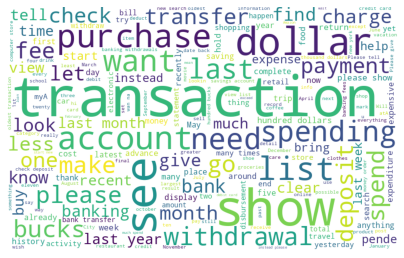

In [ ]:
## word cloud for highest count for intent = 'card_payment_fee_charged'

intent_text = ""
for t in utterances[utterances['intent'] == 'get_transactions']['lemmatized_utterance']:
    intent_text += t +" "
wordCloud = WordCloud(width=800, height=500, background_color='white').generate(intent_text)
plt.figure(figsize=(7,7))
plt.imshow(wordCloud)
plt.axis("Off")
plt.show()

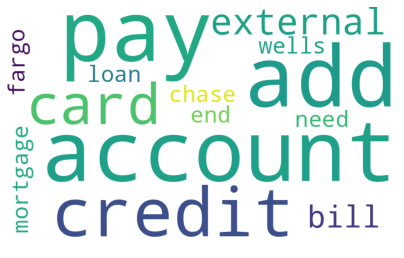

In [ ]:
## word cloud for lowest count intent = 'contactless_not_working	'

intent_text = ""
for t in utterances[utterances['intent'] == 'add_external_account']['lemmatized_utterance']:
    intent_text += t +" "
wordCloud = WordCloud(width=800, height=500, background_color='white').generate(intent_text)
plt.figure(figsize=(7,7))
plt.imshow(wordCloud)
plt.axis("Off")
plt.show()

### Label Encode the class label i.e. 'intent' column

In [ ]:
from sklearn import preprocessing

labelEncoding = preprocessing.LabelEncoder()
utterances['intent_labelEncoded'] = labelEncoding.fit_transform(utterances['intent']) 
utterances.head()

intent                                          utterance  \
0    upcoming_bills  How can I check my overdue bill for past days ...   
1  get_transactions         can i see banking transactions above 9.5 ?   
2  get_transactions  What is my list for the fees i made on Home Depot   
3        zelle_send                          send money to dave verner   
4      acct_balance             Show me transaction through December ?   

                                lemmatized_utterance                entities  \
0  How can check my overdue bill for past days fo...  ((past, days), (3534))   
1             can see banking transactions above 9 5                ((9.5),)   
2    What is my list for the fees make on Home Depot        ((Home, Depot),)   
3                          send money to dave verner                      ()   
4               show me transaction through December           ((December),)   

   intent_labelEncoded  
0                   30  
1                   20  
2                   20  
3                   31  
4                    1

##### Preparing Test Data

In [ ]:
data = load_utterance_examples("/content/drive/MyDrive/Dissertation/Topic_Analysis/dataset/BANKING77/test", False)
test_utterances= pd.DataFrame.from_records([d.to_dict() for d in data])
print(test_utterances.head())

                                           utterance        intent
0                           how do i loacte my card?  card_arrival
1  i still have not received my new card, i order...  card_arrival
2  i ordered a card but it has not arrived. hlep ...  card_arrival
3   is there a wya to know when my card will arrive?  card_arrival
4                       my card has not arrived yet.  card_arrival


In [ ]:
test_utterances.shape

(3080, 2)

In [ ]:
# Preprocess test data
X_test_testdata = test_utterances['utterance'][:3080]
X_test_testdata.shape

(3080,)

In [ ]:
y_test_testdata = test_utterances['intent'][:3080]
y_test_testdata.shape

(3080,)

#### Classification Report

##### Method to display confusion matrix for the model evaluation.

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
  y_labels = np.unique(y_test)
  cm = confusion_matrix(y_test, y_pred, labels=y_labels)
  cm_df = pd.DataFrame(cm, index=y_labels, columns=y_labels)
  cm_df.index.name= "Actual"
  cm_df.columns.name = "Predicted"
  fig, ax = plt.subplots(1, 1, figsize=(50, 50))
  sn.heatmap(cm_df, annot=True, ax=ax, linewidth=0.5, cmap="crest")
  plt.title("Confusion Matrix")
  plt.show()


##### Method to print total TP, FP, TN, FN

In [ ]:
def print_total_values(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
  TP = (np.diag(cm)).astype(float)
  FP = (cm.sum(axis=0) - np.diag(cm)).astype(float)
  FN = cm.sum(axis=1) - np.diag(cm).astype(float)
  TN = cm.sum() - (FP + FN + TP).astype(float)

  print(f"Total True Positives : ",np.sum(TP))
  print(f"Total False Positives : ",np.sum(FP))
  print(f"Total True Negatives : ",np.sum(TN))
  print(f"Total False Negatives : ",np.sum(FN))


##### Print TP, FP, TN, FN as part of classification report

In [ ]:
def multiclass_classification_report(y_test, y_pred):
    conf_labels = None
    
    conf_mat = multilabel_confusion_matrix(y_test, y_pred, labels=conf_labels)
    report = dict()
    counter = np.unique(y_test)
        
    for i, name in enumerate(counter):
        TN, FP, FN, TP = conf_mat[i].ravel()
        report[name] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}
    
    return pd.DataFrame(report)


In [ ]:
RESULT_FILE_PATH = "/content/drive/MyDrive/Dissertation/Topic_Analysis/result/"

In [ ]:
def display_comprehensive_result(X_test, y_test, y_pred, classifier_name):
  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)

  # Print the predicted intent for each utterance in X_test dataset
  # print(f" Utterance : Prediction")
  # res = "\n".join("{}:  {}".format(x, y) for x, y in zip(X_test, y_pred.tolist()))
  # #print(res)
  fileName = RESULT_FILE_PATH + classifier_name +".csv"
  X_test_df = pd.DataFrame(X_test)  
  X_test_df['intent'] = y_pred

  X_test_df.to_csv(fileName, index=False)
  
  #Print total TP, FP, TN, FN
  print_total_values(y_test, y_pred)

  # Add TP, TN, FP, FN as part of classification report
  display(multiclass_classification_report(y_test, y_pred))

  pd.set_option('display.max_rows', 5)
  pd.set_option('display.max_columns', 5)

### Model Building and testing using MultiNomialNB using Count Vectorizer and tf-idf Vectorizer


Model building using MultiNomialNB (Naive Bayes) Model and uni-gram CountVectorizer for Classification

Shape of X_train:  (9928,)
Shape of X_test:  (2482,)
Accuracy: 0.7526188557614827
F1 score: 0.7293668544720431


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

          acc_routing       0.77      0.77      0.77       147
         acct_balance       0.60      0.84      0.70       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.52      0.17      0.26        87
appointment_schedular       1.00      0.93      0.97        30
             auto_pay       0.71      0.36      0.48        14
     balance_forecast       0.00      0.00      0.00         2
     balance_transfer       0.00      0.00      0.00         4
             bill_pay       1.00      0.06      0.11        34
   branch_atm_locator       0.90      0.62      0.74        45
      budget_insights       0.92      0.89      0.91        76
      card_activation       0.00      0.00      0.00         9
          card_on_off       0.00      0.00      0.00         7
         cash_advance       0.96      0.83      0.89        29
     change_acct_info       0.58      0.52      0.55  

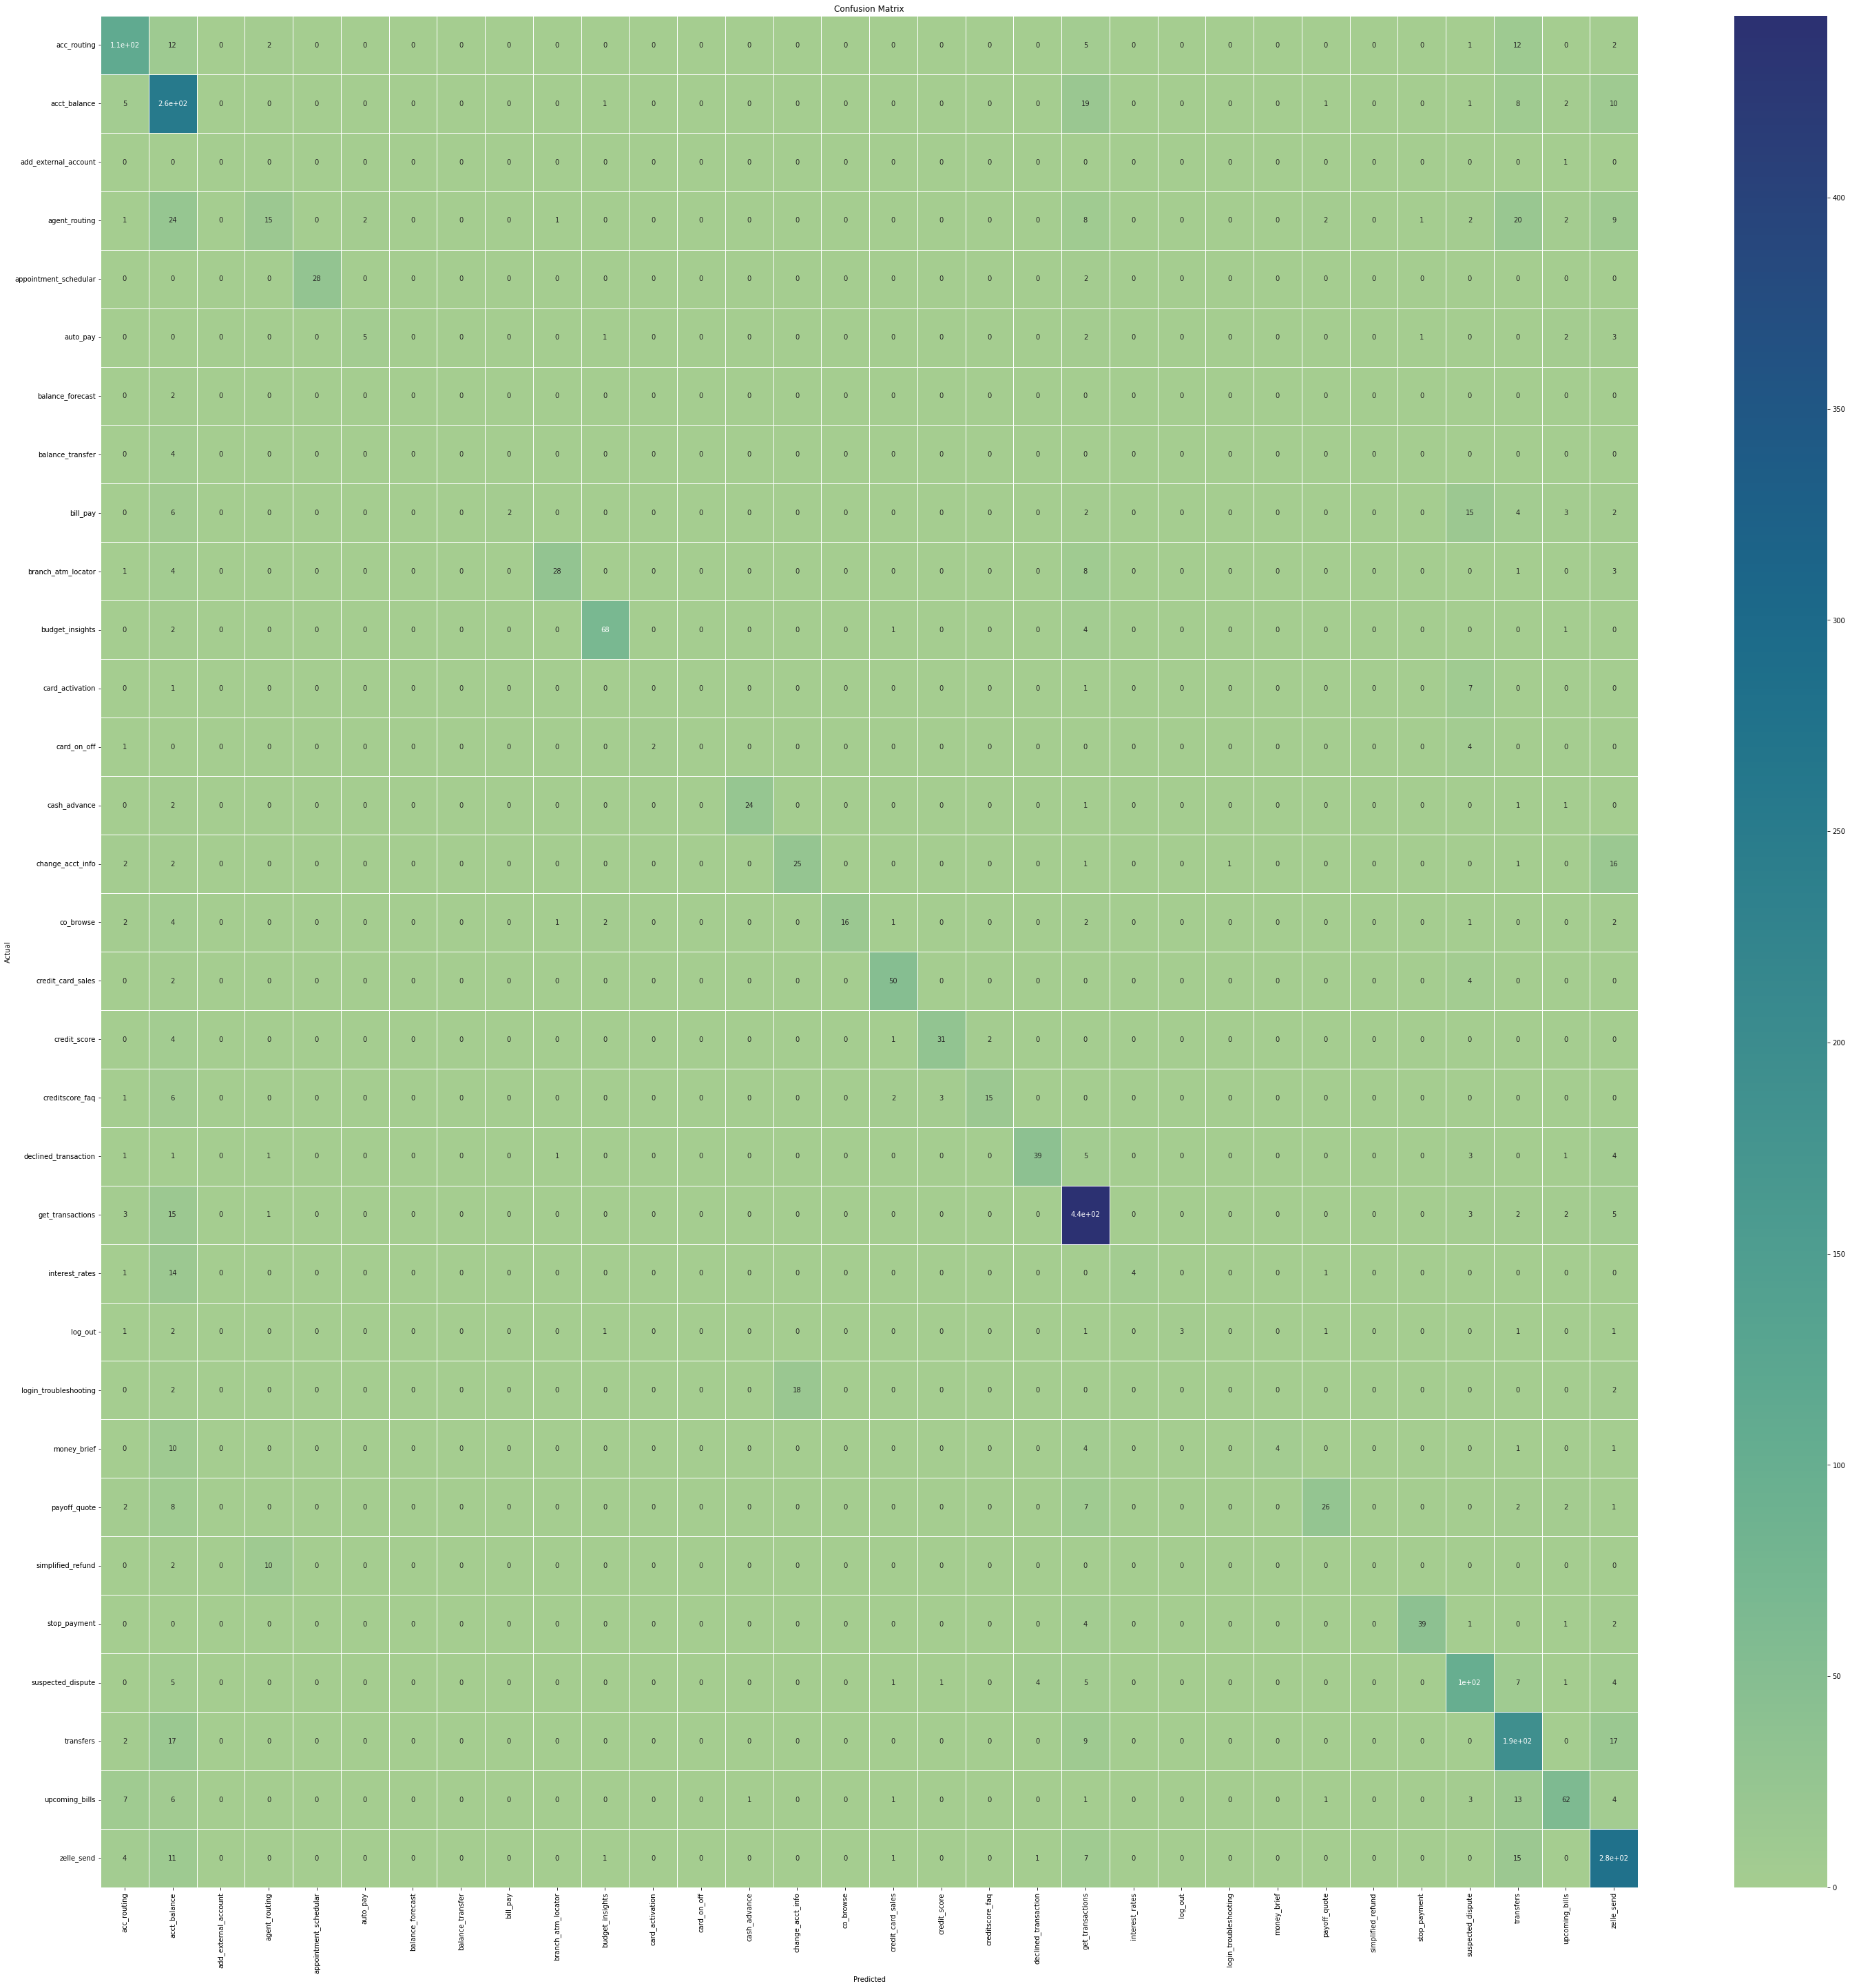

Total True Positives :  1868.0
Total False Positives :  614.0
Total True Negatives :  76328.0
Total False Negatives :  614.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          113           255                     0             15   
TN         2301          2012                  2481           2381   
FP           34           168                     0             14   
FN           34            47                     1             72   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     28         5                 0                 0   
TN                   2452      2466              2480              2478   
FP                      0         2                 0                 0   
FN                      2         9                 2                 4   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         2                  28               68                0   
TN      2448                2434             2400             2471   
FP         0                   3                6                2   
FN        32                  17                8                9   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            0            24                25         16                 50   
TN         2475          2452              2416       2451               2418   
FP            0             1                18          0                  8   
FN            7             5                23         15                  6   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            31               15                    39               443   
TN          2440             2453                  2421              1910   
FP             4                2                     5                98   
FN             7               12                    17                31   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP               4        3                      0            4            26   
TN            2462     2471                   2459         2462          2428   
FP               0        0                      1            0             6   
FN              16        8                     22           16            22   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            39                100        191   
TN               2470          2433               2309       2158   
FP                  0             2                 45         88   
FN                 12             8                 28         45   

    upcoming_bills  zelle_send  
TP              62         282  
TN            2364        2072  
FP              19          88  
FN              37          40

In [ ]:
"""
Now convert each message into a vector that machine learning models can understand.

"""

y = utterances['intent']
X = utterances['lemmatized_utterance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

# Initialize uni-gram CountVectorizer
vectorizer = CountVectorizer()
X_train_v = vectorizer.fit_transform(X_train.values)

# Display count of data samples for each intent in y_test
#display(y_test.value_counts(sort=True, ascending=True))

# Initalize MNB classifier and fit with features
count_vectorizer_unigram_MNB_model = MultinomialNB().fit(X_train_v, y_train)

#print(f"X_test utterances", X_test)
X_test_v = vectorizer.transform(X_test.values)

# get the predictions for X_test using pipeline object
y_pred = count_vectorizer_unigram_MNB_model.predict(X_test_v)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB1")


In [ ]:
preprocessed_utterance1 = preprocess_utterance("1234 account")
print(preprocessed_utterance1)
print(count_vectorizer_unigram_MNB_model.predict(vectorizer.transform([preprocessed_utterance1])))
print(getEntities(preprocessed_utterance1))

1234 account
['acct_balance']
(1234,)


In [ ]:
preprocessed_utterance2 = preprocess_utterance("i have a mobile transfer of $# and have no idea what it is for. can you help?")
print(preprocessed_utterance2)
print(count_vectorizer_unigram_MNB_model.predict(vectorizer.transform([preprocessed_utterance2])))
print(getEntities(preprocessed_utterance2))

have mobile transfer of and have no idea what it is for can you help
['get_transactions']
()


In [ ]:
preprocessed_utterance3 = preprocess_utterance("think i got scamed on ab internet purchase for  â§#.# purchase made on the # december, #.      what can you do to assist me in gettin ackour money?")
print(preprocessed_utterance3)
print(count_vectorizer_unigram_MNB_model.predict(vectorizer.transform([preprocessed_utterance3])))
print(getEntities(preprocessed_utterance3))

think got name on internet purchase for AC/ purchase make on the december what can you do to assist me in get in your money
['get_transactions']
(december,)


Model building using MultiNomialNB (Naive Bayes) Model and bi-gram CountVectorizer for Classification

Accuracy: 0.7292506043513296
F1 score: 0.7071783828924961
                       precision    recall  f1-score   support

          acc_routing       0.84      0.72      0.77       146
         acct_balance       0.61      0.87      0.72       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.62      0.15      0.24        89
appointment_schedular       1.00      0.83      0.91        30
             auto_pay       1.00      0.36      0.53        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.00      0.00      0.00         3
             bill_pay       1.00      0.14      0.24        29
   branch_atm_locator       1.00      0.38      0.55        45
      budget_insights       1.00      0.58      0.73        76
      card_activation       1.00      0.29      0.44         7
          card_on_off       0.33      0.11      0.17         9
         cash_advance       1.00      0.93      0.96       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


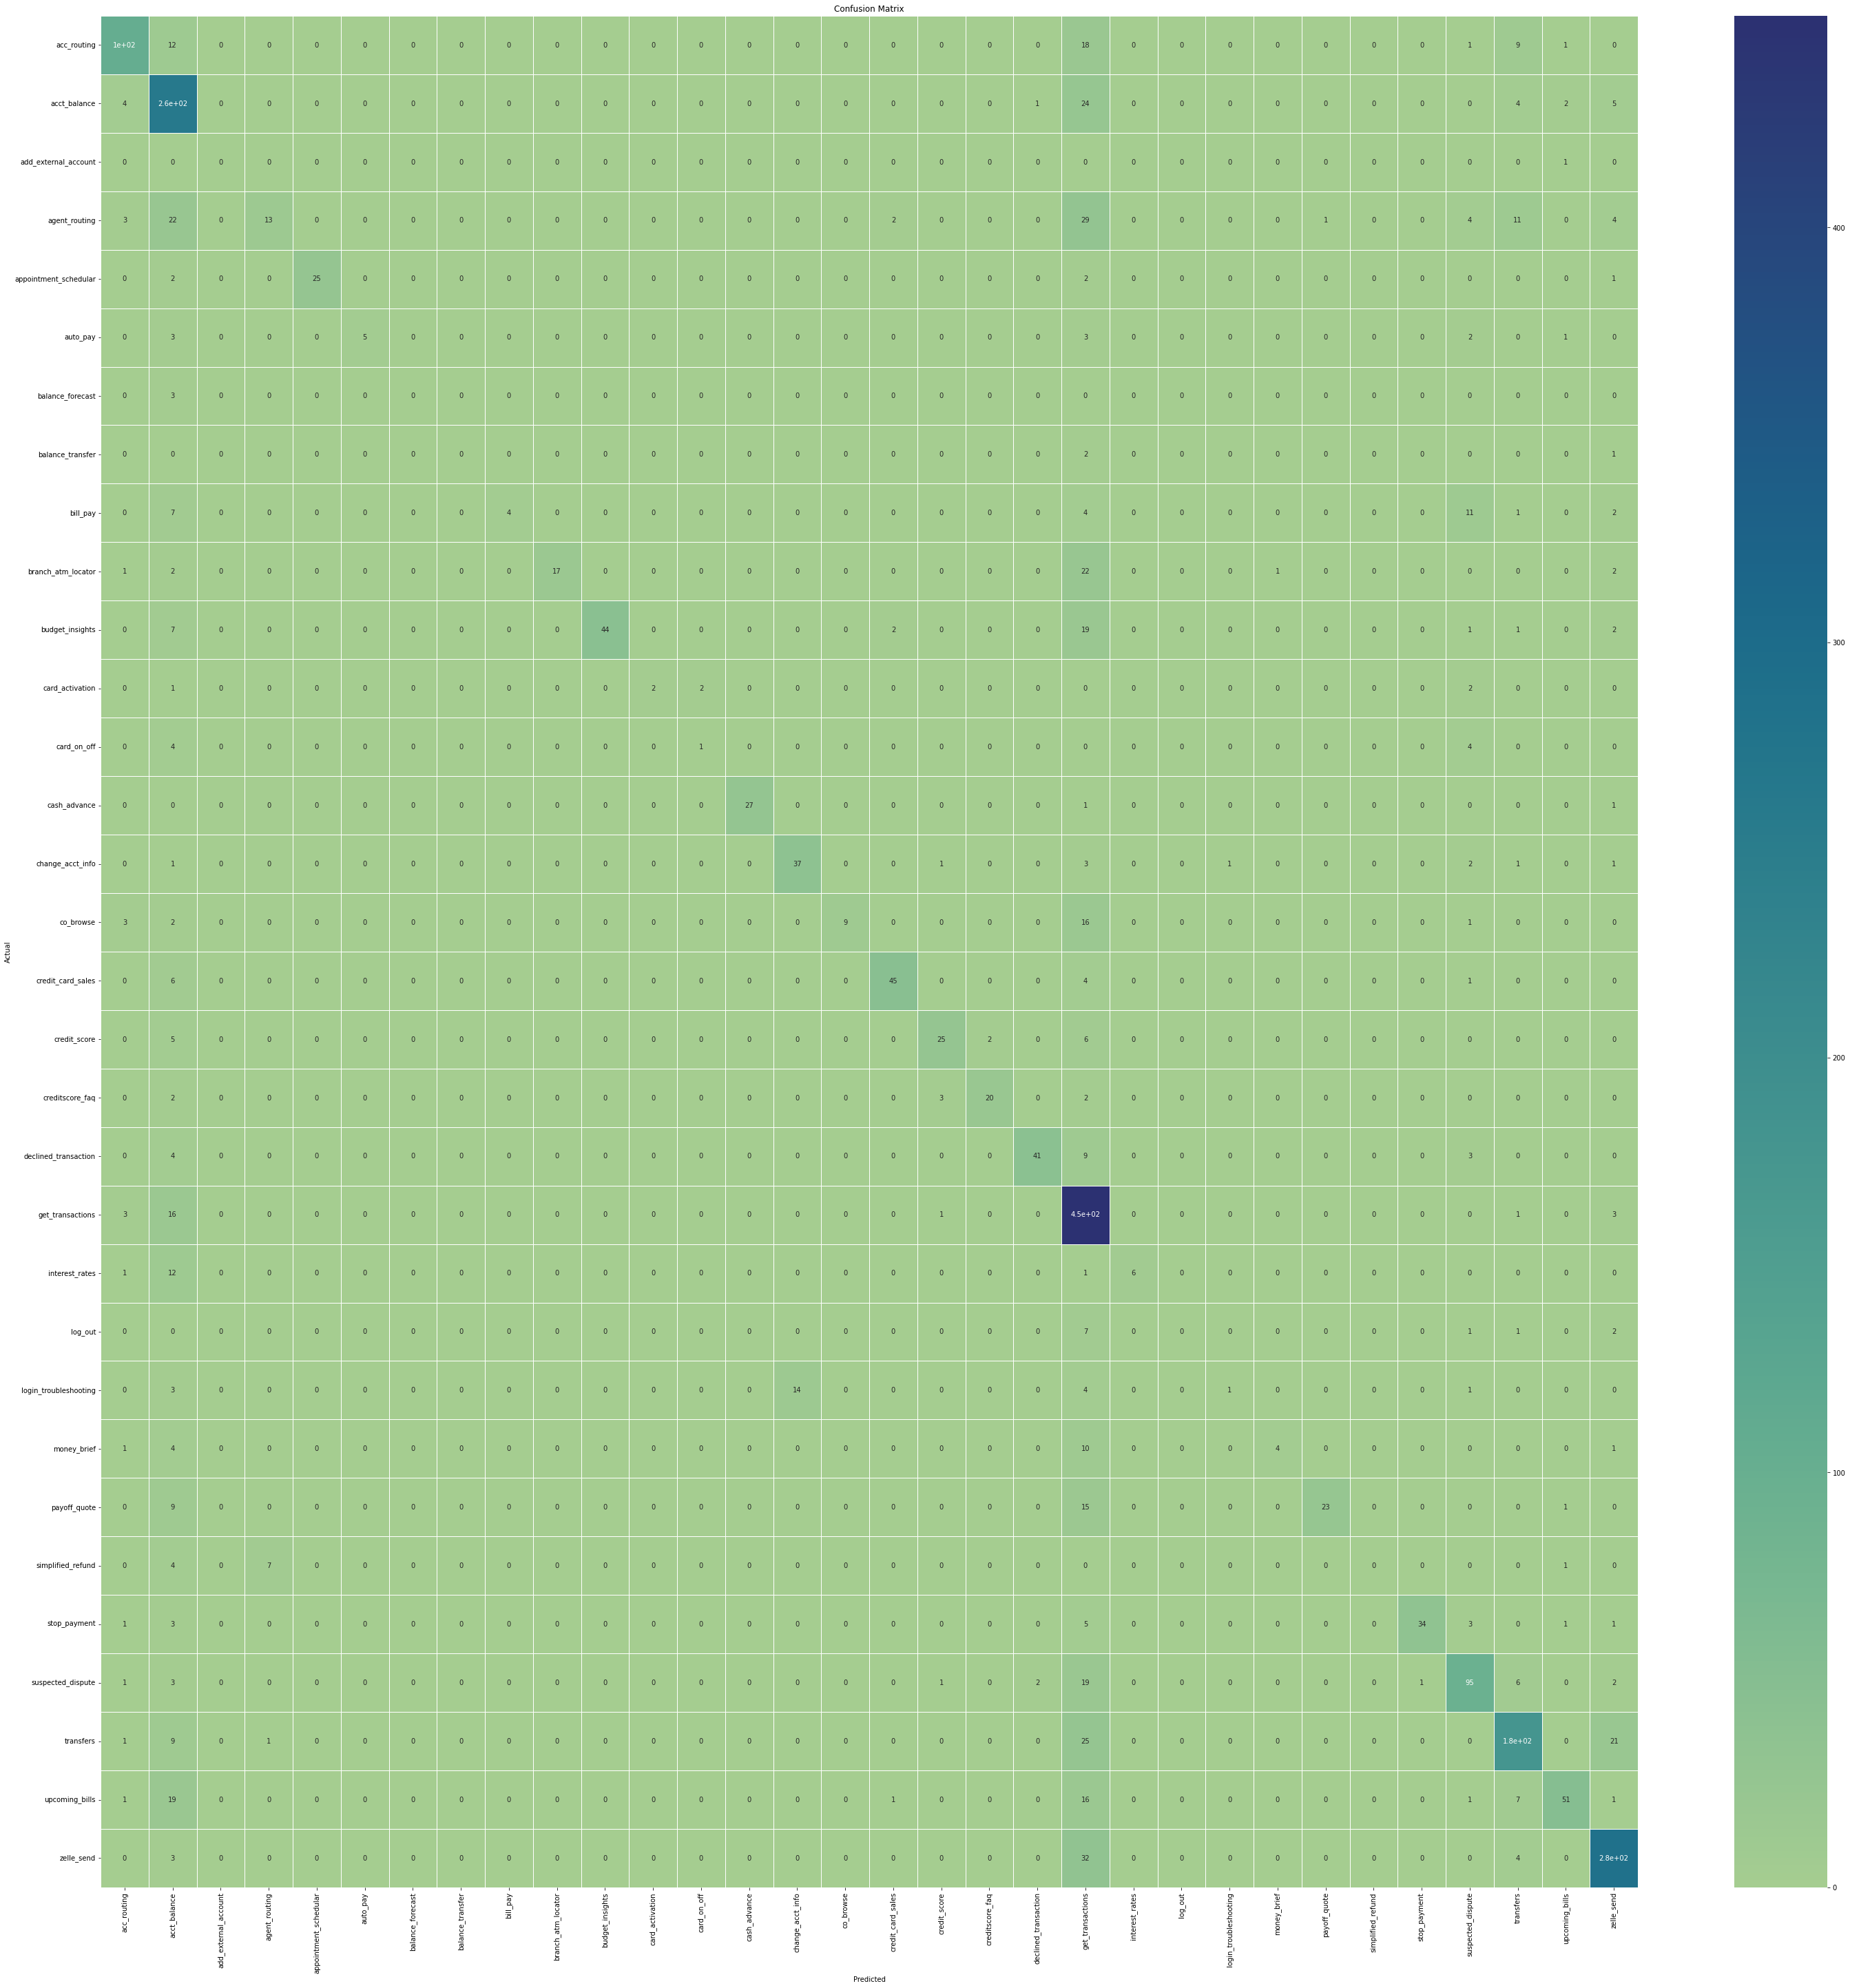

Total True Positives :  1810.0
Total False Positives :  672.0
Total True Negatives :  76270.0
Total False Negatives :  672.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          105           262                     0             13   
TN         2316          2012                  2481           2385   
FP           20           168                     0              8   
FN           41            40                     1             76   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     25         5                 0                 0   
TN                   2452      2468              2479              2479   
FP                      0         0                 0                 0   
FN                      5         9                 3                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         4                  17               44                2   
TN      2453                2437             2406             2475   
FP         0                   0                0                0   
FN        25                  28               32                5   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            1            27                37          9                 45   
TN         2471          2453              2421       2451               2421   
FP            2             0                14          0                  5   
FN            8             2                10         22                 11   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            25               20                    41               451   
TN          2438             2453                  2422              1709   
FP             6                2                     3               298   
FN            13                7                    16                24   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP               6        0                      1            4            23   
TN            2462     2471                   2458         2461          2433   
FP               0        0                      1            1             1   
FN              14       11                     22           16            25   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            34                 95        179   
TN               2470          2433               2314       2200   
FP                  0             1                 38         46   
FN                 12            14                 35         57   

    upcoming_bills  zelle_send  
TP              51         284  
TN            2377        2109  
FP               8          50  
FN              46          39

In [ ]:
# bi-gram CountVectorizer using pipeline approach

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Creating a pipeline object
count_vector_MNB_pipeline = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (2, 2))), 
     ('Multi NB', MultinomialNB())         
])
 
# fit with features
count_vector_MNB_pipeline.fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = count_vector_MNB_pipeline.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB2")

In [ ]:
print(count_vector_MNB_pipeline.predict([preprocess_utterance("ATM Card ending with 6847")]))
print(getEntities(preprocess_utterance("ATM Card ending with 6847")))

['acct_balance']
(ATM Card, 6847)


In [ ]:
print(count_vector_MNB_pipeline.predict([preprocess_utterance("my IRA account?")]))
print(getEntities(preprocess_utterance("my IRA account?")))

['acct_balance']
()


In [ ]:
print(count_vector_MNB_pipeline.predict([preprocess_utterance("see my IRA account?")]))
print(getEntities(preprocess_utterance("see my IRA account?")))

['get_transactions']
()


In [ ]:
print(count_vector_MNB_pipeline.predict([preprocess_utterance("Can I now see my IRA account?")]))
print(getEntities(preprocess_utterance("Can I now see my IRA account?")))

['get_transactions']
()


In [ ]:
print(count_vector_MNB_pipeline.predict([preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?")]))
print(preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?"))
print(getEntities(preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?")))

['get_transactions']
hello am bank home mortgage customer and want to know if there will be short age or over age on my escrow at the end of this year
(hello am bank, the end of this year)


Model building using MultiNomialNB (Naive Bayes) Model and uni-gram and bi-gram CountVectorizer for Classification

Accuracy: 0.7691377921031426
F1 score: 0.7476472449940225
                       precision    recall  f1-score   support

          acc_routing       0.80      0.82      0.81       146
         acct_balance       0.58      0.89      0.70       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.64      0.18      0.28        89
appointment_schedular       0.96      0.90      0.93        30
             auto_pay       1.00      0.71      0.83        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.00      0.00      0.00         3
             bill_pay       1.00      0.03      0.07        29
   branch_atm_locator       1.00      0.67      0.80        45
      budget_insights       0.96      0.84      0.90        76
      card_activation       0.00      0.00      0.00         7
          card_on_off       0.75      0.33      0.46         9
         cash_advance       0.95      0.66      0.78       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


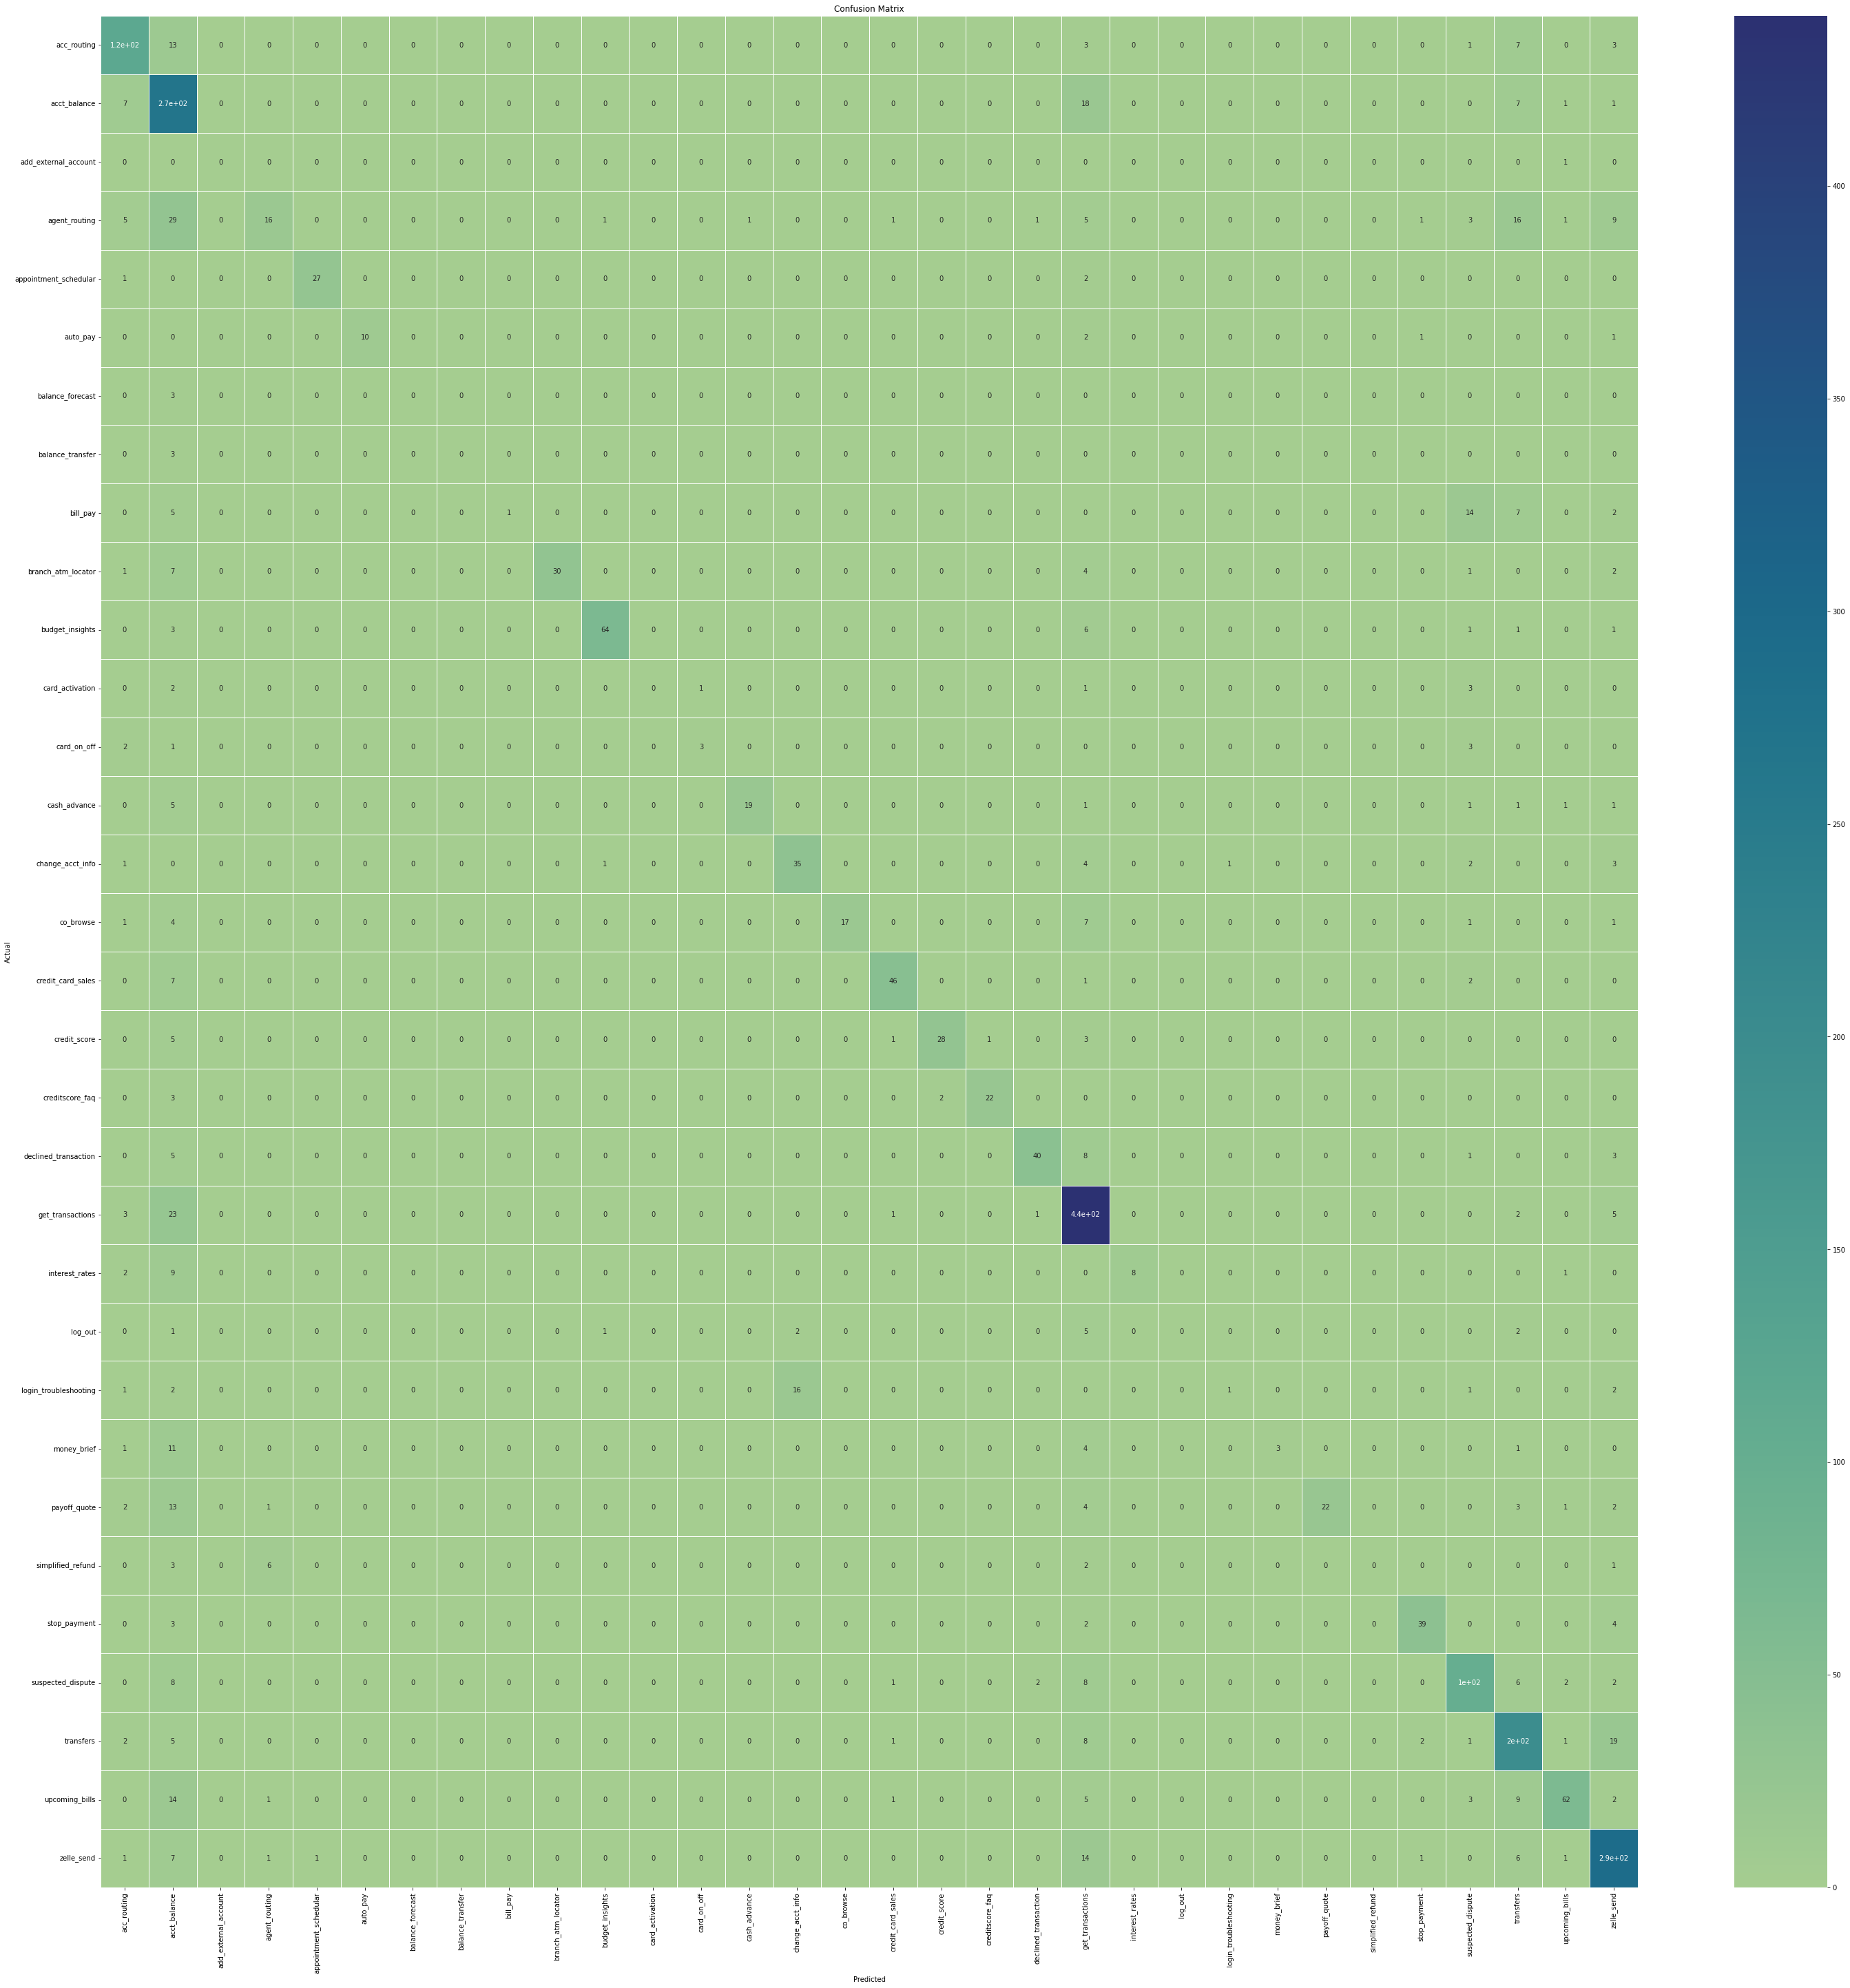

Total True Positives :  1909.0
Total False Positives :  573.0
Total True Negatives :  76369.0
Total False Negatives :  573.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          119           268                     0             16   
TN         2306          1986                  2481           2384   
FP           30           194                     0              9   
FN           27            34                     1             73   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     27        10                 0                 0   
TN                   2451      2468              2479              2479   
FP                      1         0                 0                 0   
FN                      3         4                 3                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         1                  30               64                0   
TN      2453                2437             2403             2475   
FP         0                   0                3                0   
FN        28                  15               12                7   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            3            19                35         17                 46   
TN         2472          2452              2417       2451               2420   
FP            1             1                18          0                  6   
FN            6            10                12         14                 10   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            28               22                    40               440   
TN          2442             2454                  2421              1890   
FP             2                1                     4               117   
FN            10                5                    17                35   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP               8        0                      1            3            22   
TN            2462     2471                   2458         2462          2434   
FP               0        0                      1            0             0   
FN              12       11                     22           17            26   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            39                101        197   
TN               2470          2429               2314       2178   
FP                  0             5                 38         68   
FN                 12             9                 29         39   

    upcoming_bills  zelle_send  
TP              62         291  
TN            2375        2095  
FP              10          64  
FN              35          32

In [ ]:
# uni-gram, bi-gram CountVectorizer
unibigram_vectorizer = CountVectorizer(ngram_range=(1,2))
X = unibigram_vectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())
#print("Shape of X: ", X.shape)
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Initalize MNB classifier and fit with features
ctvectorizer_unibigram_MNB_model = MultinomialNB().fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = ctvectorizer_unibigram_MNB_model.predict(X_test)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB12")

In [ ]:
res=preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?")
print(res)
print(ctvectorizer_unibigram_MNB_model.predict(unibigram_vectorizer.transform([res])))
print(getEntities(preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?")))

hello am bank home mortgage customer and want to know if there will be short age or over age on my escrow at the end of this year
['get_transactions']
(hello am bank, the end of this year)


Model building using MultiNomialNB (Naive Bayes) Model and uni-gram, bi-gram, tri-gram CountVectorizer for Classification

Accuracy: 0.765914585012087
F1 score: 0.7455467349855519
                       precision    recall  f1-score   support

          acc_routing       0.89      0.76      0.82       146
         acct_balance       0.57      0.88      0.70       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.60      0.17      0.26        89
appointment_schedular       0.97      0.93      0.95        30
             auto_pay       1.00      0.57      0.73        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.00      0.00      0.00         3
             bill_pay       1.00      0.10      0.19        29
   branch_atm_locator       0.96      0.49      0.65        45
      budget_insights       0.92      0.75      0.83        76
      card_activation       0.00      0.00      0.00         7
          card_on_off       0.50      0.22      0.31         9
         cash_advance       0.96      0.90      0.93        

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


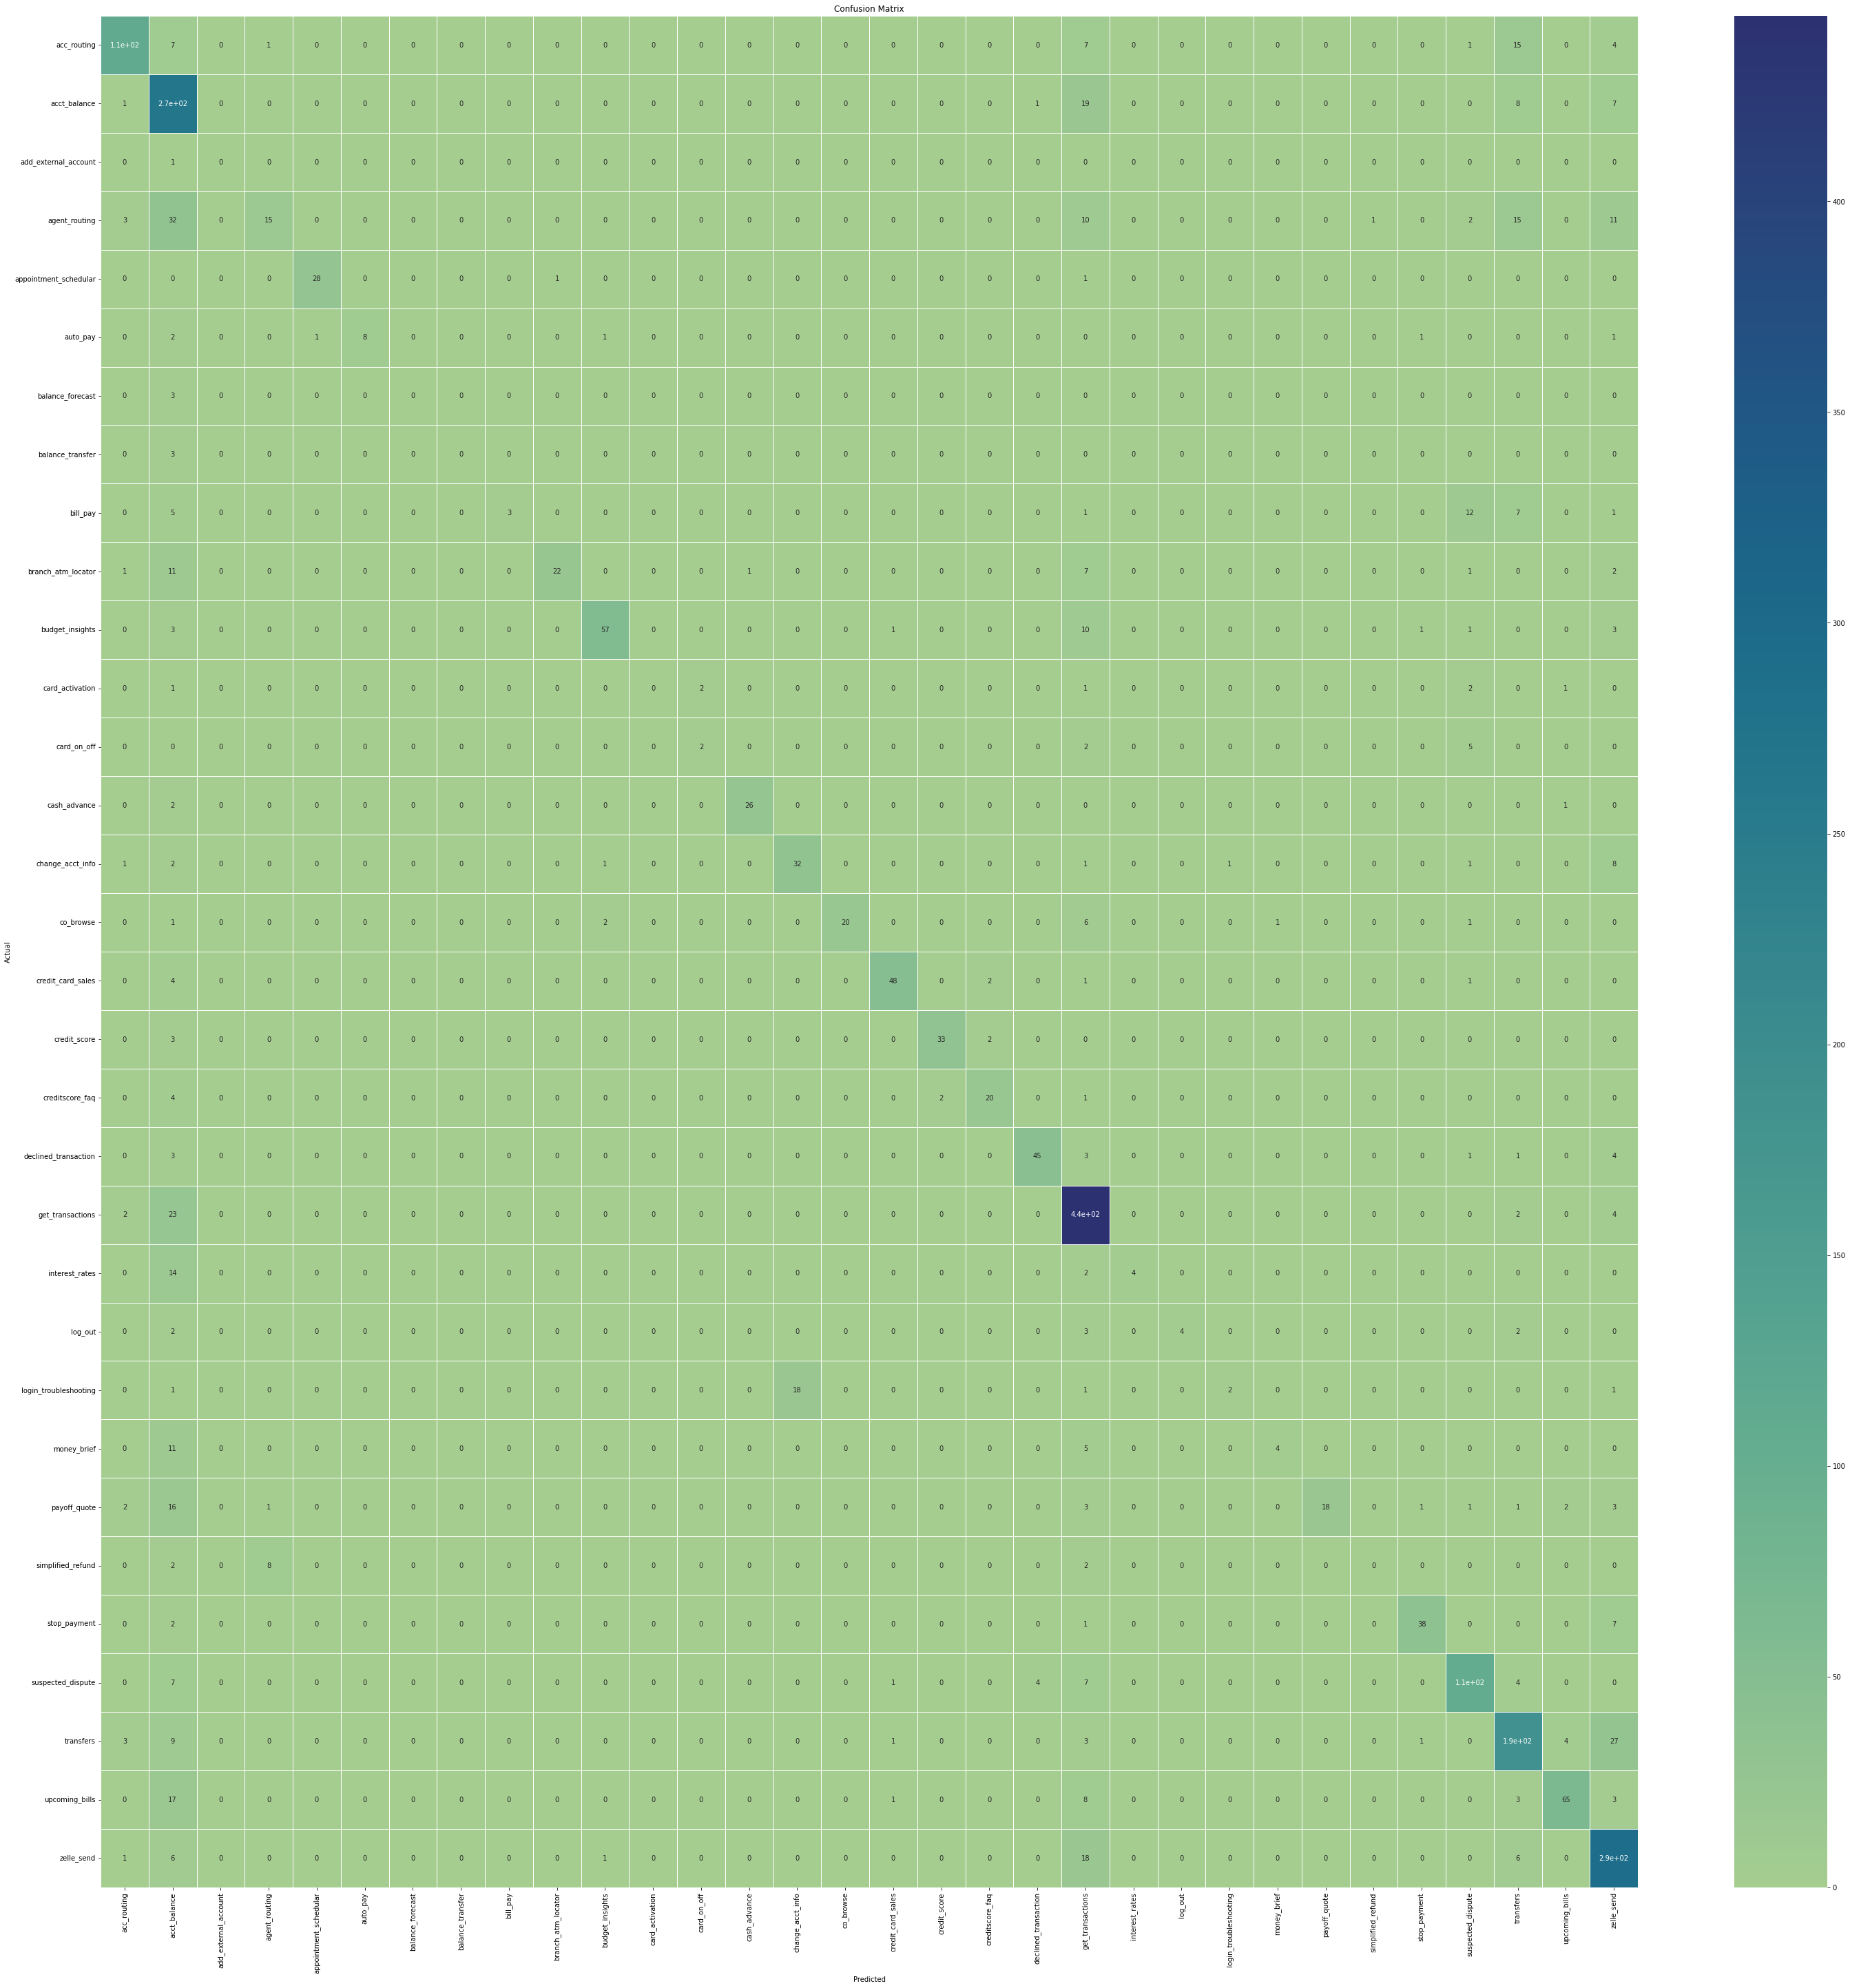

Total True Positives :  1901.0
Total False Positives :  581.0
Total True Negatives :  76361.0
Total False Negatives :  581.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          111           266                     0             15   
TN         2322          1983                  2481           2383   
FP           14           197                     0             10   
FN           35            36                     1             74   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     28         8                 0                 0   
TN                   2451      2468              2479              2479   
FP                      1         0                 0                 0   
FN                      2         6                 3                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         3                  22               57                0   
TN      2453                2436             2401             2475   
FP         0                   1                5                0   
FN        26                  23               19                7   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            2            26                32         20                 48   
TN         2471          2452              2417       2451               2422   
FP            2             1                18          0                  4   
FN            7             3                15         11                  8   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            33               20                    45               444   
TN          2442             2451                  2420              1884   
FP             2                4                     5               123   
FN             5                7                    12                31   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP               4        4                      2            4            18   
TN            2462     2471                   2458         2461          2434   
FP               0        0                      1            1             0   
FN              16        7                     21           16            30   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            38                107        188   
TN               2469          2430               2323       2182   
FP                  1             4                 29         64   
FN                 12            10                 23         48   

    upcoming_bills  zelle_send  
TP              65         291  
TN            2377        2073  
FP               8          86  
FN              32          32

In [ ]:
# uni-gram, bi-gram, tri-gram CountVectorizer

trigram_vectorizer = CountVectorizer(ngram_range=(1,3))
X = trigram_vectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())
#print("Shape of X: ", X.shape)
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Initalize MNB classifier and fit with features
ctvectorizer_trigram_MNB_model = MultinomialNB().fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = ctvectorizer_trigram_MNB_model.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB123")

In [ ]:
res=preprocess_utterance("when my betta fish is going to go to my account")
print(ctvectorizer_trigram_MNB_model.predict(trigram_vectorizer.transform([res])))
print(getEntities(preprocess_utterance("when my betta fish is going to go to my account")))

['zelle_send']
()


In [ ]:
res=preprocess_utterance("grocery Savings account number")
print(ctvectorizer_trigram_MNB_model.predict(trigram_vectorizer.transform([res])))
print(getEntities(preprocess_utterance("grocery Savings account number")))

['acc_routing']
(grocery Savings,)


Model building using MultiNomialNB (Naive Bayes) Model and trigram CountVectorizer for Classification

Accuracy: 0.6015310233682514
F1 score: 0.5852705338867782
                       precision    recall  f1-score   support

          acc_routing       0.76      0.70      0.73       146
         acct_balance       0.63      0.79      0.70       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.59      0.15      0.23        89
appointment_schedular       1.00      0.67      0.80        30
             auto_pay       1.00      0.21      0.35        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.00      0.00      0.00         3
             bill_pay       1.00      0.10      0.19        29
   branch_atm_locator       1.00      0.18      0.30        45
      budget_insights       0.71      0.33      0.45        76
      card_activation       1.00      0.14      0.25         7
          card_on_off       1.00      0.33      0.50         9
         cash_advance       0.96      0.76      0.85       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


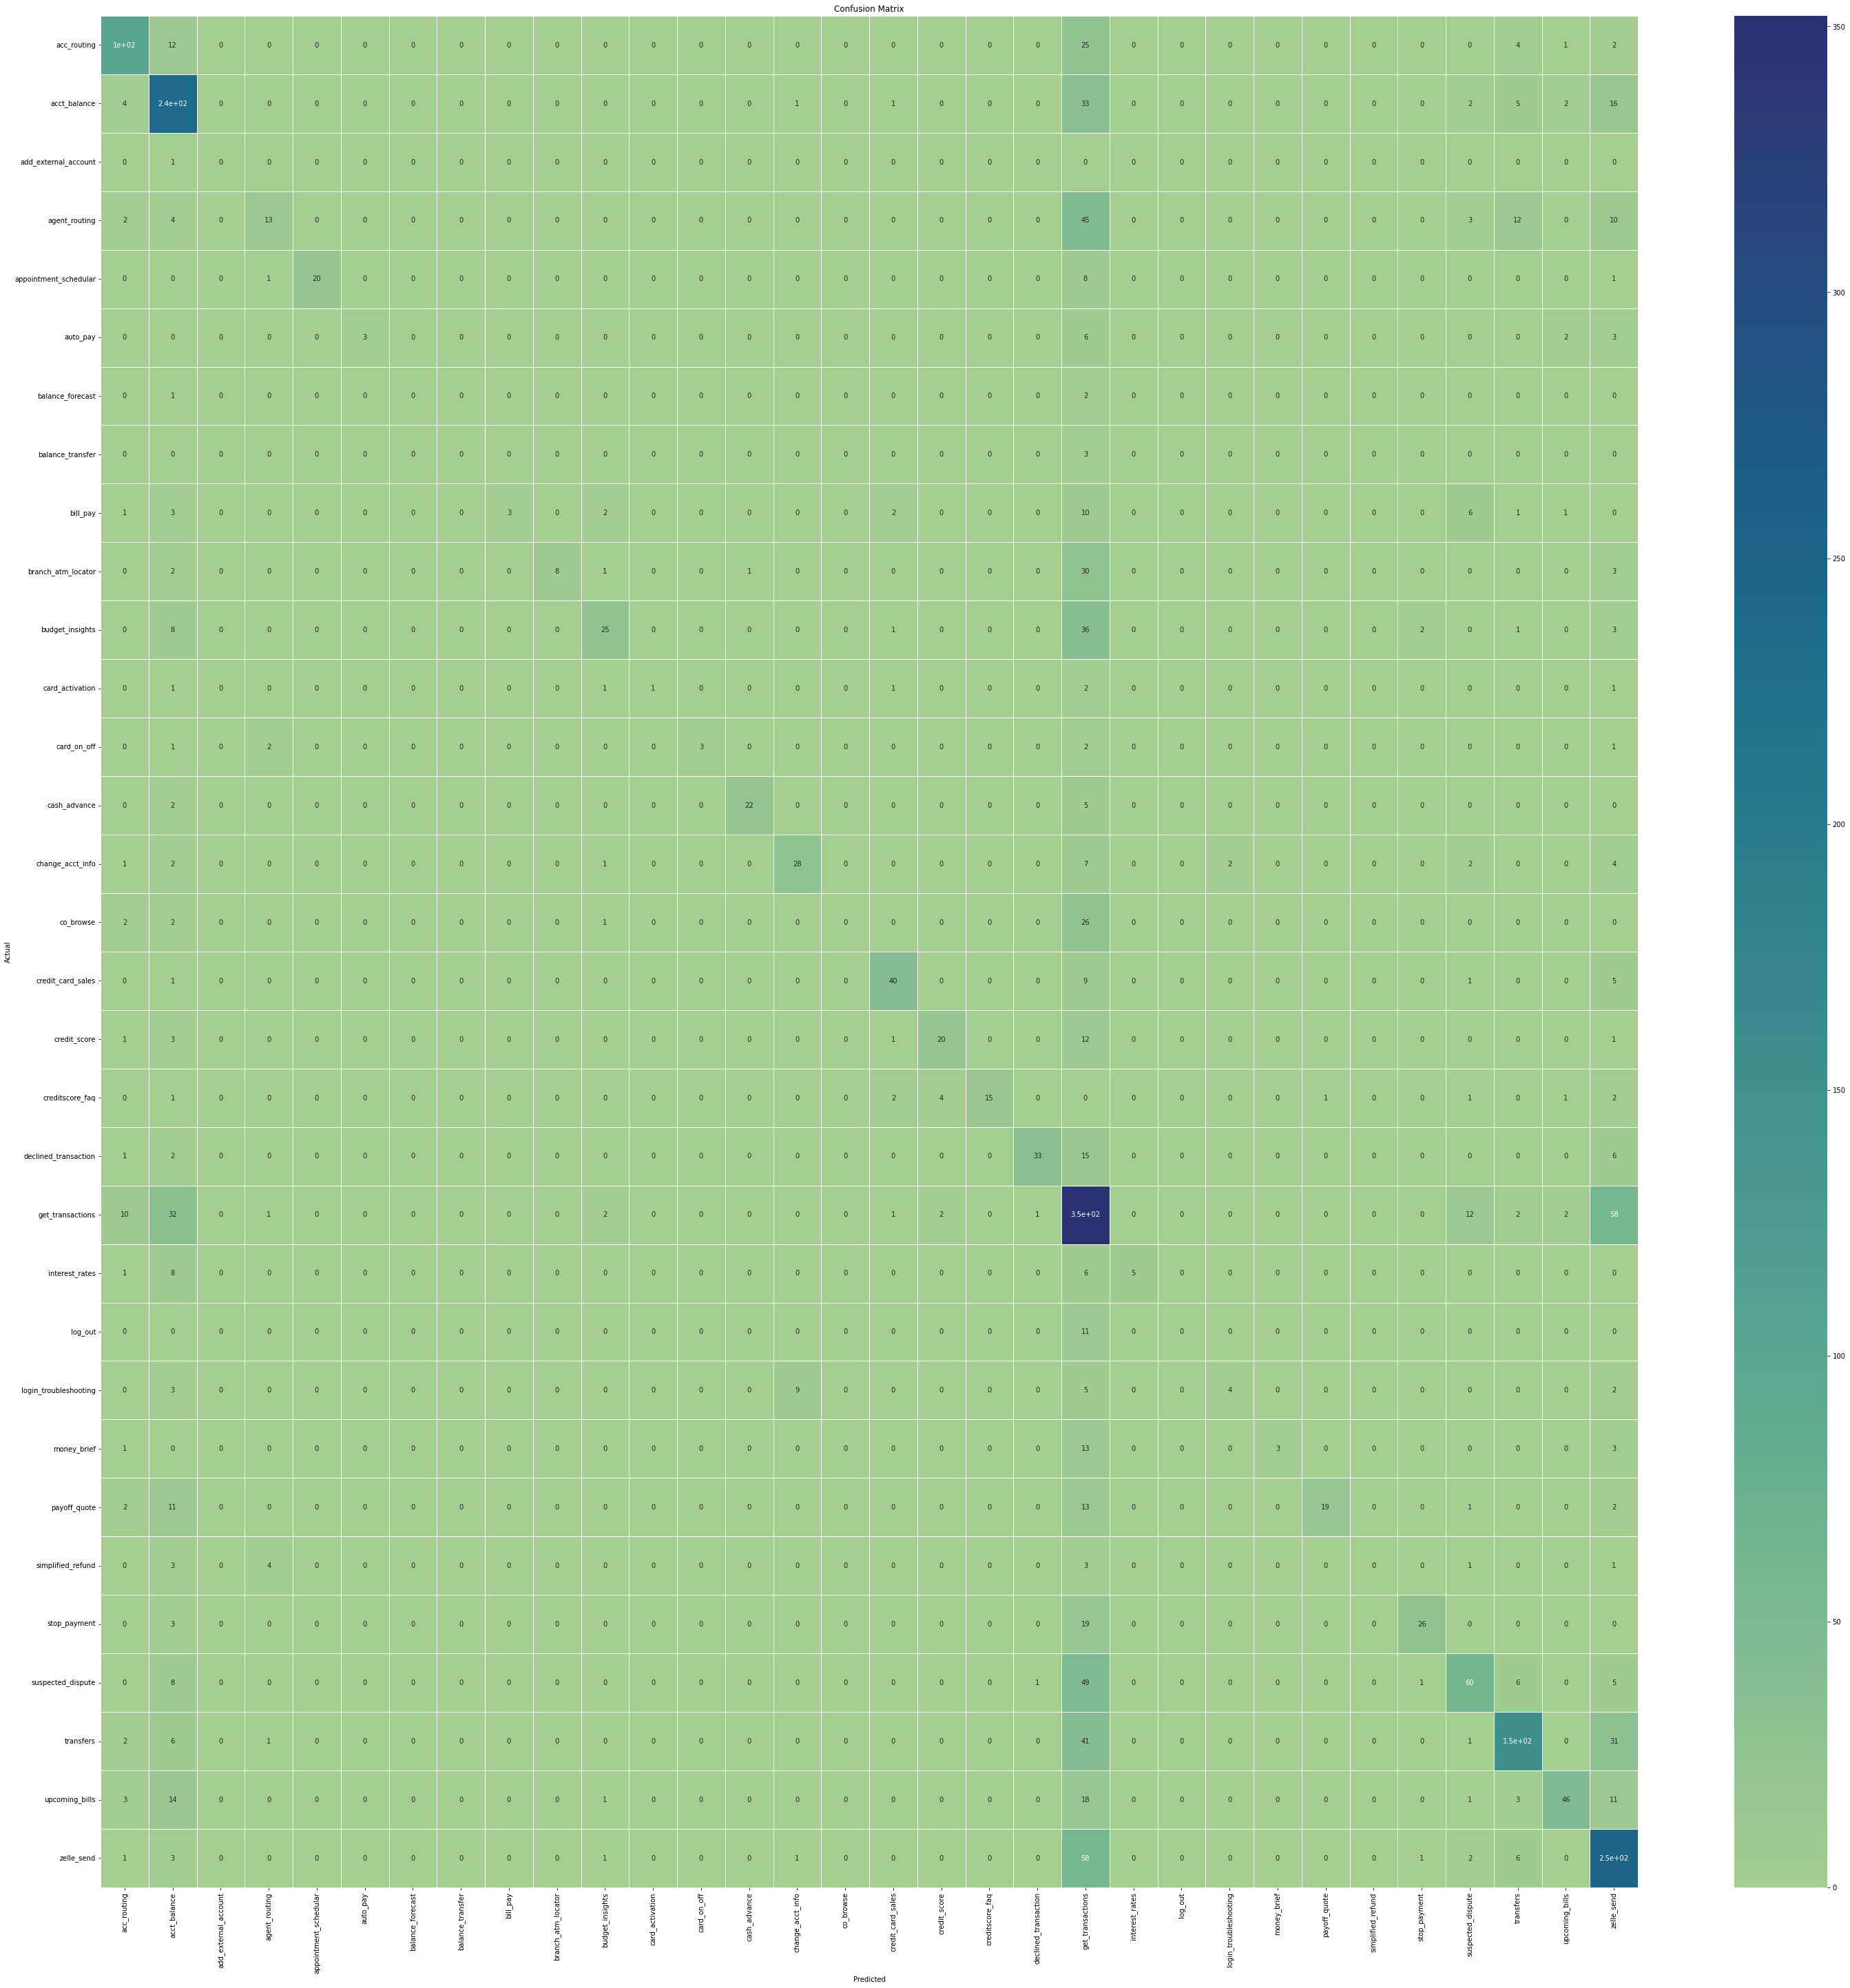

Total True Positives :  1493.0
Total False Positives :  989.0
Total True Negatives :  75953.0
Total False Negatives :  989.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          102           238                     0             13   
TN         2304          2043                  2481           2384   
FP           32           137                     0              9   
FN           44            64                     1             76   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     20         3                 0                 0   
TN                   2452      2468              2479              2479   
FP                      0         0                 0                 0   
FN                     10        11                 3                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         3                   8               25                1   
TN      2453                2437             2396             2475   
FP         0                   0               10                0   
FN        26                  37               51                6   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            3            22                28          0                 40   
TN         2473          2452              2424       2451               2417   
FP            0             1                11          0                  9   
FN            6             7                19         31                 16   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            20               15                    33               352   
TN          2438             2455                  2423              1495   
FP             6                0                     2               512   
FN            18               12                    24               123   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP               5        0                      4            3            19   
TN            2462     2471                   2457         2462          2433   
FP               0        0                      2            0             1   
FN              15       11                     19           17            29   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            26                 60        154   
TN               2470          2430               2319       2206   
FP                  0             4                 33         40   
FN                 12            22                 70         82   

    upcoming_bills  zelle_send  
TP              46         250  
TN            2376        1988  
FP               9         171  
FN              51          73

In [ ]:
#tri-gram CountVectorizer

trigram_vectorizer = CountVectorizer(ngram_range=(3,3))
X = trigram_vectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())
#print("Shape of X: ", X.shape)
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Initalize MNB classifier and fit with features
ctvectorizer_trigram_MNB_model = MultinomialNB().fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = ctvectorizer_trigram_MNB_model.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNB3")

In [ ]:
res=preprocess_utterance("how can i get a card for a single account")
print(res)
print(ctvectorizer_trigram_MNB_model.predict(trigram_vectorizer.transform([res])))

how can get card for single account
['suspected_dispute']


###Model building using MultiNomialNB (Naive Bayes) Model and tf-idf (term frequency - inverse document frequency) vectorizer for Classification


Accuracy: 0.6897663174858985
F1 score: 0.655569356684629
                       precision    recall  f1-score   support

          acc_routing       0.89      0.64      0.74       146
         acct_balance       0.45      0.85      0.59       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.68      0.15      0.24        89
appointment_schedular       1.00      0.80      0.89        30
             auto_pay       0.00      0.00      0.00        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.00      0.00      0.00         3
             bill_pay       0.00      0.00      0.00        29
   branch_atm_locator       1.00      0.60      0.75        45
      budget_insights       0.97      0.75      0.84        76
      card_activation       0.00      0.00      0.00         7
          card_on_off       0.00      0.00      0.00         9
         cash_advance       1.00      0.41      0.59        

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


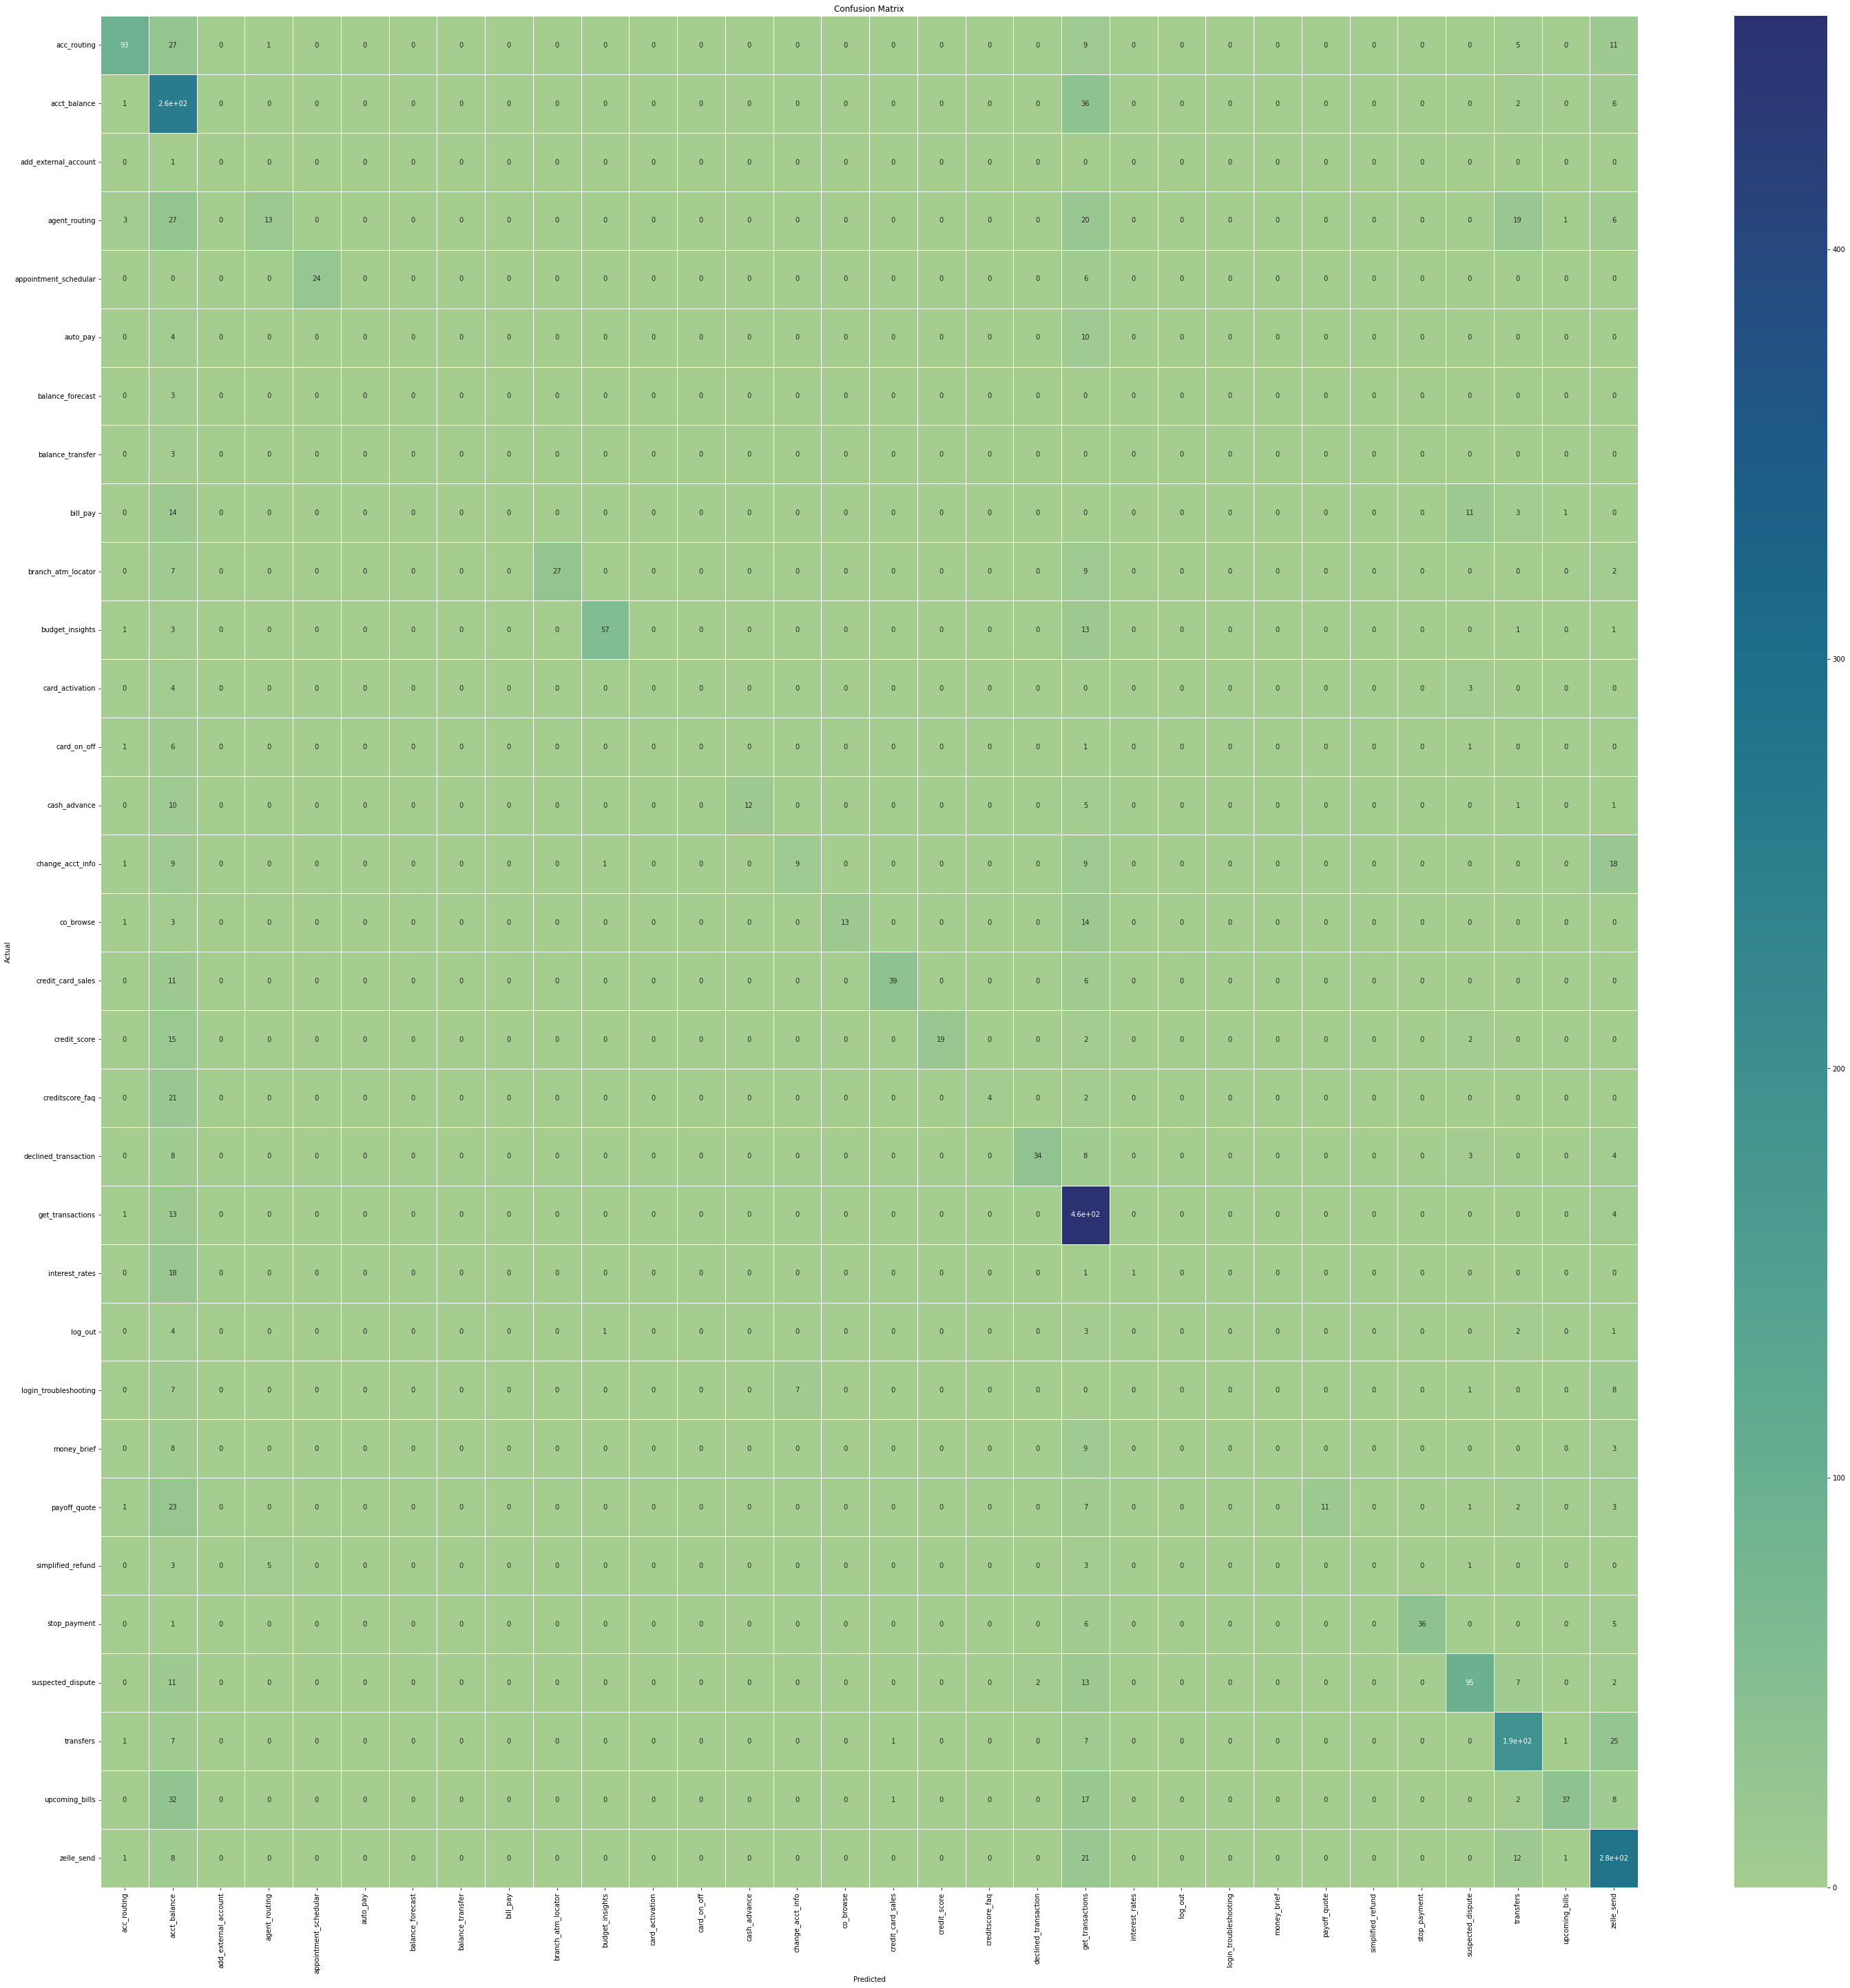

Total True Positives :  1712.0
Total False Positives :  770.0
Total True Negatives :  76172.0
Total False Negatives :  770.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP           93           257                     0             13   
TN         2324          1869                  2481           2387   
FP           12           311                     0              6   
FN           53            45                     1             76   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     24         0                 0                 0   
TN                   2452      2468              2479              2479   
FP                      0         0                 0                 0   
FN                      6        14                 3                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         0                  27               57                0   
TN      2453                2437             2404             2475   
FP         0                   0                2                0   
FN        29                  18               19                7   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            0            12                 9         13                 39   
TN         2473          2453              2428       2451               2424   
FP            0             0                 7          0                  2   
FN            9            17                38         18                 17   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            19                4                    34               457   
TN          2444             2455                  2423              1770   
FP             0                0                     2               237   
FN            19               23                    23                18   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP               1        0                      0            0            11   
TN            2462     2471                   2459         2462          2434   
FP               0        0                      0            0             0   
FN              19       11                     23           20            37   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            36                 95        194   
TN               2470          2434               2329       2190   
FP                  0             0                 23         56   
FN                 12            12                 35         42   

    upcoming_bills  zelle_send  
TP              37         280  
TN            2381        2051  
FP               4         108  
FN              60          43

In [ ]:
# Using TfidfVectorizer
tfidfVectorizer = TfidfVectorizer()
X = tfidfVectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

# Initalize MNB classifier and fit with features
tfidfvectorizer_MNB_model = MultinomialNB().fit(X_train, y_train)

# get the predictions for X_test using pipeline object
y_pred = tfidfvectorizer_MNB_model.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNBTF1")

In [ ]:
res=preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?")
print(res)
print(tfidfvectorizer_MNB_model.predict(tfidfVectorizer.transform([res])))
print(getEntities(res))

hello am bank home mortgage customer and want to know if there will be short age or over age on my escrow at the end of this year
['get_transactions']
(hello am bank, the end of this year)


In [ ]:
res=preprocess_utterance("i made an online purchase for a store dr martens on #/# in the amount of $#. i believe i was scammed.")
print(res)
print(tfidfvectorizer_MNB_model.predict(tfidfVectorizer.transform([res])))
print(getEntities(res))

make an online purchase for store do martins on in the amount of believe was scammon
['get_transactions']
()


In [ ]:
res=preprocess_utterance("i am interested in starting a # college fund for my newborn grandson.")
print(res)
print(tfidfvectorizer_MNB_model.predict(tfidfVectorizer.transform([res])))
print(getEntities(res))

am interested in start college fund for my new on grand son
['acct_balance']
()


In [ ]:
# tf-idf vectorizer and MNB model using Pipeline approach

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

# Creating a pipeline object
tfidf_vector_MNB_pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])
 
 #fit with features
tfidf_vector_MNB_pipeline.fit(X_train, y_train)

#get the predictions for X_test using pipeline object
y_pred = tfidf_vector_MNB_pipeline.predict(X_test)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))
print (classification_report(y_test, y_pred))

### Using KNN (K Nearest Neighbour) Model and CountVectorizer

##### Using ngram_range as unigram and metric as Euclidean distance.

Accuracy: 0.6813053988718775
F1 score: 0.681576319160926
                       precision    recall  f1-score   support

          acc_routing       0.62      0.71      0.66       146
         acct_balance       0.74      0.77      0.75       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.23      0.44      0.30        89
appointment_schedular       0.96      0.90      0.93        30
             auto_pay       0.89      0.57      0.70        14
     balance_forecast       0.25      0.33      0.29         3
     balance_transfer       0.00      0.00      0.00         3
             bill_pay       0.52      0.38      0.44        29
   branch_atm_locator       0.74      0.82      0.78        45
      budget_insights       0.74      0.92      0.82        76
      card_activation       0.38      0.43      0.40         7
          card_on_off       0.56      0.56      0.56         9
         cash_advance       0.81      0.90      0.85        

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


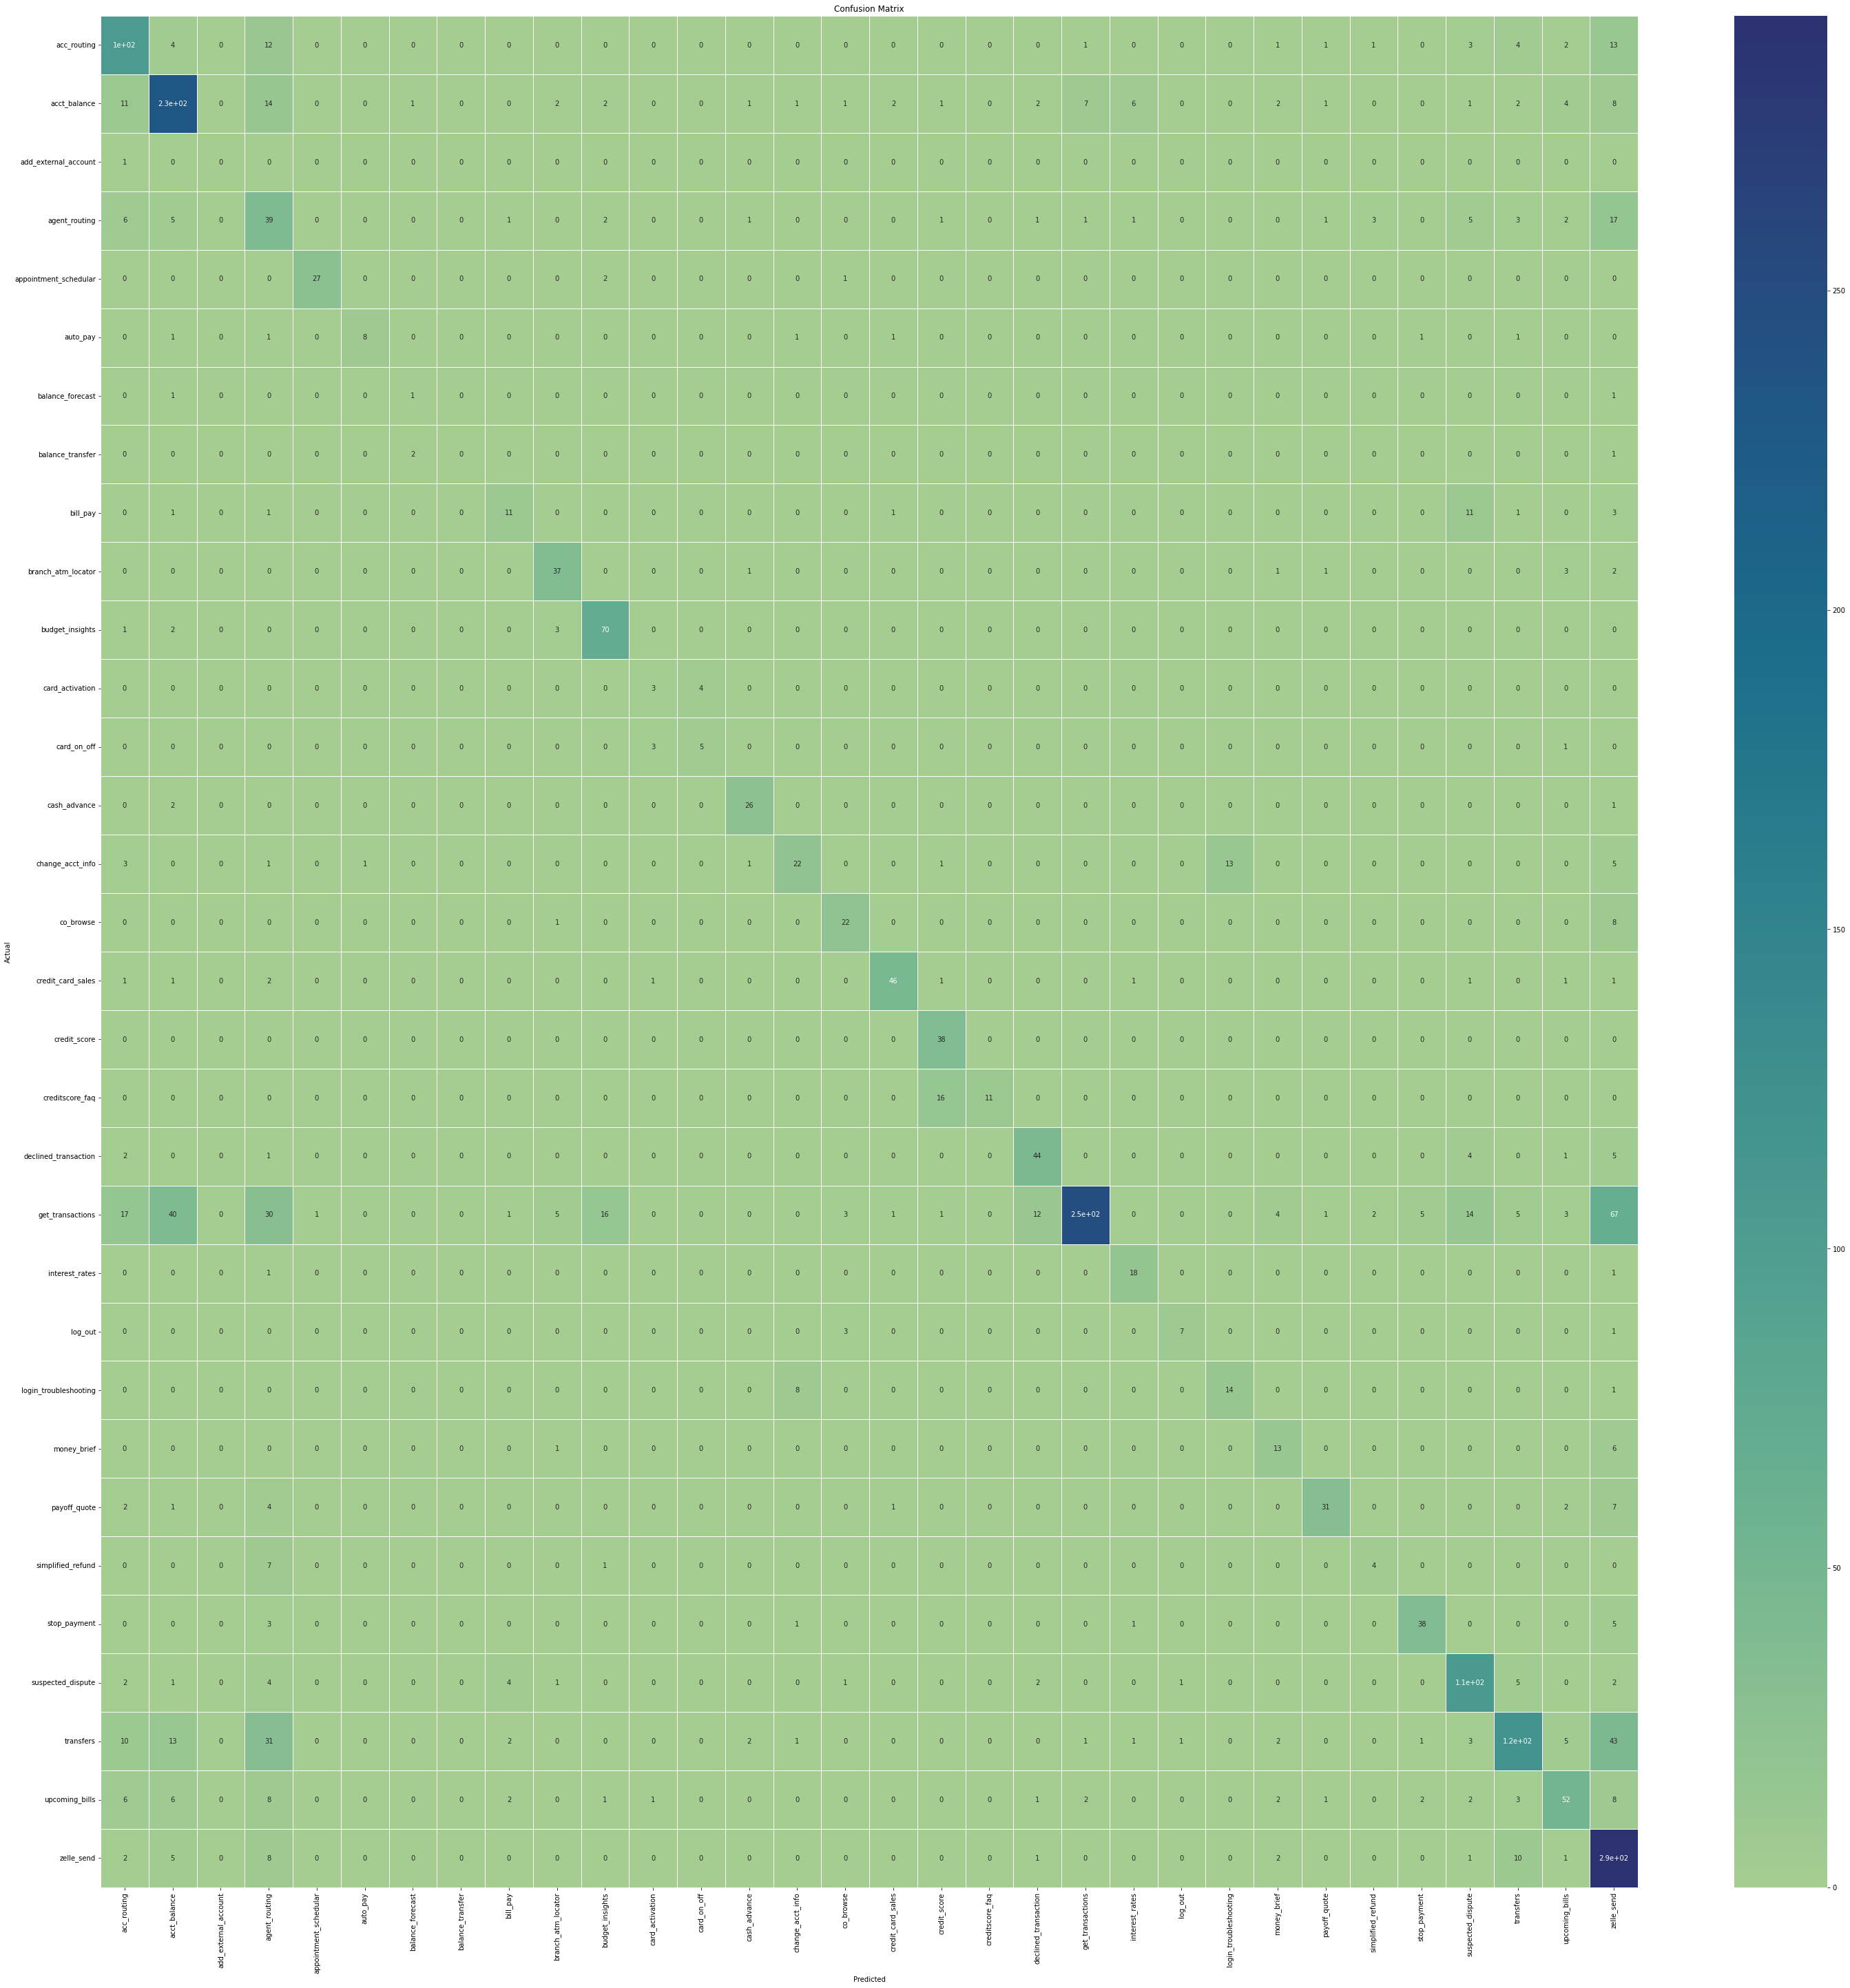

Total True Positives :  1691.0
Total False Positives :  791.0
Total True Negatives :  76151.0
Total False Negatives :  791.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          104           233                     0             39   
TN         2272          2097                  2481           2265   
FP           64            83                     0            128   
FN           42            69                     1             50   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     27         8                 1                 0   
TN                   2451      2467              2476              2479   
FP                      1         1                 3                 0   
FN                      3         6                 2                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP        11                  37               70                3   
TN      2443                2424             2382             2470   
FP        10                  13               24                5   
FN        18                   8                6                4   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            5            26                22         22                 46   
TN         2469          2447              2423       2442               2420   
FP            4             6                12          9                  6   
FN            4             3                25          9                 10   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            38               11                    44               247   
TN          2423             2455                  2406              1995   
FP            21                0                    19                12   
FN             0               16                    13               228   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              18        7                     14           13            31   
TN            2452     2469                   2446         2448          2428   
FP              10        2                     13           14             6   
FN               2        4                      9            7            17   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  4            38                107        120   
TN               2464          2425               2307       2212   
FP                  6             9                 45         34   
FN                  8            10                 23        116   

    upcoming_bills  zelle_send  
TP              52         293  
TN            2360        1953  
FP              25         206  
FN              45          30

In [ ]:
# CountVectorizer and KNN model using Pipeline approach 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
count_vector_KNN1_pipeline = Pipeline([
    ('vectorizer_count', CountVectorizer()),        #using the ngram_range parameter 
     ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'))         
])
 
 #fit with features
count_vector_KNN1_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = count_vector_KNN1_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "KNN1")

In [ ]:
print(count_vector_KNN1_pipeline.predict([preprocess_utterance("why does it state in bill pay that i have paid summit orthopedic $#.# on #/# and itâs #/#?")]))
print(getEntities(preprocess_utterance("why does it state in bill pay that i have paid summit orthopedic $#.# on #/# and itâs #/#?")))

['transfers']
()


##### Using ngram_range as unigram and metric as cosine distance.

Accuracy: 0.7671232876712328
F1 score: 0.7657960667536491
                       precision    recall  f1-score   support

          acc_routing       0.70      0.81      0.75       146
         acct_balance       0.72      0.78      0.75       302
 add_external_account       0.50      1.00      0.67         1
        agent_routing       0.35      0.39      0.37        89
appointment_schedular       0.90      0.87      0.88        30
             auto_pay       0.78      0.50      0.61        14
     balance_forecast       1.00      0.33      0.50         3
     balance_transfer       0.33      0.33      0.33         3
             bill_pay       0.47      0.24      0.32        29
   branch_atm_locator       0.89      0.87      0.88        45
      budget_insights       0.86      0.93      0.89        76
      card_activation       0.50      0.43      0.46         7
          card_on_off       0.45      0.56      0.50         9
         cash_advance       0.82      0.97      0.89       

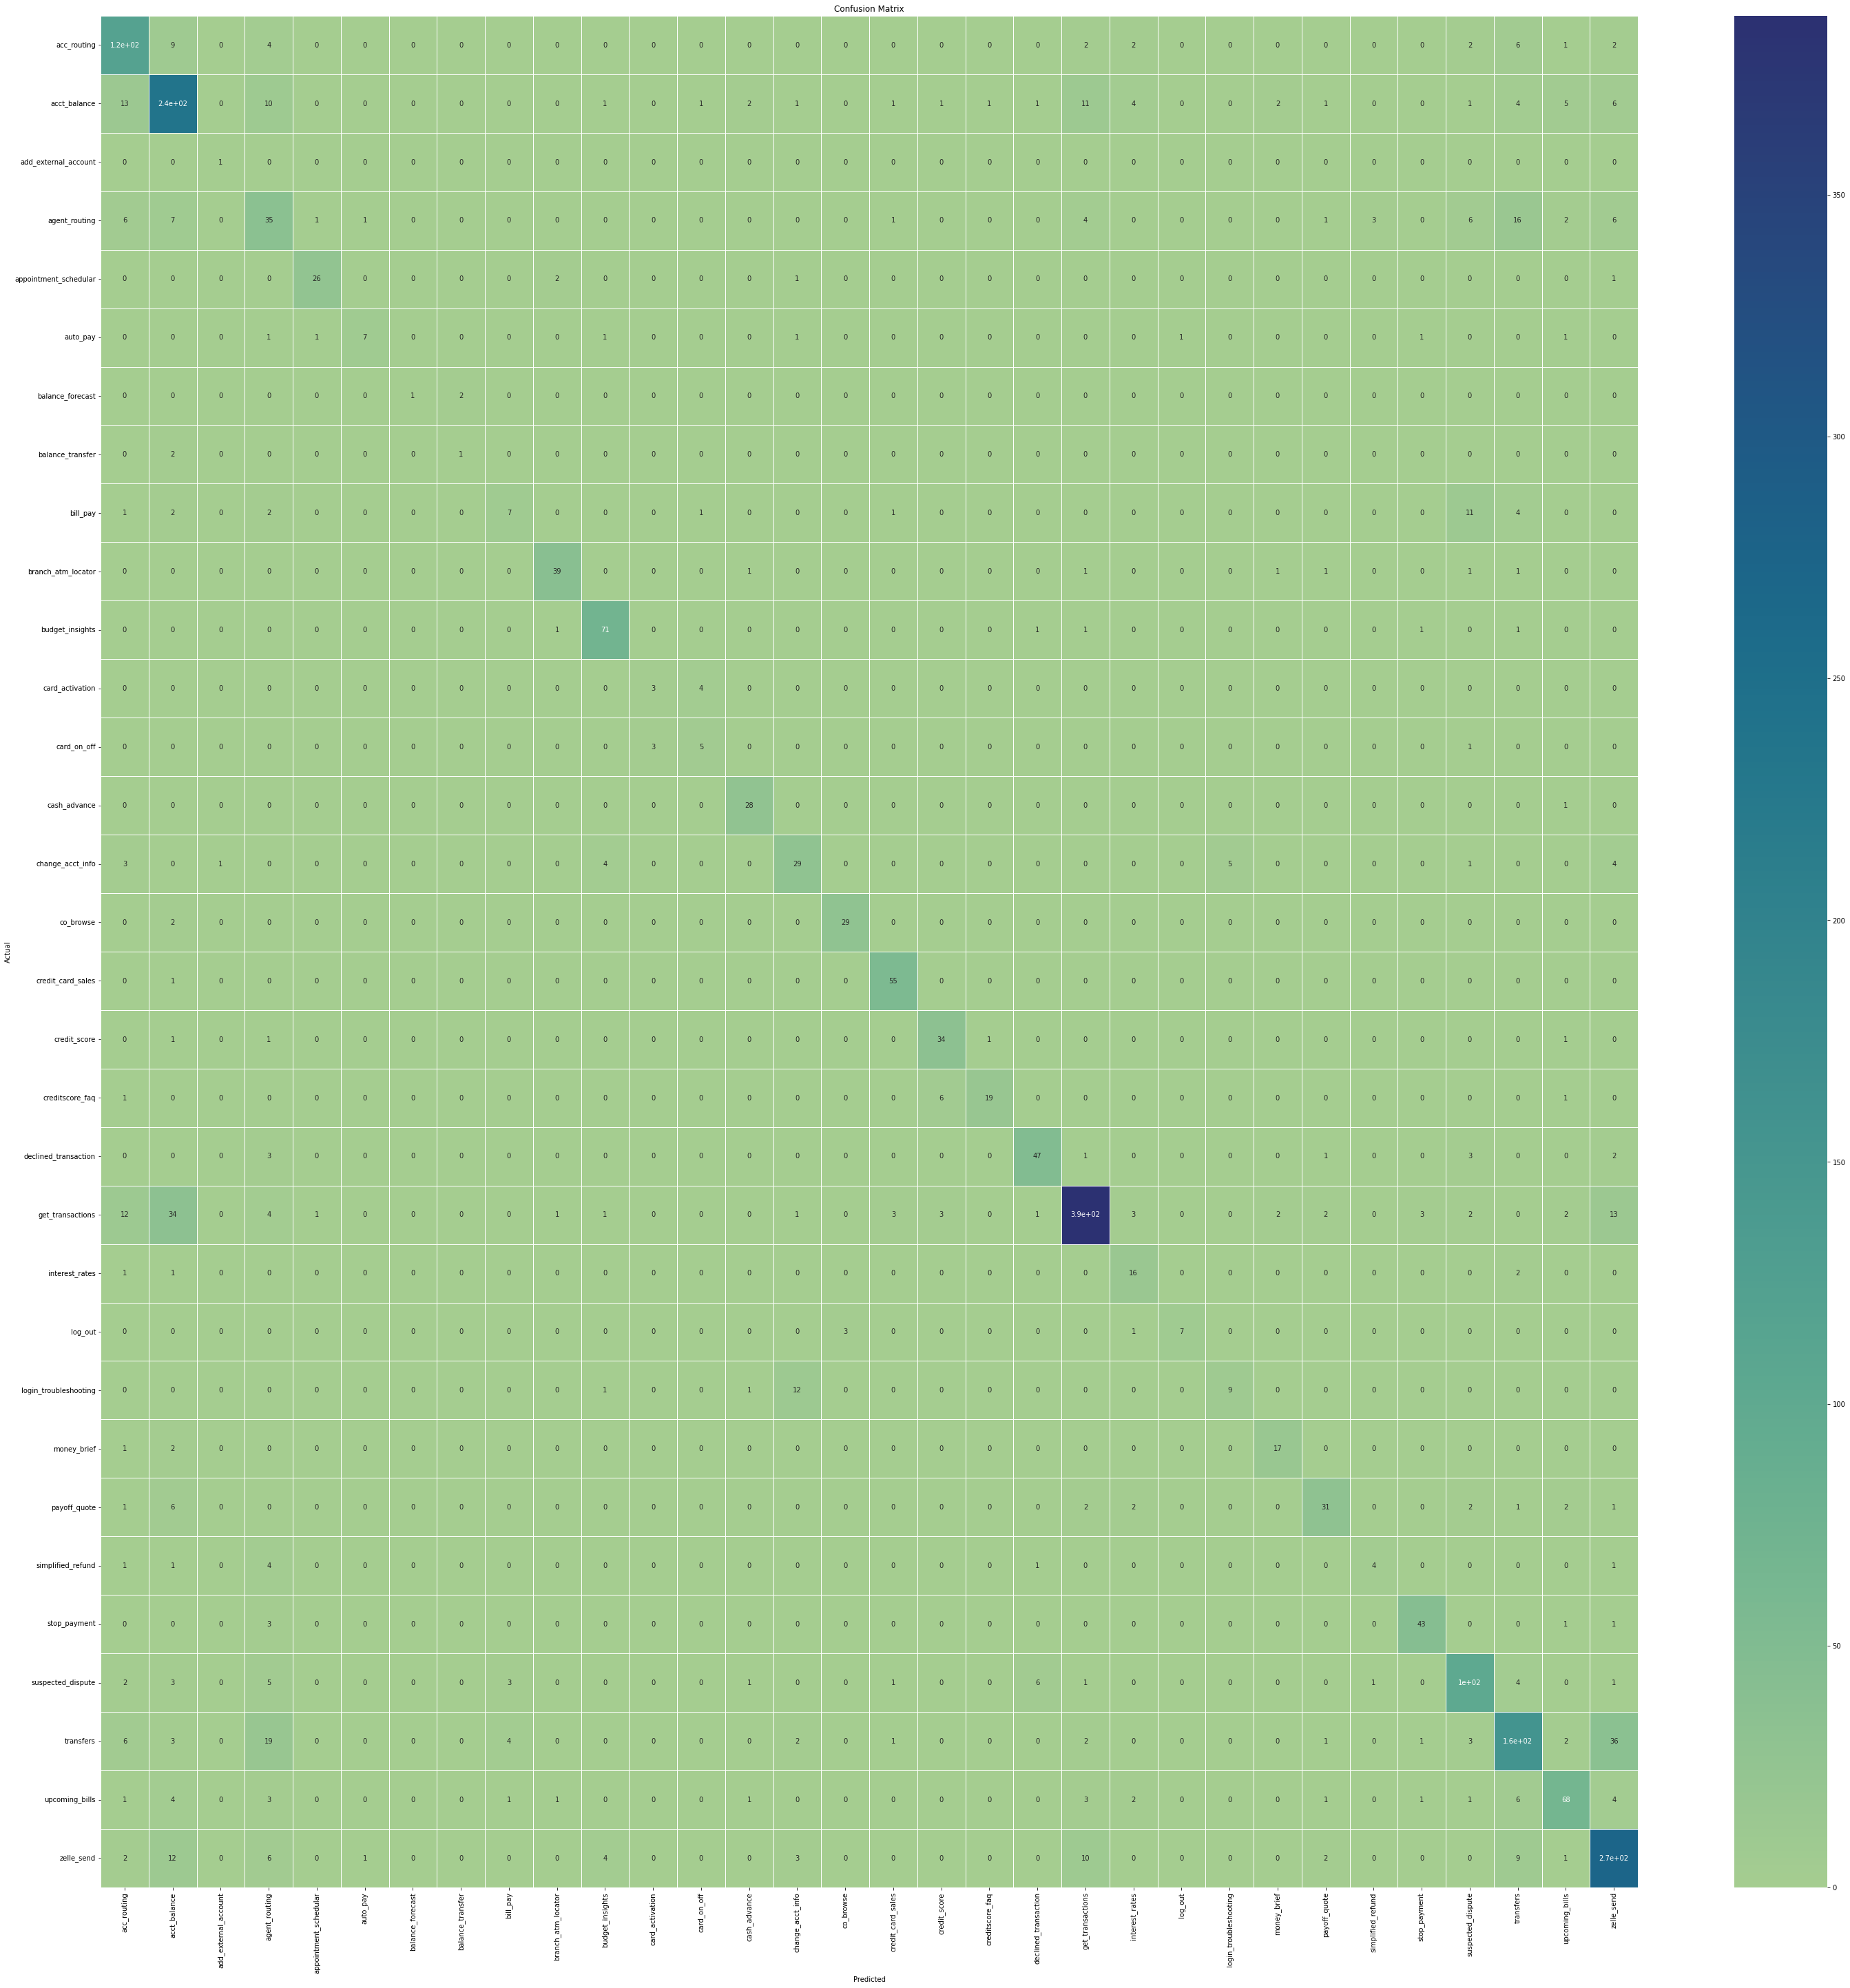

Total True Positives :  1904.0
Total False Positives :  578.0
Total True Negatives :  76364.0
Total False Negatives :  578.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          118           236                     1             35   
TN         2285          2090                  2480           2328   
FP           51            90                     1             65   
FN           28            66                     0             54   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     26         7                 1                 1   
TN                   2449      2466              2479              2477   
FP                      3         2                 0                 2   
FN                      4         7                 2                 2   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         7                  39               71                3   
TN      2445                2432             2394             2472   
FP         8                   5               12                3   
FN        22                   6                5                4   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            5            28                29         29                 55   
TN         2467          2447              2414       2448               2418   
FP            6             6                21          3                  8   
FN            4             1                18          2                  1   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            34               19                    47               387   
TN          2434             2453                  2415              1969   
FP            10                2                    10                38   
FN             4                8                    10                88   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              16        7                      9           17            31   
TN            2448     2470                   2454         2457          2424   
FP              14        1                      5            5            10   
FN               4        4                     14            3            17   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  4            43                102        156   
TN               2466          2427               2318       2192   
FP                  4             7                 34         54   
FN                  8             5                 28         80   

    upcoming_bills  zelle_send  
TP              68         273  
TN            2365        2081  
FP              20          78  
FN              29          50

In [ ]:
# CountVectorizer and KNN model using Pipeline approach 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
count_vector_KNN2_pipeline = Pipeline([
    ('vectorizer_count', CountVectorizer()),       
     ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', metric='cosine'))         
])
 
 #fit with features
count_vector_KNN2_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = count_vector_KNN2_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "KNN2")

In [ ]:
print(count_vector_KNN2_pipeline.predict([preprocess_utterance("if i want to put more  money towards my bill what will make the interest go down")]))
print(getEntities(preprocess_utterance("if i want to put more  money towards my bill what will make the interest go down")))

['payoff_quote']
()


### Using KNN (K Nearest Neighbour) Model and TF-IDF Vectorizer

#####Using Euclidean distance metric.

Accuracy: 0.5866236905721193
F1 score: 0.6031383425982185
                       precision    recall  f1-score   support

          acc_routing       0.87      0.76      0.81       146
         acct_balance       0.92      0.60      0.72       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.68      0.40      0.51        89
appointment_schedular       1.00      0.83      0.91        30
             auto_pay       1.00      0.57      0.73        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       1.00      0.33      0.50         3
             bill_pay       0.67      0.28      0.39        29
   branch_atm_locator       1.00      0.82      0.90        45
      budget_insights       0.98      0.79      0.88        76
      card_activation       0.25      0.14      0.18         7
          card_on_off       0.46      0.67      0.55         9
         cash_advance       0.90      0.97      0.93       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


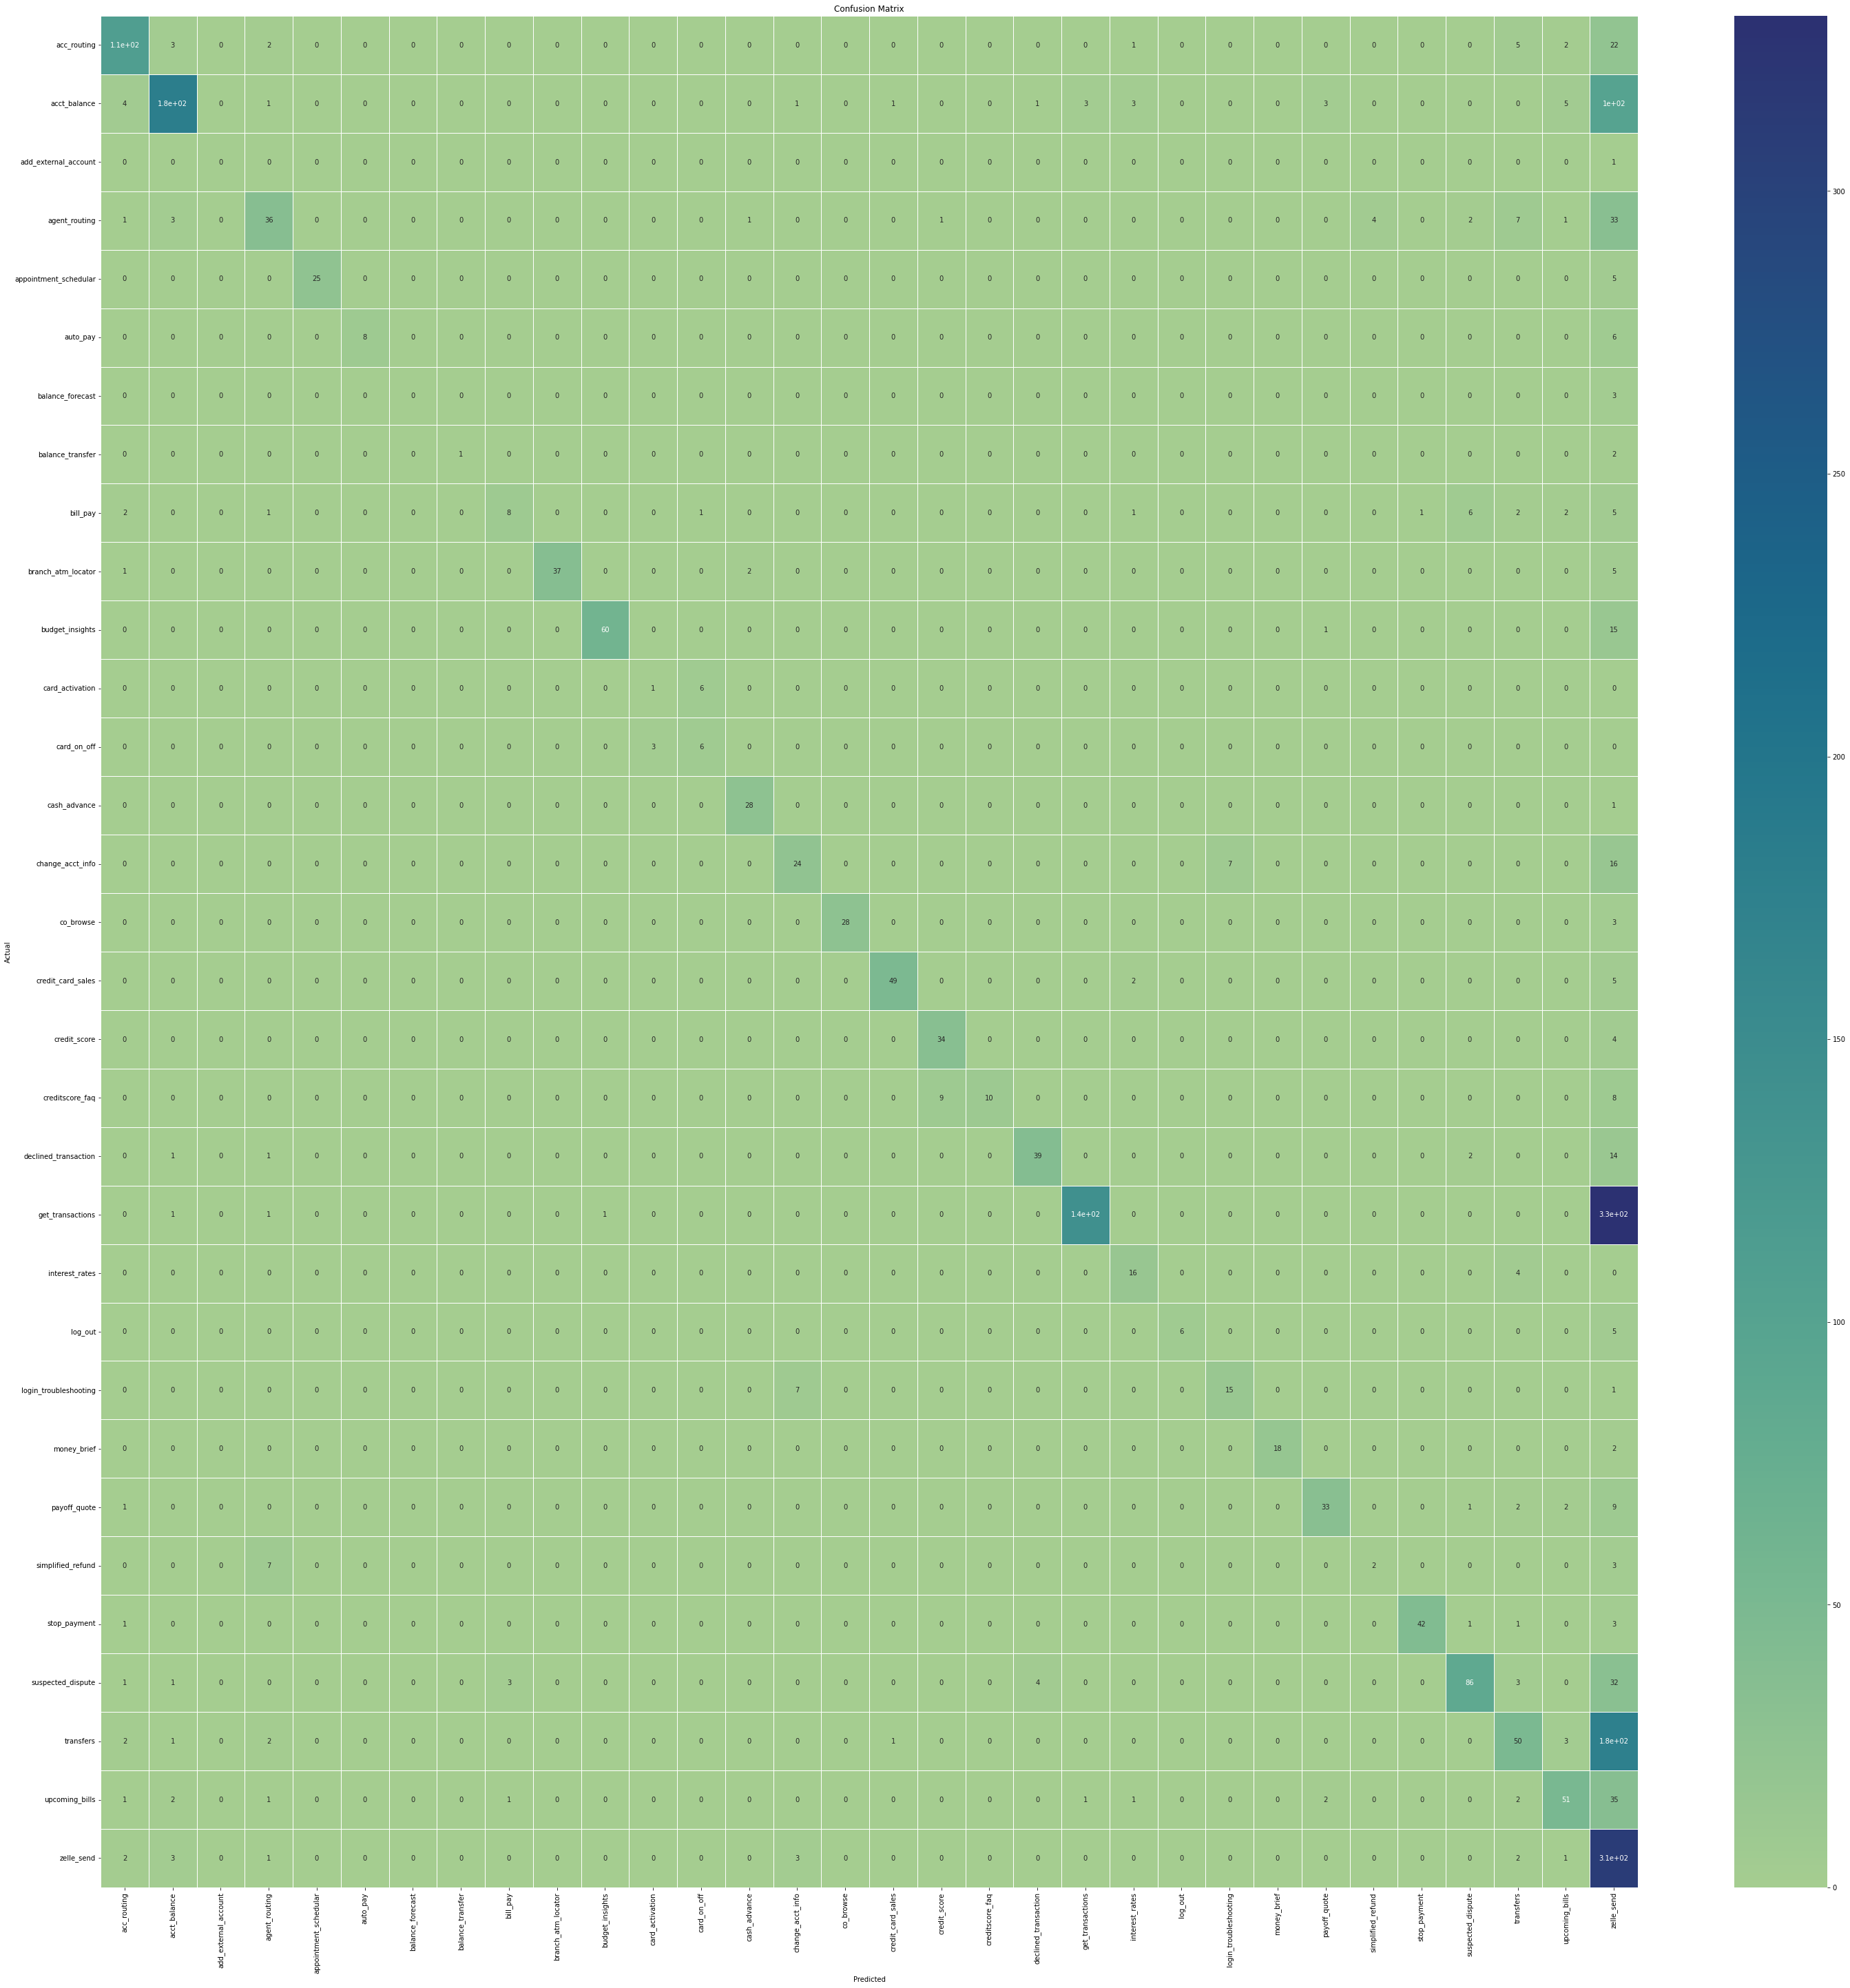

Total True Positives :  1456.0
Total False Positives :  1026.0
Total True Negatives :  75916.0
Total False Negatives :  1026.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          111           180                     0             36   
TN         2320          2165                  2481           2376   
FP           16            15                     0             17   
FN           35           122                     1             53   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     25         8                 0                 1   
TN                   2452      2468              2479              2479   
FP                      0         0                 0                 0   
FN                      5         6                 3                 2   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         8                  37               60                1   
TN      2449                2437             2405             2472   
FP         4                   0                1                3   
FN        21                   8               16                6   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            6            28                24         28                 49   
TN         2466          2450              2424       2451               2424   
FP            7             3                11          0                  2   
FN            3             1                23          3                  7   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            34               10                    39               141   
TN          2434             2455                  2420              2003   
FP            10                0                     5                 4   
FN             4               17                    18               334   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              16        6                     15           18            33   
TN            2454     2471                   2452         2462          2428   
FP               8        0                      7            0             6   
FN               4        5                      8            2            15   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  2            42                 86         50   
TN               2466          2433               2340       2218   
FP                  4             1                 12         28   
FN                 10             6                 44        186   

    upcoming_bills  zelle_send  
TP              51         311  
TN            2369        1313  
FP              16         846  
FN              46          12

In [ ]:
# TF-IDF Vectorizer and KNN model using Pipeline approach 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
tfidf_vector_KNN1_pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),       
     ('KNN', KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean'))         
])
 
 #fit with features
tfidf_vector_KNN1_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = tfidf_vector_KNN1_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "KNNTF1")

In [ ]:
print(tfidf_vector_KNN1_pipeline.predict([preprocess_utterance("why does it state in bill pay that i have paid summit orthopedic $#.# on #/# and itâs #/#?")]))
print(getEntities(preprocess_utterance("why does it state in bill pay that i have paid summit orthopedic $#.# on #/# and itâs #/#?")))

['zelle_send']
()


#####Using Cosine distance metric.

Accuracy: 0.7989524576954069
F1 score: 0.7956980999920372
                       precision    recall  f1-score   support

          acc_routing       0.75      0.80      0.78       146
         acct_balance       0.79      0.81      0.80       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.46      0.47      0.46        89
appointment_schedular       0.97      0.93      0.95        30
             auto_pay       0.87      0.93      0.90        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       1.00      0.33      0.50         3
             bill_pay       0.56      0.31      0.40        29
   branch_atm_locator       0.85      0.89      0.87        45
      budget_insights       0.90      0.92      0.91        76
      card_activation       0.60      0.43      0.50         7
          card_on_off       0.64      0.78      0.70         9
         cash_advance       0.88      1.00      0.94       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


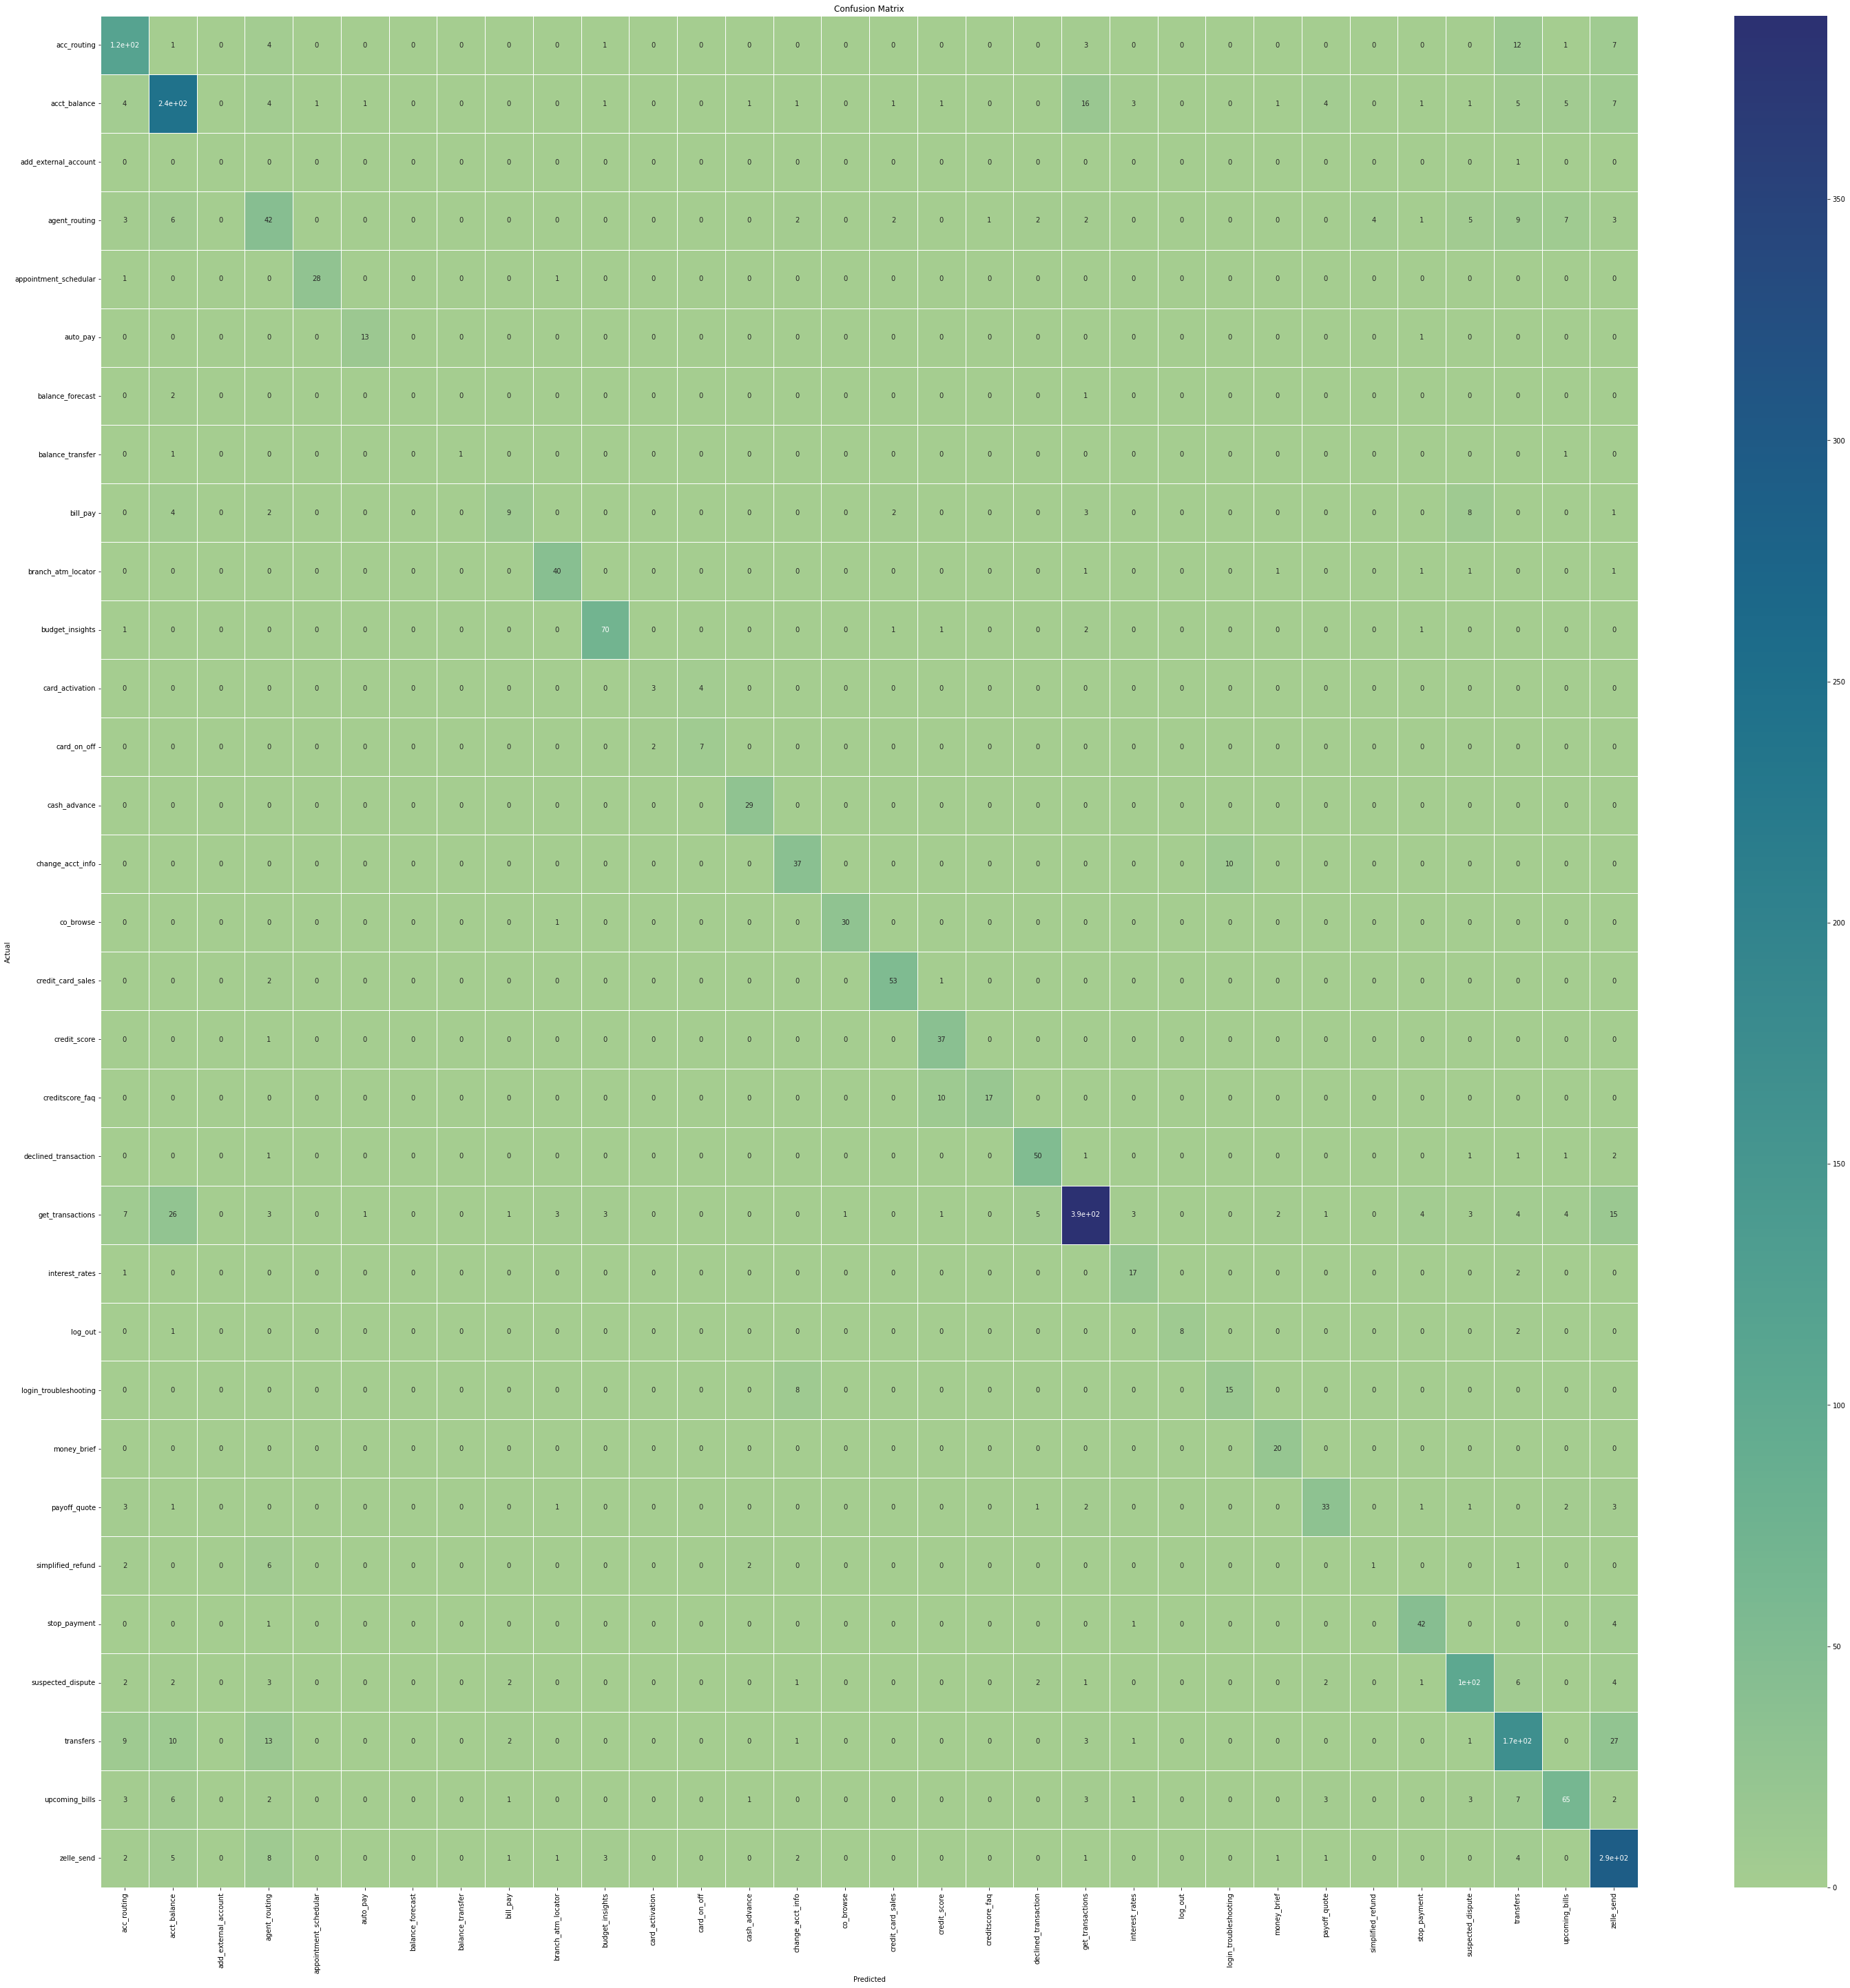

Total True Positives :  1983.0
Total False Positives :  499.0
Total True Negatives :  76443.0
Total False Negatives :  499.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          117           244                     0             42   
TN         2298          2115                  2481           2343   
FP           38            65                     0             50   
FN           29            58                     1             47   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     28        13                 0                 1   
TN                   2451      2466              2479              2479   
FP                      1         2                 0                 0   
FN                      2         1                 3                 2   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         9                  40               70                3   
TN      2446                2430             2398             2473   
FP         7                   7                8                2   
FN        20                   5                6                4   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            7            29                37         30                 53   
TN         2469          2449              2420       2450               2420   
FP            4             4                15          1                  6   
FN            2             0                10          1                  3   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            37               17                    50               388   
TN          2430             2454                  2415              1968   
FP            14                1                    10                39   
FN             1               10                     7                87   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              17        8                     15           20            33   
TN            2453     2471                   2449         2457          2423   
FP               9        0                     10            5            11   
FN               3        3                      8            0            15   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  1            42                104        169   
TN               2466          2423               2328       2192   
FP                  4            11                 24         54   
FN                 11             6                 26         67   

    upcoming_bills  zelle_send  
TP              65         294  
TN            2364        2083  
FP              21          76  
FN              32          29

In [ ]:
# TF-IDF Vectorizer and KNN model using Pipeline approach 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
tfidf_vector_KNN2_pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),       
     ('KNN', KNeighborsClassifier(n_neighbors=10, weights='distance', metric='cosine'))         
])
 
 #fit with features
tfidf_vector_KNN2_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = tfidf_vector_KNN2_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted"))

print (classification_report(y_test, y_pred))
# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "KNNTF2")

In [ ]:
print(tfidf_vector_KNN2_pipeline.predict([preprocess_utterance("if i want to put more  money towards my bill what will make the interest go down")]))
print(getEntities(preprocess_utterance("if i want to put more  money towards my bill what will make the interest go down")))

['zelle_send']
()


### Using SVM (Support Vector Machine) Model and TF-IDF Vectorizer

##### Using TF-IDF Vectorizer

Accuracy: 0.8340048348106366
F1 score: 0.8282199861683451
                       precision    recall  f1-score   support

          acc_routing       0.92      0.83      0.87       146
         acct_balance       0.80      0.83      0.81       302
 add_external_account       1.00      1.00      1.00         1
        agent_routing       0.44      0.51      0.47        89
appointment_schedular       1.00      0.93      0.97        30
             auto_pay       0.86      0.86      0.86        14
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.50      0.33      0.40         3
             bill_pay       0.83      0.17      0.29        29
   branch_atm_locator       0.97      0.82      0.89        45
      budget_insights       0.99      0.99      0.99        76
      card_activation       0.00      0.00      0.00         7
          card_on_off       0.57      0.89      0.70         9
         cash_advance       0.97      1.00      0.98       

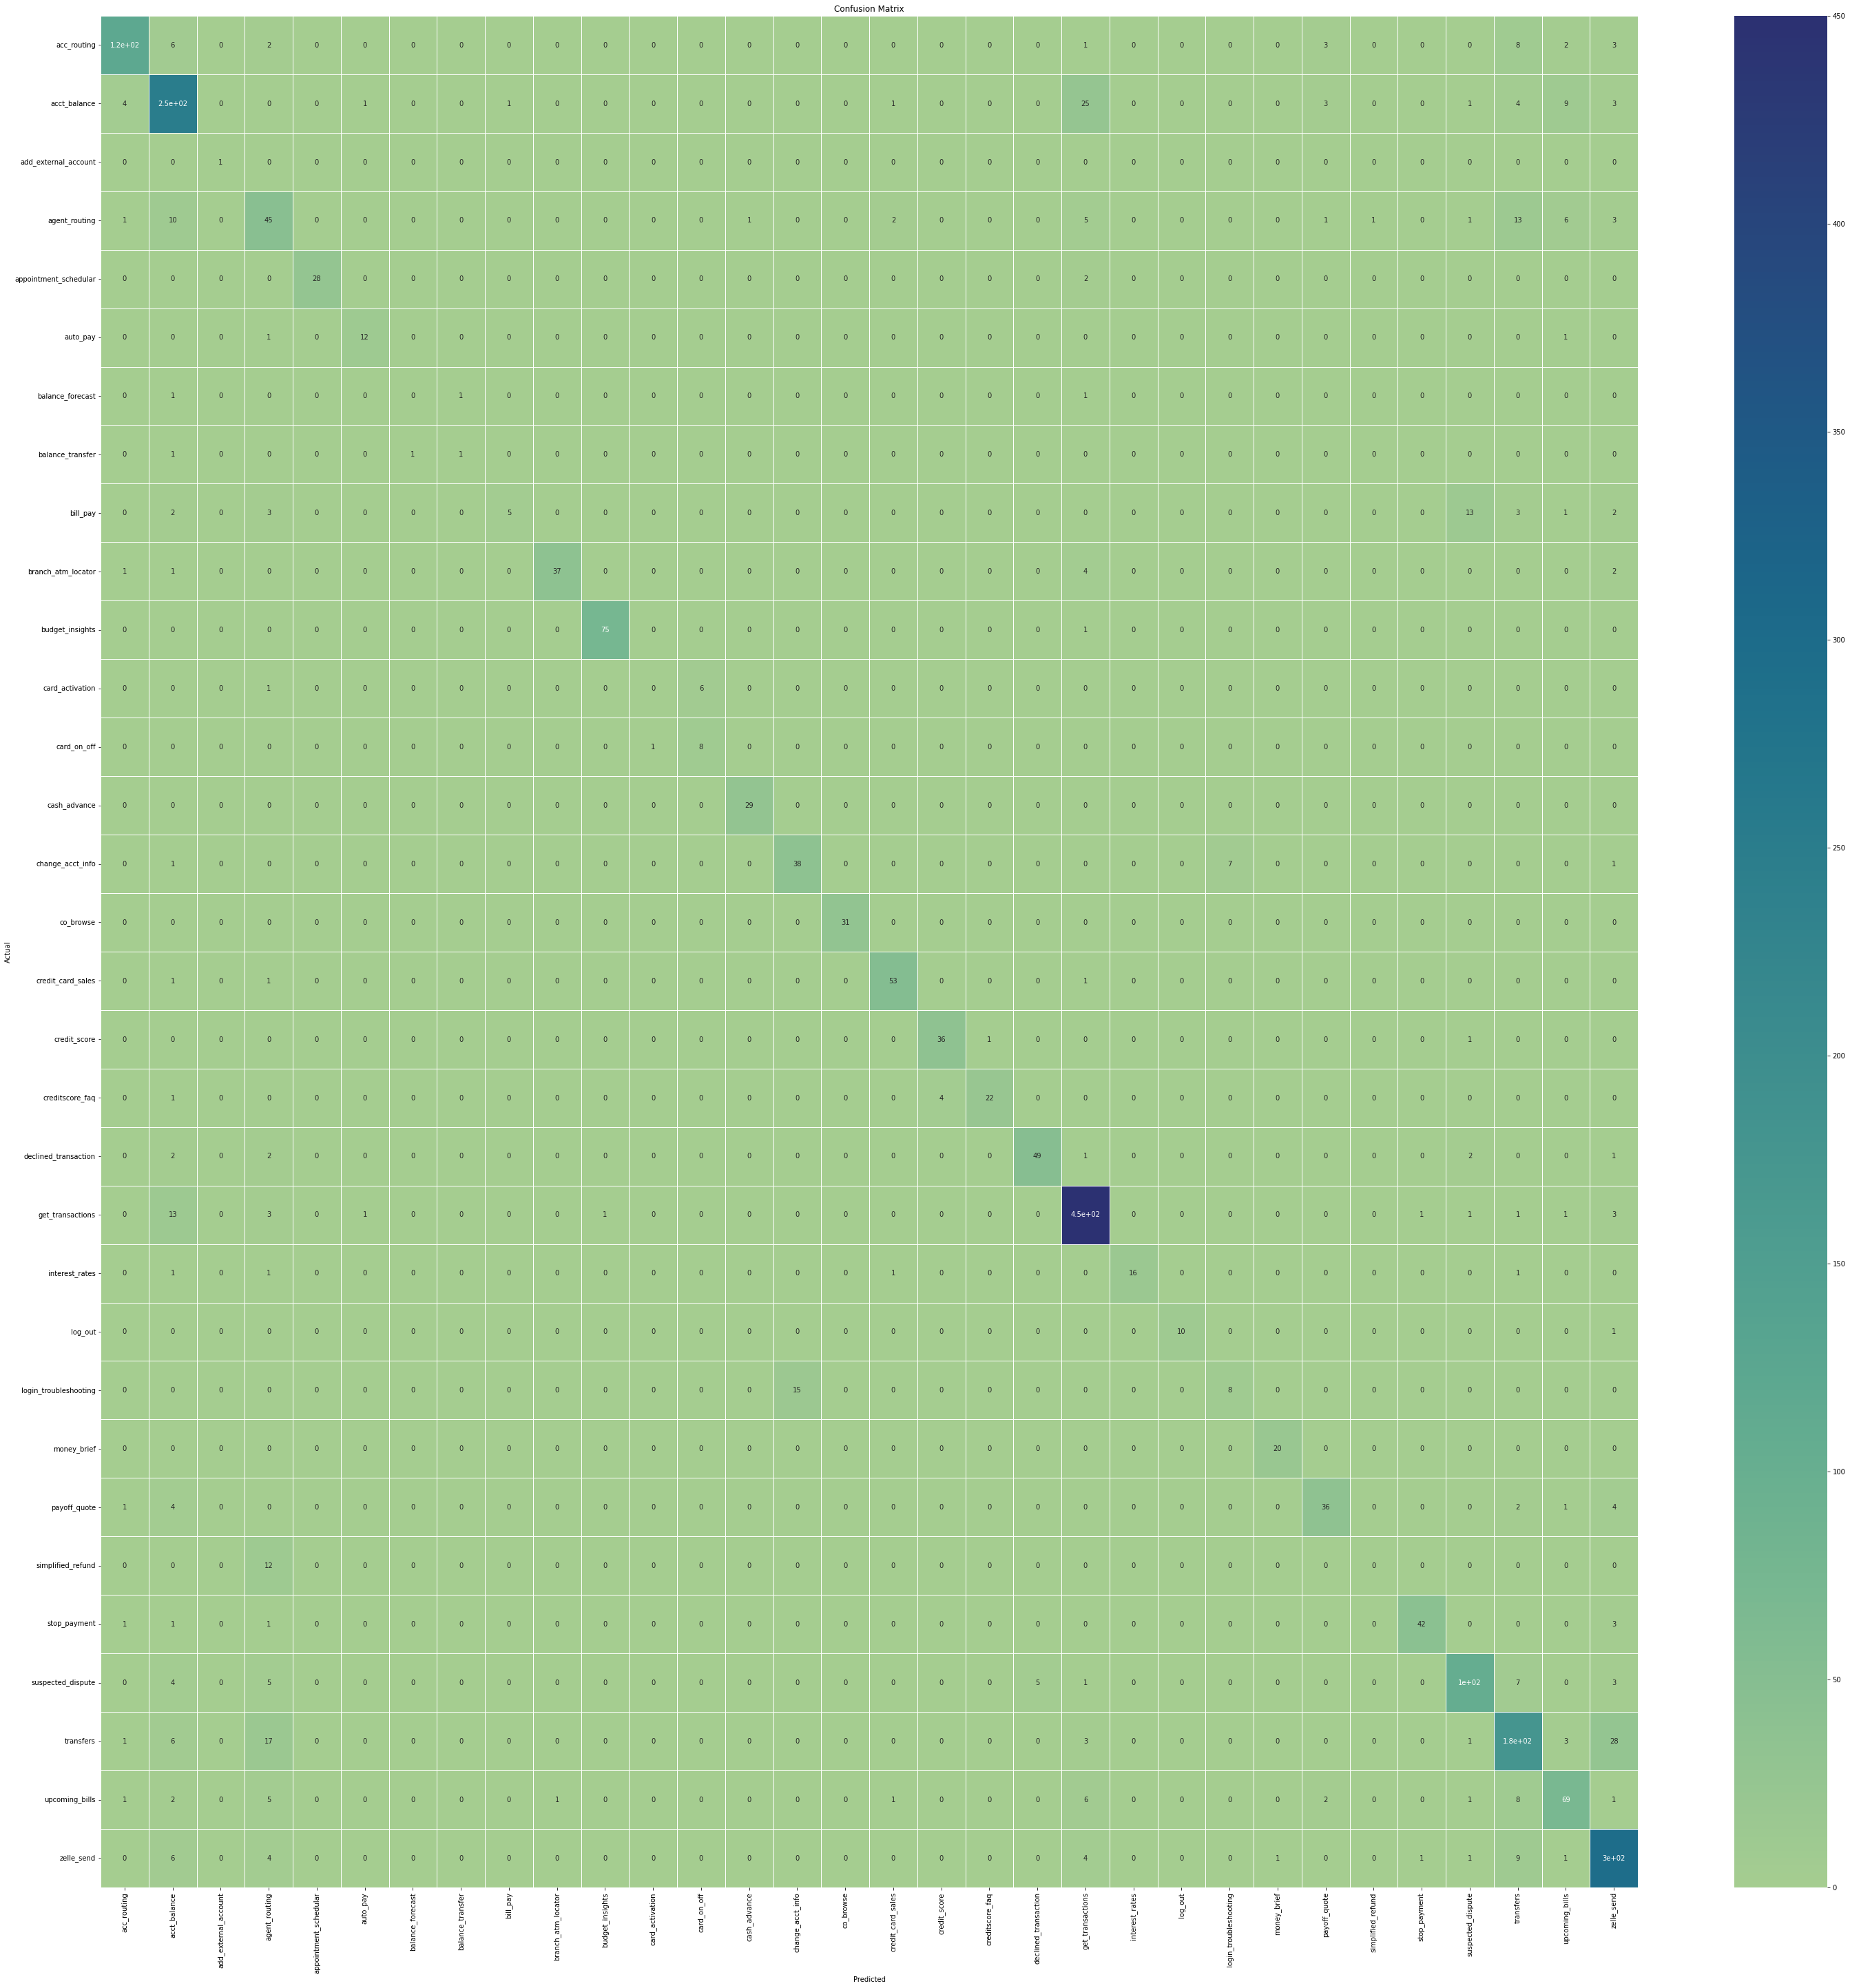

Total True Positives :  2070.0
Total False Positives :  412.0
Total True Negatives :  76530.0
Total False Negatives :  412.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          121           250                     1             45   
TN         2326          2117                  2481           2335   
FP           10            63                     0             58   
FN           25            52                     0             44   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     28        12                 0                 1   
TN                   2452      2466              2478              2478   
FP                      0         2                 1                 1   
FN                      2         2                 3                 2   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP         5                  37               75                0   
TN      2452                2436             2405             2474   
FP         1                   1                1                1   
FN        24                   8                1                7   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            8            29                38         31                 53   
TN         2467          2452              2420       2451               2421   
FP            6             1                15          0                  5   
FN            1             0                 9          0                  3   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            36               22                    49               450   
TN          2440             2454                  2420              1952   
FP             4                1                     5                55   
FN             2                5                     8                25   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              16       10                      8           20            36   
TN            2462     2471                   2452         2461          2425   
FP               0        0                      7            1             9   
FN               4        1                     15            0            12   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            42                105        177   
TN               2469          2432               2330       2190   
FP                  1             2                 22         56   
FN                 12             6                 25         59   

    upcoming_bills  zelle_send  
TP              69         296  
TN            2360        2101  
FP              25          58  
FN              28          27

In [ ]:
# TF-IDF Vectorizer and SVM model 

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


# Creating a pipeline object
SVM_classifier_model1_pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),       
     ('SVC', SVC(kernel='linear', gamma='auto'))         
])
 
 #fit with features
SVM_classifier_model1_pipeline.fit(X_train, y_train)

#fit with features
SVM_classifier_model1_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = SVM_classifier_model1_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted")) #Weighted F1 score since data is imbalanced.

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "SVMTF1")

In [ ]:
res=preprocess_utterance("apple juice i'm sitting at home in apple discharge my car for $#.# and that i did not do i'm sitting right here in front of my tv could you please check that out and cancel it do not pay it")
print(SVM_classifier_model1_pipeline.predict([res]))
print(getEntities(res))

['get_transactions']
(apple juice am,)


In [ ]:
res=preprocess_utterance("can i withdrawal money without going to the physical bank?")
print(SVM_classifier_model1_pipeline.predict([res]))
print(getEntities(res))

['branch_atm_locator']
()


In [ ]:
res=preprocess_utterance("miscellaneous electronic payment")
print(SVM_classifier_model1_pipeline.predict([res]))
print(getEntities(res))

['zelle_send']
()


In [ ]:
res=preprocess_utterance("defered payment")
print(SVM_classifier_model1_pipeline.predict([res]))
print(getEntities(res))

['agent_routing']
()


In [ ]:
res=preprocess_utterance("cancel stop payments")
print(SVM_classifier_model1_pipeline.predict([res]))
print(getEntities(res))

['stop_payment']
()


In [ ]:
res=preprocess_utterance("add Bank of America account to pay credit card bill")
print(SVM_classifier_model1_pipeline.predict([res]))
print(getEntities(res))

['upcoming_bills']
(Bank of America,)


In [ ]:
res=preprocess_utterance("add wells fargo account to pay credit card bill")
print(SVM_classifier_model1_pipeline.predict([res]))
print(getEntities(res))

['add_external_account']
(wells fargo,)


##### Using Count Vectorizer

Accuracy: 0.8178887993553586
F1 score: 0.8192527961212979
                       precision    recall  f1-score   support

          acc_routing       0.82      0.79      0.81       146
         acct_balance       0.81      0.81      0.81       302
 add_external_account       1.00      1.00      1.00         1
        agent_routing       0.42      0.55      0.48        89
appointment_schedular       1.00      1.00      1.00        30
             auto_pay       0.86      0.86      0.86        14
     balance_forecast       0.50      0.33      0.40         3
     balance_transfer       0.50      0.33      0.40         3
             bill_pay       0.58      0.48      0.53        29
   branch_atm_locator       0.93      0.91      0.92        45
      budget_insights       0.99      1.00      0.99        76
      card_activation       0.33      0.14      0.20         7
          card_on_off       0.50      0.56      0.53         9
         cash_advance       0.97      1.00      0.98       

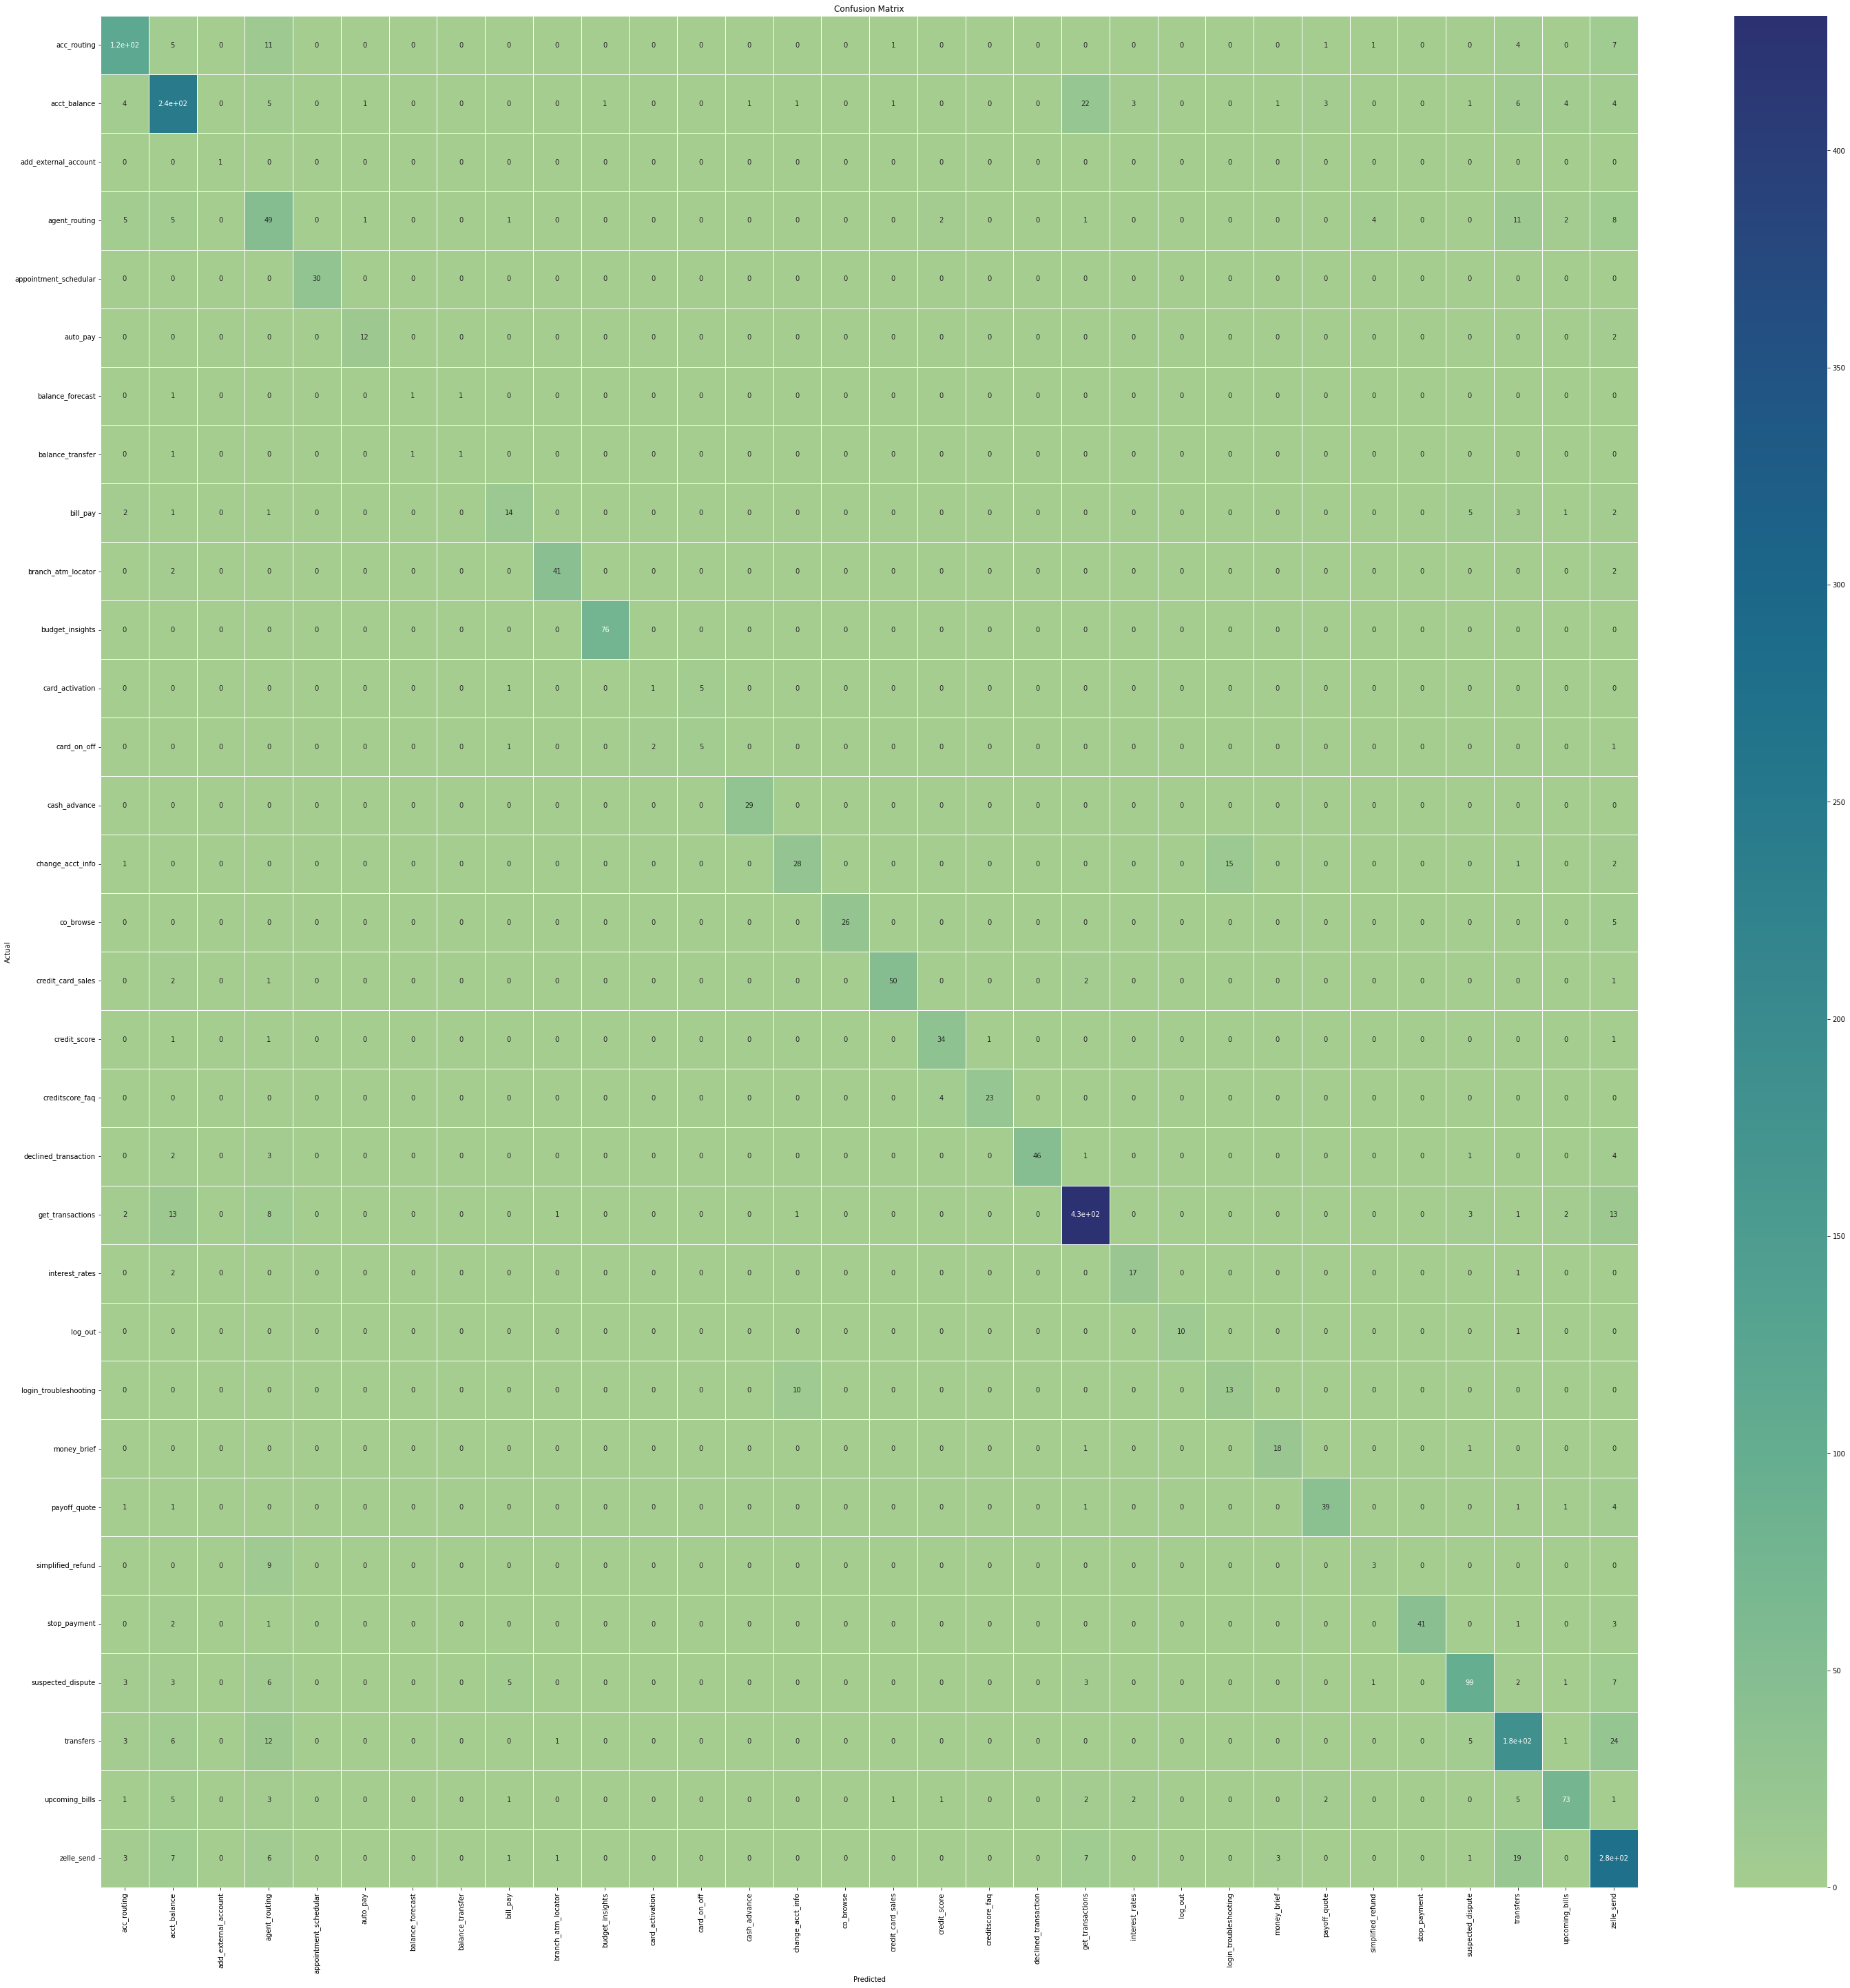

Total True Positives :  2030.0
Total False Positives :  452.0
Total True Negatives :  76490.0
Total False Negatives :  452.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          116           244                     1             49   
TN         2311          2121                  2481           2326   
FP           25            59                     0             67   
FN           30            58                     0             40   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     30        12                 1                 1   
TN                   2452      2466              2478              2478   
FP                      0         2                 1                 1   
FN                      0         2                 2                 2   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP        14                  41               76                1   
TN      2443                2434             2405             2473   
FP        10                   3                1                2   
FN        15                   4                0                6   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            5            29                28         26                 50   
TN         2468          2452              2423       2451               2423   
FP            5             1                12          0                  3   
FN            4             0                19          5                  6   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            34               23                    46               431   
TN          2437             2454                  2425              1967   
FP             7                1                     0                40   
FN             4                4                    11                44   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              17       10                     13           18            39   
TN            2457     2471                   2444         2458          2428   
FP               5        0                     15            4             6   
FN               3        1                     10            2             9   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  3            41                 99        184   
TN               2464          2434               2335       2190   
FP                  6             0                 17         56   
FN                  9             7                 31         52   

    upcoming_bills  zelle_send  
TP              73         275  
TN            2373        2068  
FP              12          91  
FN              24          48

In [ ]:
# Count Vectorizer with unigram and bigram range and SVC model

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Creating a pipeline object
SVM_classifier_mode2_pipeline = Pipeline([
    ('vectorizer_tfidf', CountVectorizer(ngram_range=(1,2))),       
     ('SVC', SVC(kernel='linear', gamma='auto'))         
])

#fit with features
SVM_classifier_mode2_pipeline.fit(X_train, y_train)

#get the predictions of X_test using pieline object
y_pred = SVM_classifier_mode2_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="weighted")) #Weighted F1 score since data is imbalanced.

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "SVM1")

In [ ]:
res=preprocess_utterance("apple juice i'm sitting at home in apple discharge my car for $#.# and that i did not do i'm sitting right here in front of my tv could you please check that out and cancel it do not pay it")
print(SVM_classifier_mode2_pipeline.predict([res]))
print(getEntities(res))

['get_transactions']
(apple juice am,)


In [ ]:
res=preprocess_utterance("can i withdrawal money without going to the physical bank?")
print(SVM_classifier_mode2_pipeline.predict([res]))
print(getEntities(res))

['get_transactions']
()


In [ ]:
res=preprocess_utterance("cancel stop payments")
print(SVM_classifier_mode2_pipeline.predict([res]))
print(getEntities(res))

['stop_payment']
()


In [ ]:
res=preprocess_utterance("stop payments to truthfinder. they know through a phone call and emails i do not authorize truthfinder to get money from me. what else do i need to do to get them to stop or get yâall from giving them my money.")
print(SVM_classifier_mode2_pipeline.predict([res]))
print(getEntities(res))

['money_brief']
()


In [ ]:
res=preprocess_utterance("Checking 12345")
print(SVM_classifier_mode2_pipeline.predict([res]))
print(getEntities(res))

['agent_routing']
(12345,)


In [ ]:
res=preprocess_utterance("add Bank of America account to pay credit card bill")
print(SVM_classifier_mode2_pipeline.predict([res]))
print(getEntities(res))

['add_external_account']
(Bank of America,)


In [ ]:
res=preprocess_utterance("add Bank of America account")
print(SVM_classifier_mode2_pipeline.predict([res]))
print(getEntities(res))

['zelle_send']
(Bank of America,)


In [ ]:
res=preprocess_utterance("This month's balance forecast")
print(SVM_classifier_mode2_pipeline.predict([res]))
print(getEntities(res))

### Using RandomForest Classifier with TF-IDF Vectorizer and CountVectorizer

##### Using TF-IDF Vectorizer

Accuracy: 0.8182917002417406
F1 score: 0.814410642529671
                       precision    recall  f1-score   support

          acc_routing       0.93      0.78      0.85       144
         acct_balance       0.83      0.82      0.82       303
 add_external_account       1.00      0.50      0.67         2
        agent_routing       0.49      0.42      0.46        78
appointment_schedular       1.00      1.00      1.00        26
             auto_pay       1.00      0.75      0.86         8
     balance_forecast       0.00      0.00      0.00         3
     balance_transfer       0.00      0.00      0.00         2
             bill_pay       0.44      0.33      0.38        33
   branch_atm_locator       0.97      0.87      0.92        45
      budget_insights       1.00      0.97      0.98        65
      card_activation       0.75      0.55      0.63        11
          card_on_off       0.40      0.40      0.40         5
         cash_advance       0.97      0.97      0.97        

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


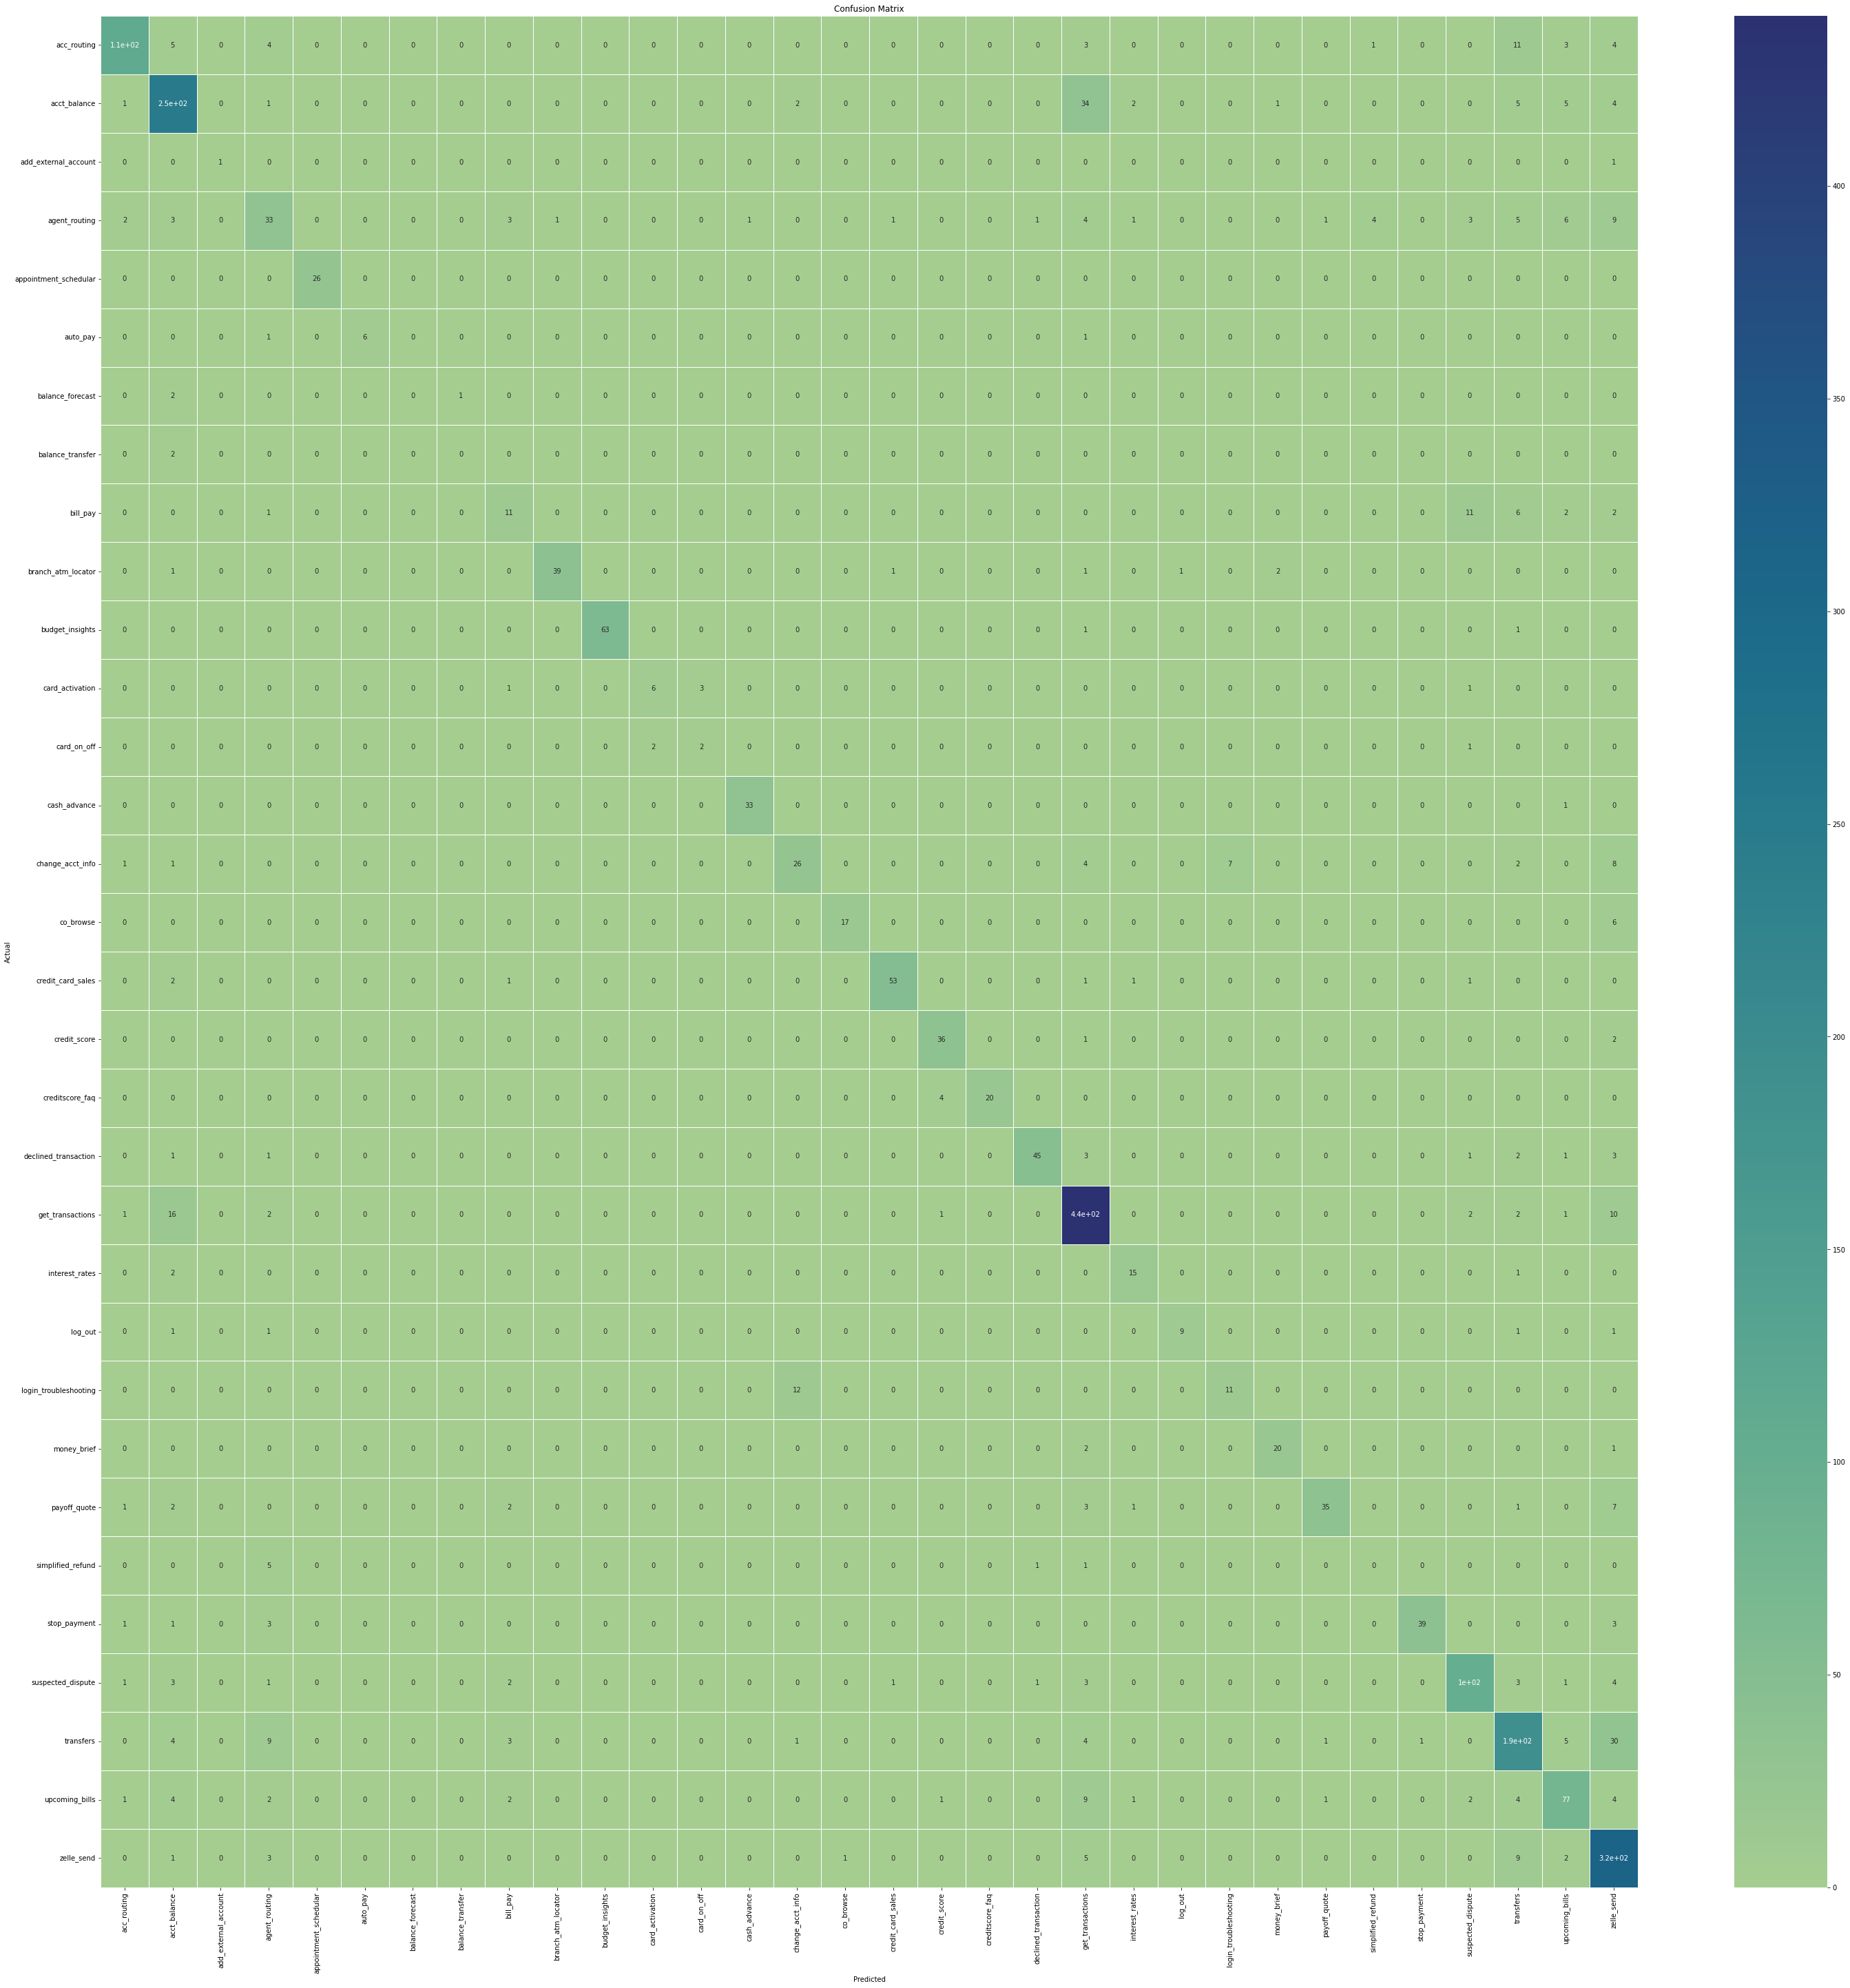

Total True Positives :  2031.0
Total False Positives :  451.0
Total True Negatives :  76491.0
Total False Negatives :  451.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          113           248                     1             33   
TN         2329          2128                  2480           2370   
FP            9            51                     0             34   
FN           31            55                     1             45   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     26         6                 0                 0   
TN                   2456      2474              2479              2479   
FP                      0         0                 0                 1   
FN                      0         2                 3                 2   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP        11                  39               63                6   
TN      2435                2436             2417             2469   
FP        14                   1                0                2   
FN        22                   6                2                5   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            2            33                26         17                 53   
TN         2474          2447              2418       2458               2420   
FP            3             1                15          1                  3   
FN            3             1                23          6                  6   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            36               20                    45               440   
TN          2437             2458                  2422              1927   
FP             6                0                     3                80   
FN             3                4                    12                35   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              15        9                     11           20            35   
TN            2458     2468                   2452         2456          2427   
FP               6        1                      7            3             3   
FN               3        4                     12            3            17   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            39                101        190   
TN               2470          2434               2339       2181   
FP                  5             1                 22         53   
FN                  7             8                 20         58   

    upcoming_bills  zelle_send  
TP              77         316  
TN            2347        2046  
FP              27          99  
FN              31          21

In [ ]:
# Using RandomForestClassifier and TF-IDF Vectorizer

X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating a pipeline object
randomForestClassifier1_pipeline = Pipeline([
    ('tfidfVectorizer', TfidfVectorizer()),       
     ('RandomForest',RandomForestClassifier())         
])

#fit with features 
randomForestClassifier1_pipeline.fit(X_train, y_train)

#get the predictions of X_test
y_pred = randomForestClassifier1_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "RFTF")

In [ ]:
res=preprocess_utterance("add Bank of America account to my accounts")
print(randomForestClassifier1_pipeline.predict([res]))
print(getEntities(res))

['acct_balance']
(Bank of America,)


In [ ]:
res=preprocess_utterance("This month's balance forecast")
print(randomForestClassifier1_pipeline.predict([res]))
print(getEntities(res))

['balance_transfer']
(This month,)


In [ ]:
res=preprocess_utterance("Automatic billing of bank account for credit card")
print(randomForestClassifier1_pipeline.predict([res]))
print(getEntities(res))

['agent_routing']
()


##### Using Count Vectorizer

Accuracy: 0.8001611603545528
F1 score: 0.7993632430871367
                       precision    recall  f1-score   support

          acc_routing       0.80      0.80      0.80       140
         acct_balance       0.80      0.80      0.80       297
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.27      0.35      0.31        74
appointment_schedular       1.00      0.90      0.95        21
             auto_pay       1.00      0.79      0.88        19
     balance_forecast       1.00      0.50      0.67         2
     balance_transfer       1.00      0.50      0.67         4
             bill_pay       0.52      0.30      0.38        40
   branch_atm_locator       0.92      0.87      0.89        38
      budget_insights       0.94      0.95      0.94        78
      card_activation       0.54      0.54      0.54        13
          card_on_off       0.20      0.10      0.13        10
         cash_advance       0.94      0.97      0.96       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


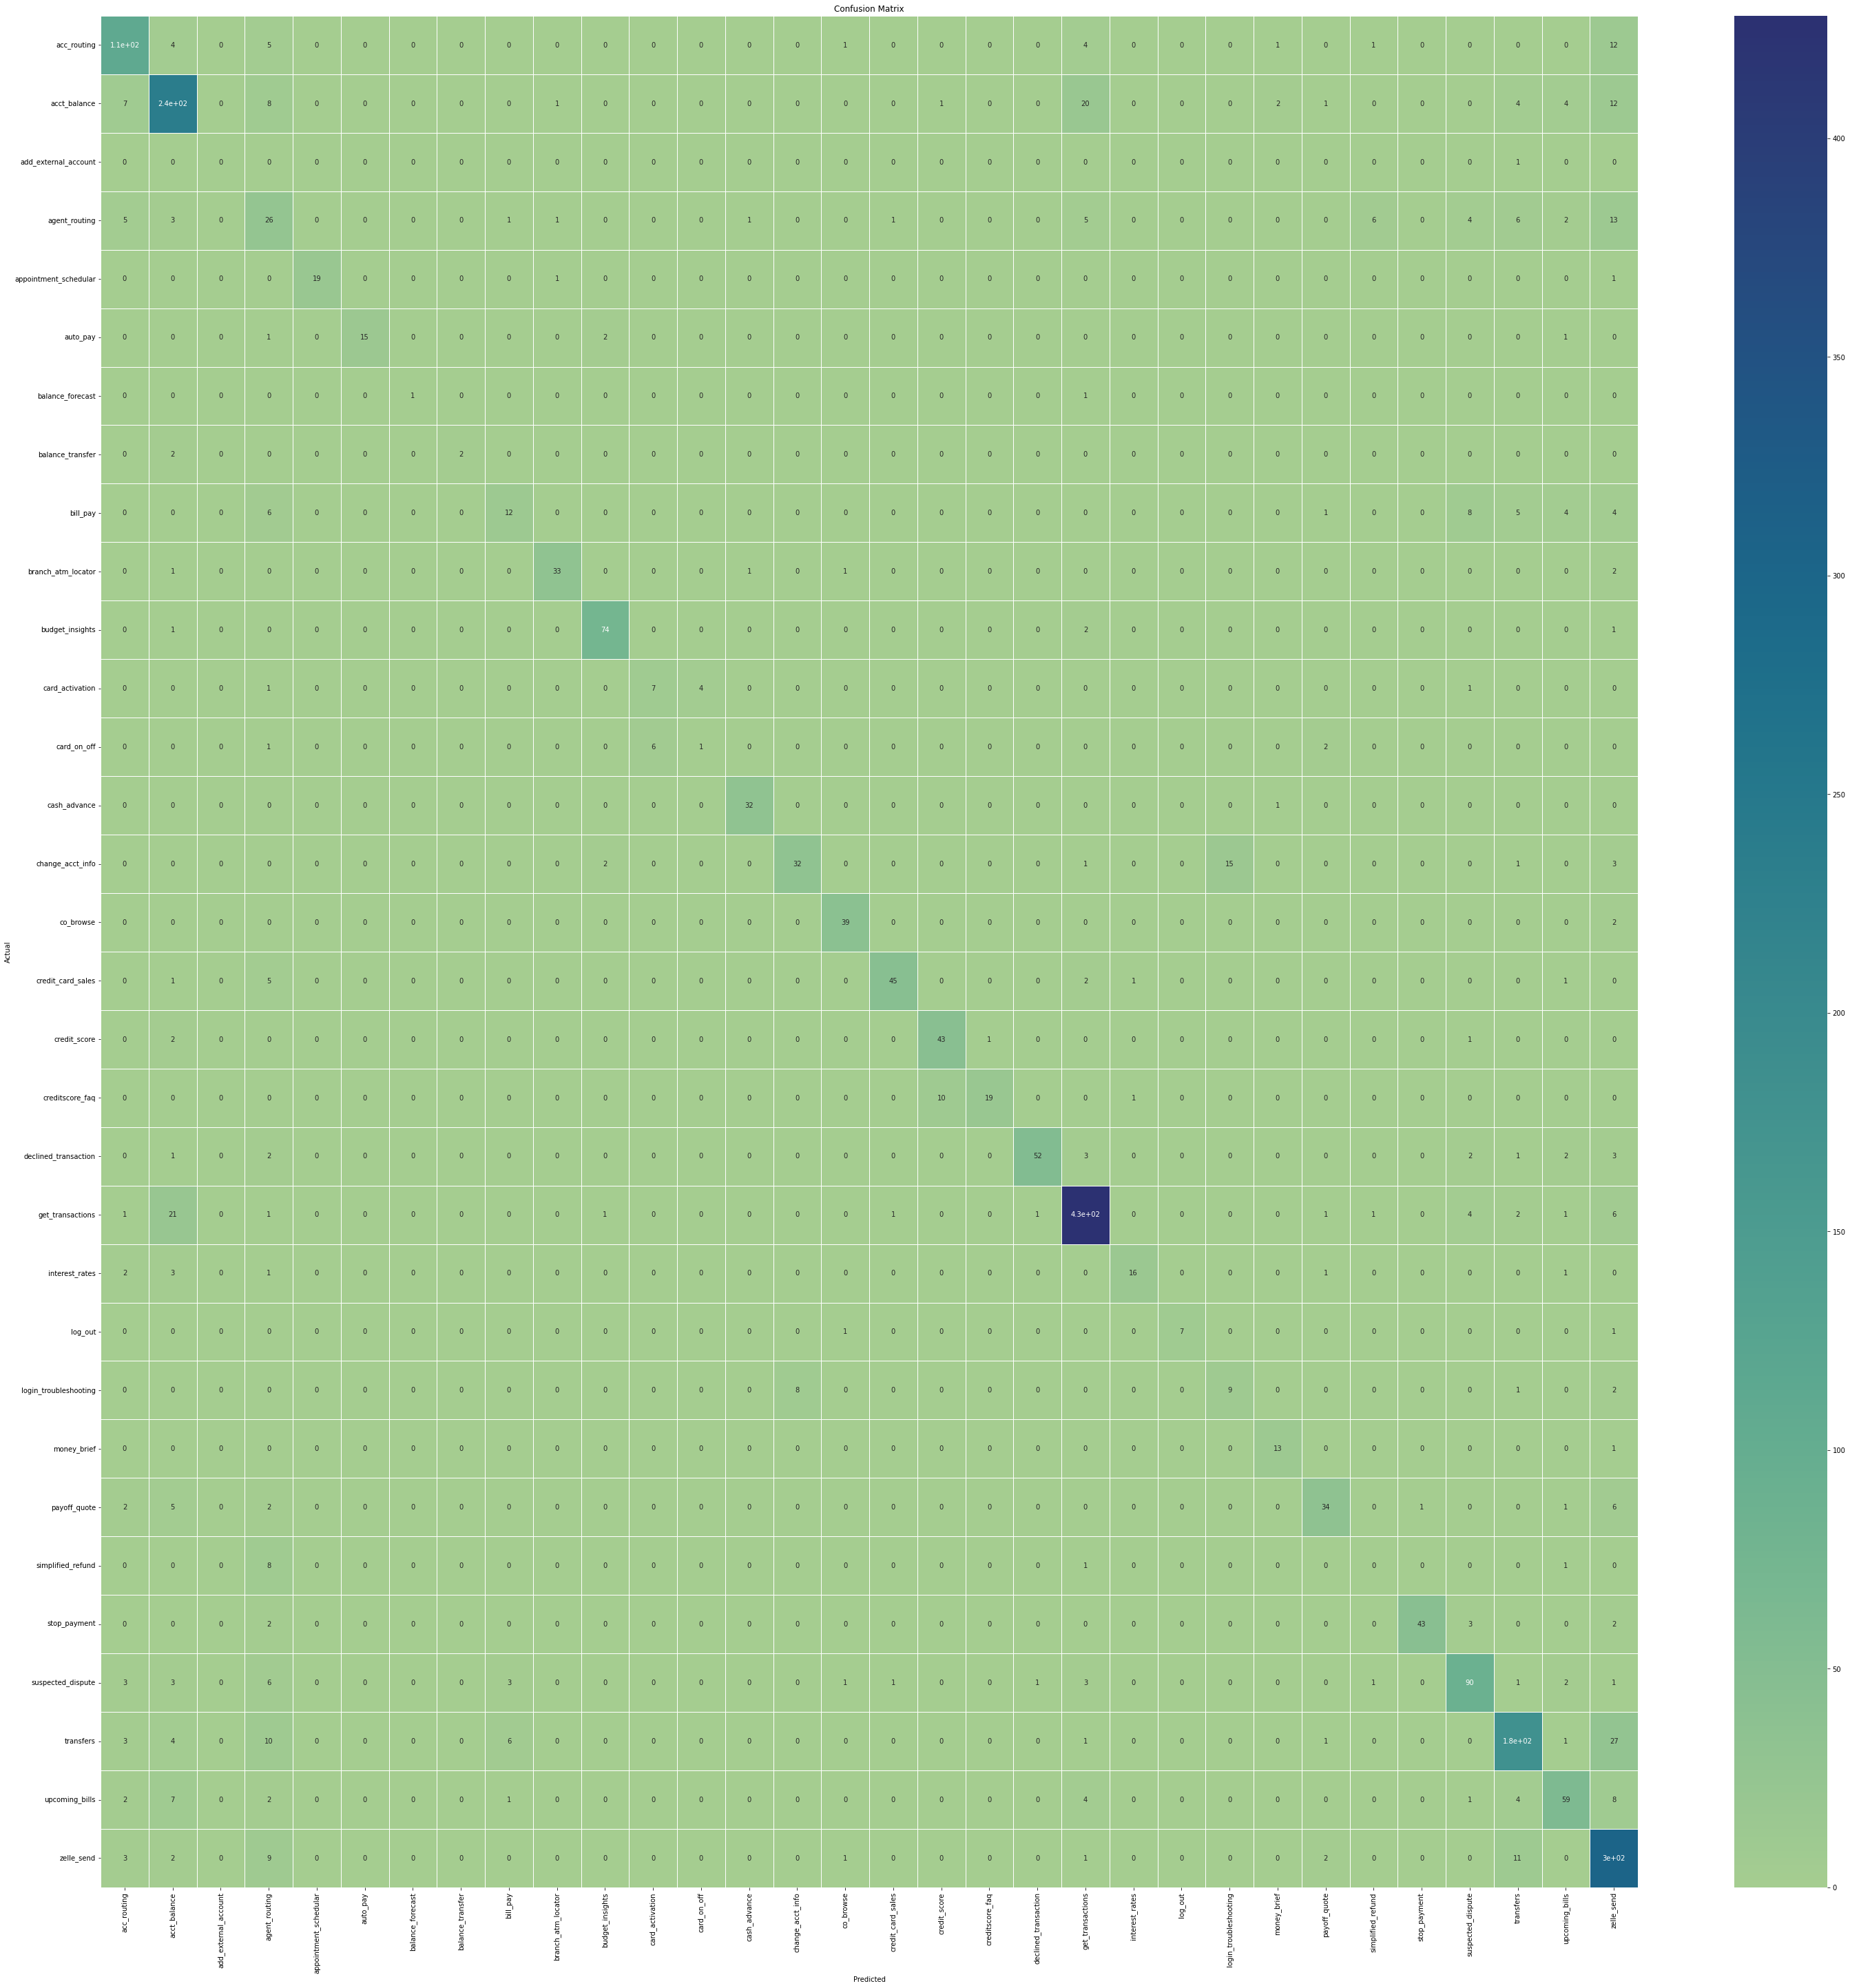

Total True Positives :  1986.0
Total False Positives :  496.0
Total True Negatives :  76446.0
Total False Negatives :  496.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          112           237                     0             26   
TN         2314          2125                  2481           2338   
FP           28            60                     0             70   
FN           28            60                     1             48   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     19        15                 1                 2   
TN                   2461      2463              2480              2478   
FP                      0         0                 0                 0   
FN                      2         4                 1                 2   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP        12                  33               74                7   
TN      2431                2441             2399             2463   
FP        11                   3                5                6   
FN        28                   5                4                6   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            1            32                32         39                 45   
TN         2468          2447              2420       2436               2424   
FP            4             2                 8          5                  3   
FN            9             1                22          2                 10   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            43               19                    52               428   
TN          2424             2451                  2414              1965   
FP            11                1                     2                48   
FN             4               11                    14                41   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              16        7                      9           13            34   
TN            2456     2473                   2447         2464          2422   
FP               2        0                     15            4             9   
FN               8        2                     11            1            17   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            43                 90        182   
TN               2463          2431               2342       2210   
FP                  9             1                 24         37   
FN                 10             7                 26         53   

    upcoming_bills  zelle_send  
TP              59         304  
TN            2373        2042  
FP              21         107  
FN              29          29

In [ ]:
# Using RandomForestClassifier and Count Vectorizer 

countVectorizer = CountVectorizer(ngram_range=(1,2))
X = countVectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

randomForestClassifier2 = RandomForestClassifier()

#fit with features 
randomForestClassifier2.fit(X_train, y_train)

#get the predictions of X_test
y_pred = randomForestClassifier2.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "RF1")

In [ ]:
res=preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?")
print(randomForestClassifier2.predict(countVectorizer.transform([res])))
print(getEntities(res))

['get_transactions']
(hello am bank, the end of this year)


In [ ]:
res=preprocess_utterance("This month's balance forecast")
print(randomForestClassifier2.predict(countVectorizer.transform([res])))
print(getEntities(res))

['balance_transfer']
(This month,)


In [ ]:
res=preprocess_utterance("Automatic billing of bank account for credit card")
print(randomForestClassifier2.predict(countVectorizer.transform([res])))
print(getEntities(res))

['auto_pay']
()


In [ ]:
res=preprocess_utterance("how can i cancel automatic withdrawals")
print(randomForestClassifier2.predict(countVectorizer.transform([res])))
print(getEntities(res))

['get_transactions']
()


In [ ]:
res=preprocess_utterance("how do i do a balance transfer from a credit card a us bank credit card to a different credit card that i applied for can i do that")
print(randomForestClassifier2.predict(countVectorizer.transform([res])))
print(getEntities(res))

['bill_pay']
()


### Using RandomOverSampler to balance the imbalanced data

#### Using SVM

Accuracy: 0.8376309427880742
F1 score: 0.8418370295878461
                       precision    recall  f1-score   support

          acc_routing       0.83      0.82      0.83       147
         acct_balance       0.85      0.84      0.85       302
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.40      0.53      0.45        87
appointment_schedular       1.00      0.97      0.98        30
             auto_pay       0.80      0.86      0.83        14
     balance_forecast       1.00      0.50      0.67         2
     balance_transfer       0.50      0.25      0.33         4
             bill_pay       0.28      0.38      0.33        34
   branch_atm_locator       0.96      0.98      0.97        45
      budget_insights       1.00      0.97      0.99        76
      card_activation       0.50      0.44      0.47         9
          card_on_off       0.44      0.57      0.50         7
         cash_advance       0.97      1.00      0.98       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


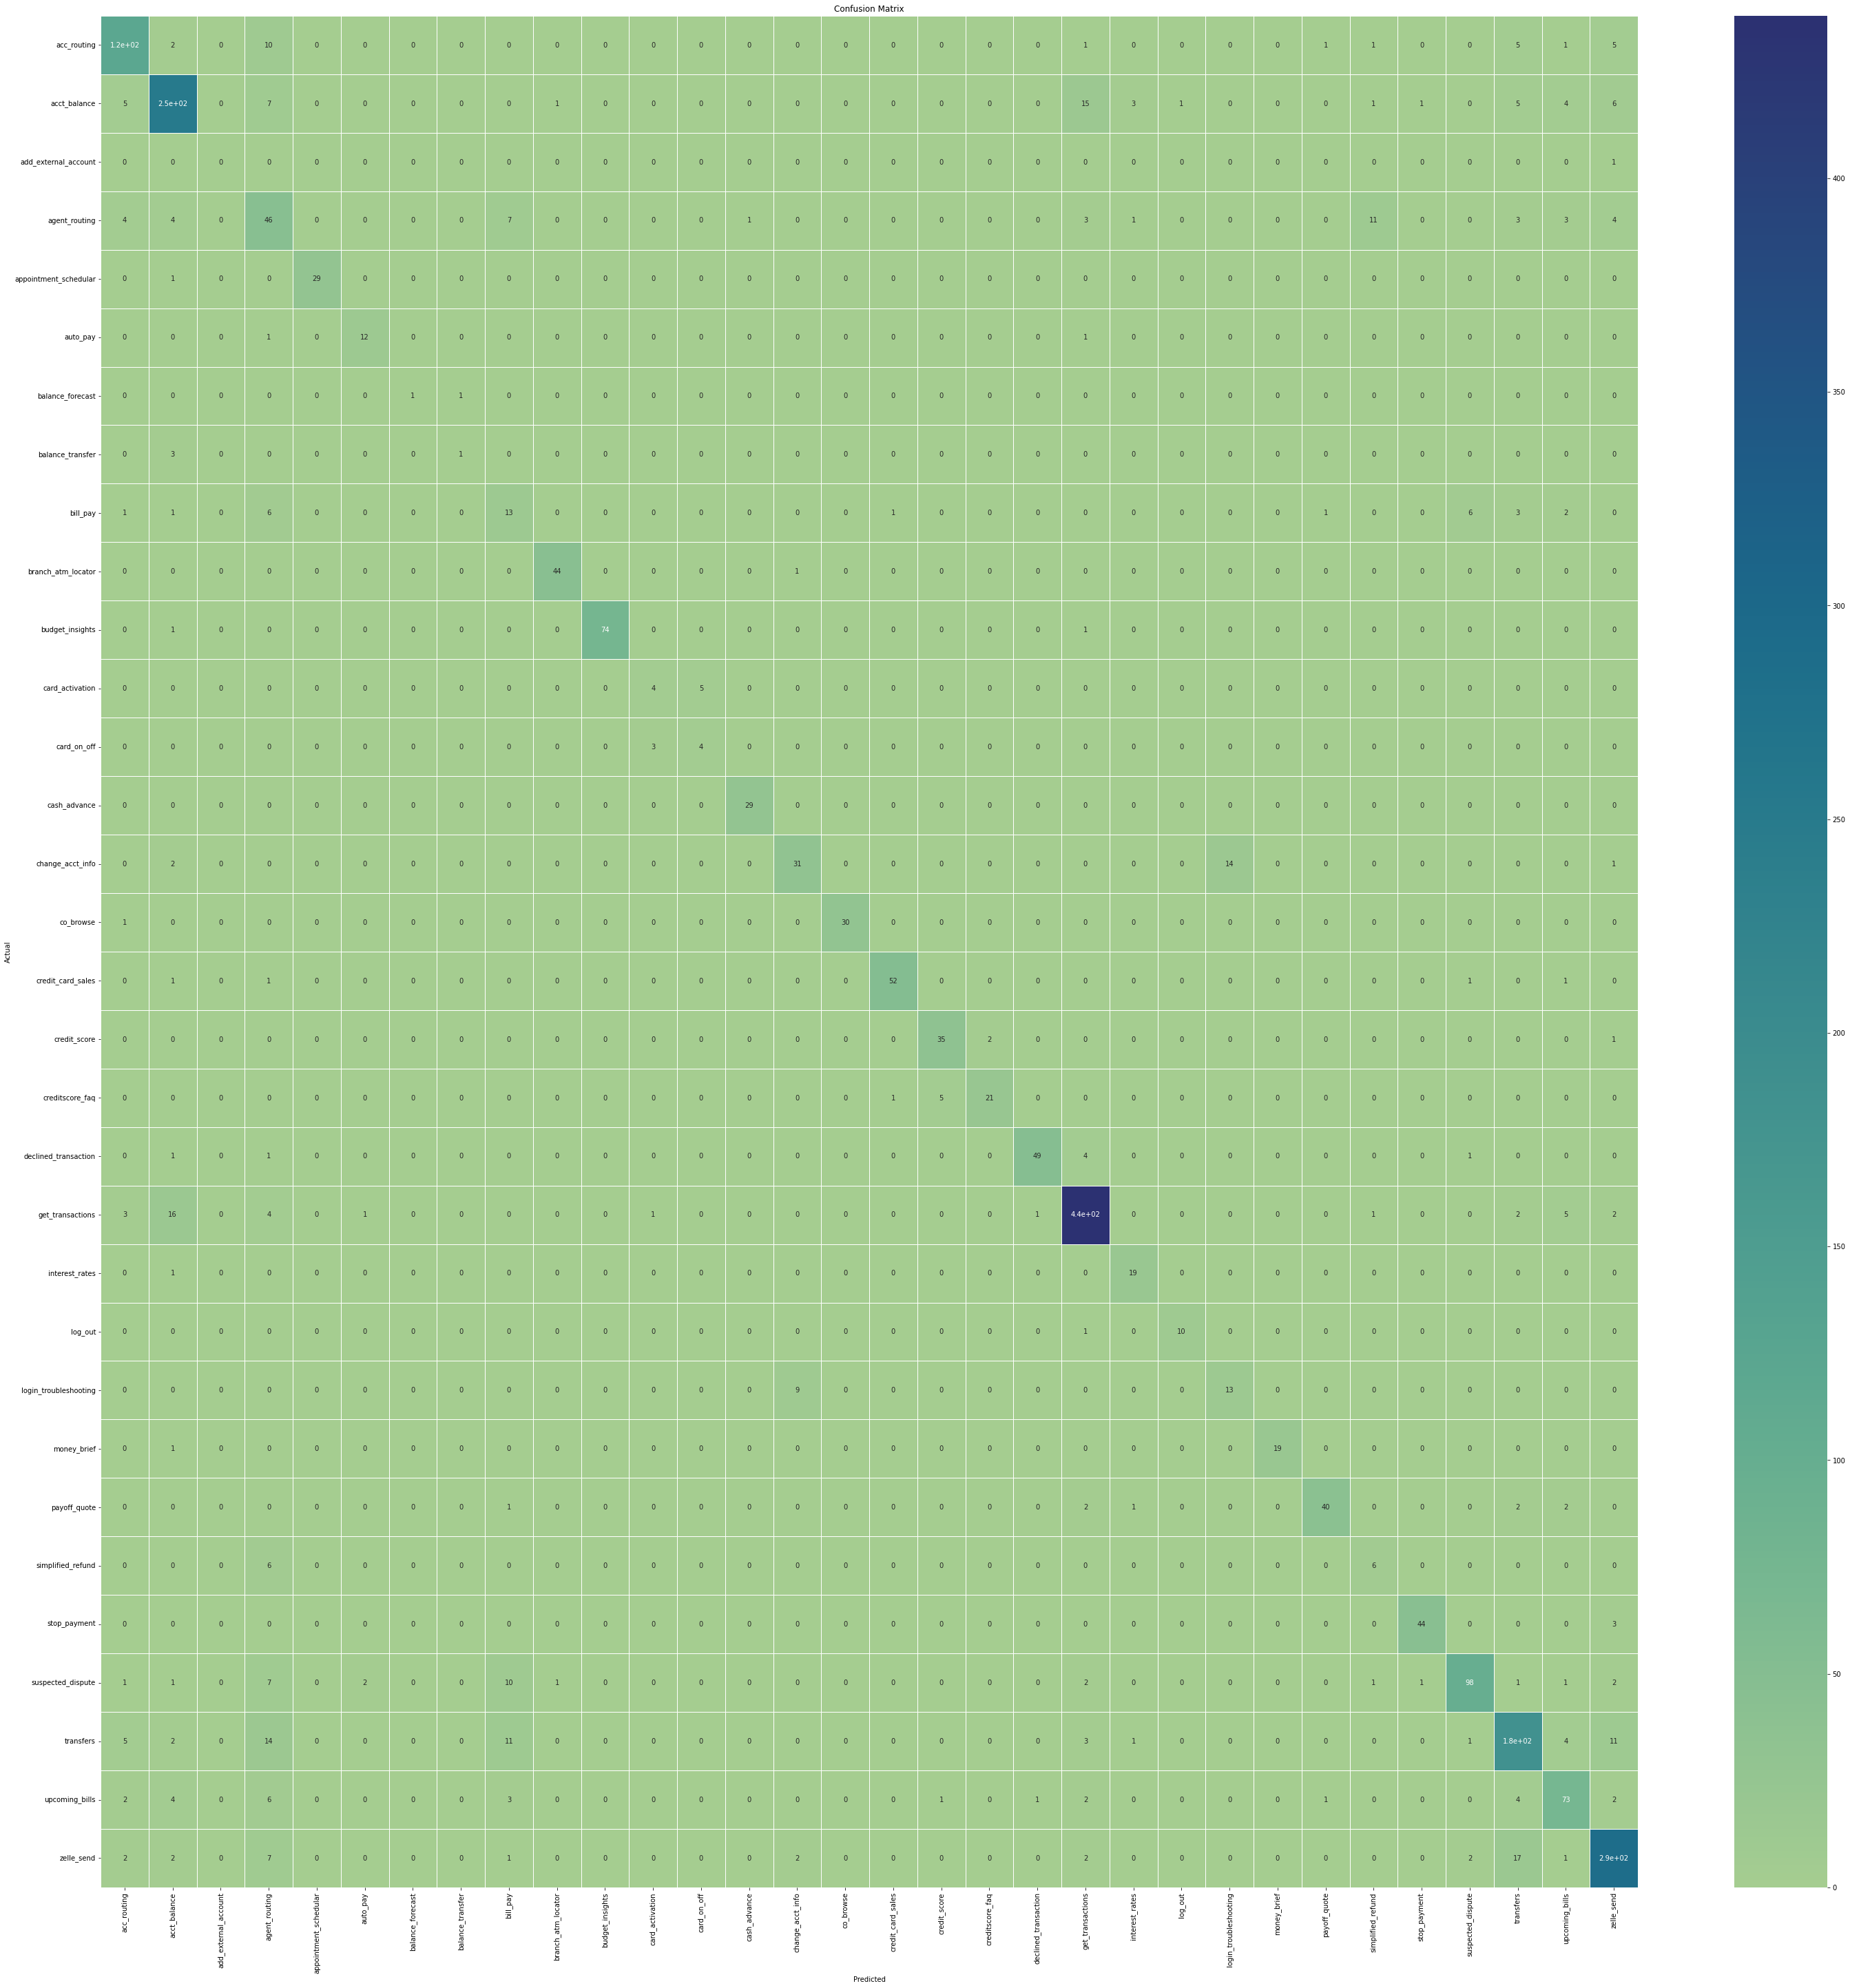

Total True Positives :  2079.0
Total False Positives :  403.0
Total True Negatives :  76539.0
Total False Negatives :  403.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          121           253                     0             46   
TN         2311          2137                  2481           2325   
FP           24            43                     0             70   
FN           26            49                     1             41   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     29        12                 1                 1   
TN                   2452      2465              2480              2477   
FP                      0         3                 0                 1   
FN                      1         2                 1                 3   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP        13                  44               74                4   
TN      2415                2435             2406             2469   
FP        33                   2                0                4   
FN        21                   1                2                5   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            4            29                31         30                 52   
TN         2470          2452              2422       2451               2424   
FP            5             1                12          0                  2   
FN            3             0                17          1                  4   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            35               21                    49               438   
TN          2438             2453                  2424              1971   
FP             6                2                     2                37   
FN             3                6                     7                36   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              19       10                     13           19            40   
TN            2456     2470                   2446         2462          2431   
FP               6        1                     14            0             3   
FN               1        1                      9            1             8   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  6            44                 98        184   
TN               2455          2433               2343       2204   
FP                 15             2                 11         42   
FN                  6             3                 30         52   

    upcoming_bills  zelle_send  
TP              73         286  
TN            2359        2122  
FP              24          38  
FN              26          36

In [ ]:
# We will use TF-IDF Vectorizer with SVM Model (since SVM classifier above gives 
# highest accuracy so far) with RandomOverSampler to balance the data.

tfidfVectorizer = TfidfVectorizer()
X = tfidfVectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())

# X = utterances['lemmatized_utterance']
y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#Uncomment to see the distribution
#print("instances per class label in training data before oversampling.")
#display(Counter(y_train))

#Define RandomOverSampler 

randomOverSampler = RandomOverSampler(random_state=500)
X_train_ROS, y_train_ROS = randomOverSampler.fit_resample(X_train, y_train)

# Check the number of instanaces for each class in oversampled training data
#Uncomment to see the distribution
#print("instances per class label in training data after oversampling.")
#display(Counter(y_train_ROS))

SVM_classifier_model3 = SVC(kernel='linear', gamma='auto')

# Creating a pipeline object
# SVM_classifier_model3_pipeline = Pipeline([
#     ('vectorizer_tfidf', TfidfVectorizer()), 
#     ('randomOverSampler', RandomOverSampler(random_state=500)),     
#      ('SVC', SVC(kernel='linear', gamma='auto'))         
# ])

#fit with oversampled features 
SVM_classifier_model3.fit(X_train_ROS, y_train_ROS)

#get the predictions of X_test
y_pred = SVM_classifier_model3.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "SVMROS1")

In [ ]:
res=preprocess_utterance("hello i am a u.s. bank home mortgage customer and i wanted to know if there will be a shortage or overage on my escrow at the end of this year?")
print(SVM_classifier_model3.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['get_transactions']
(hello am bank, the end of this year)


In [ ]:
res=preprocess_utterance("how can i cancel automatic withdrawals")
print(SVM_classifier_model3.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['auto_pay']
()


In [ ]:
res=preprocess_utterance("This week's balance forecast")
print(SVM_classifier_model3.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['balance_transfer']
(This week,)


In [ ]:
res=preprocess_utterance("Add Bank of America account to pay credit card amount")
print(SVM_classifier_model3.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['add_external_account']
(Add Bank of America,)


#### Using SMOTE to balance the imbalanced data

Accuracy: 0.8243352135374697
F1 score: 0.8247976060543796
                       precision    recall  f1-score   support

          acc_routing       0.71      0.91      0.80       151
         acct_balance       0.89      0.79      0.84       309
        agent_routing       0.39      0.37      0.38       100
appointment_schedular       1.00      0.93      0.96        29
             auto_pay       0.94      0.94      0.94        17
     balance_forecast       0.00      0.00      0.00         0
     balance_transfer       1.00      0.50      0.67         2
             bill_pay       0.31      0.39      0.34        31
   branch_atm_locator       1.00      0.95      0.97        39
      budget_insights       0.99      1.00      0.99        69
      card_activation       0.33      0.40      0.36        10
          card_on_off       0.60      0.53      0.56        17
         cash_advance       1.00      1.00      1.00        25
     change_acct_info       0.82      0.70      0.76       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


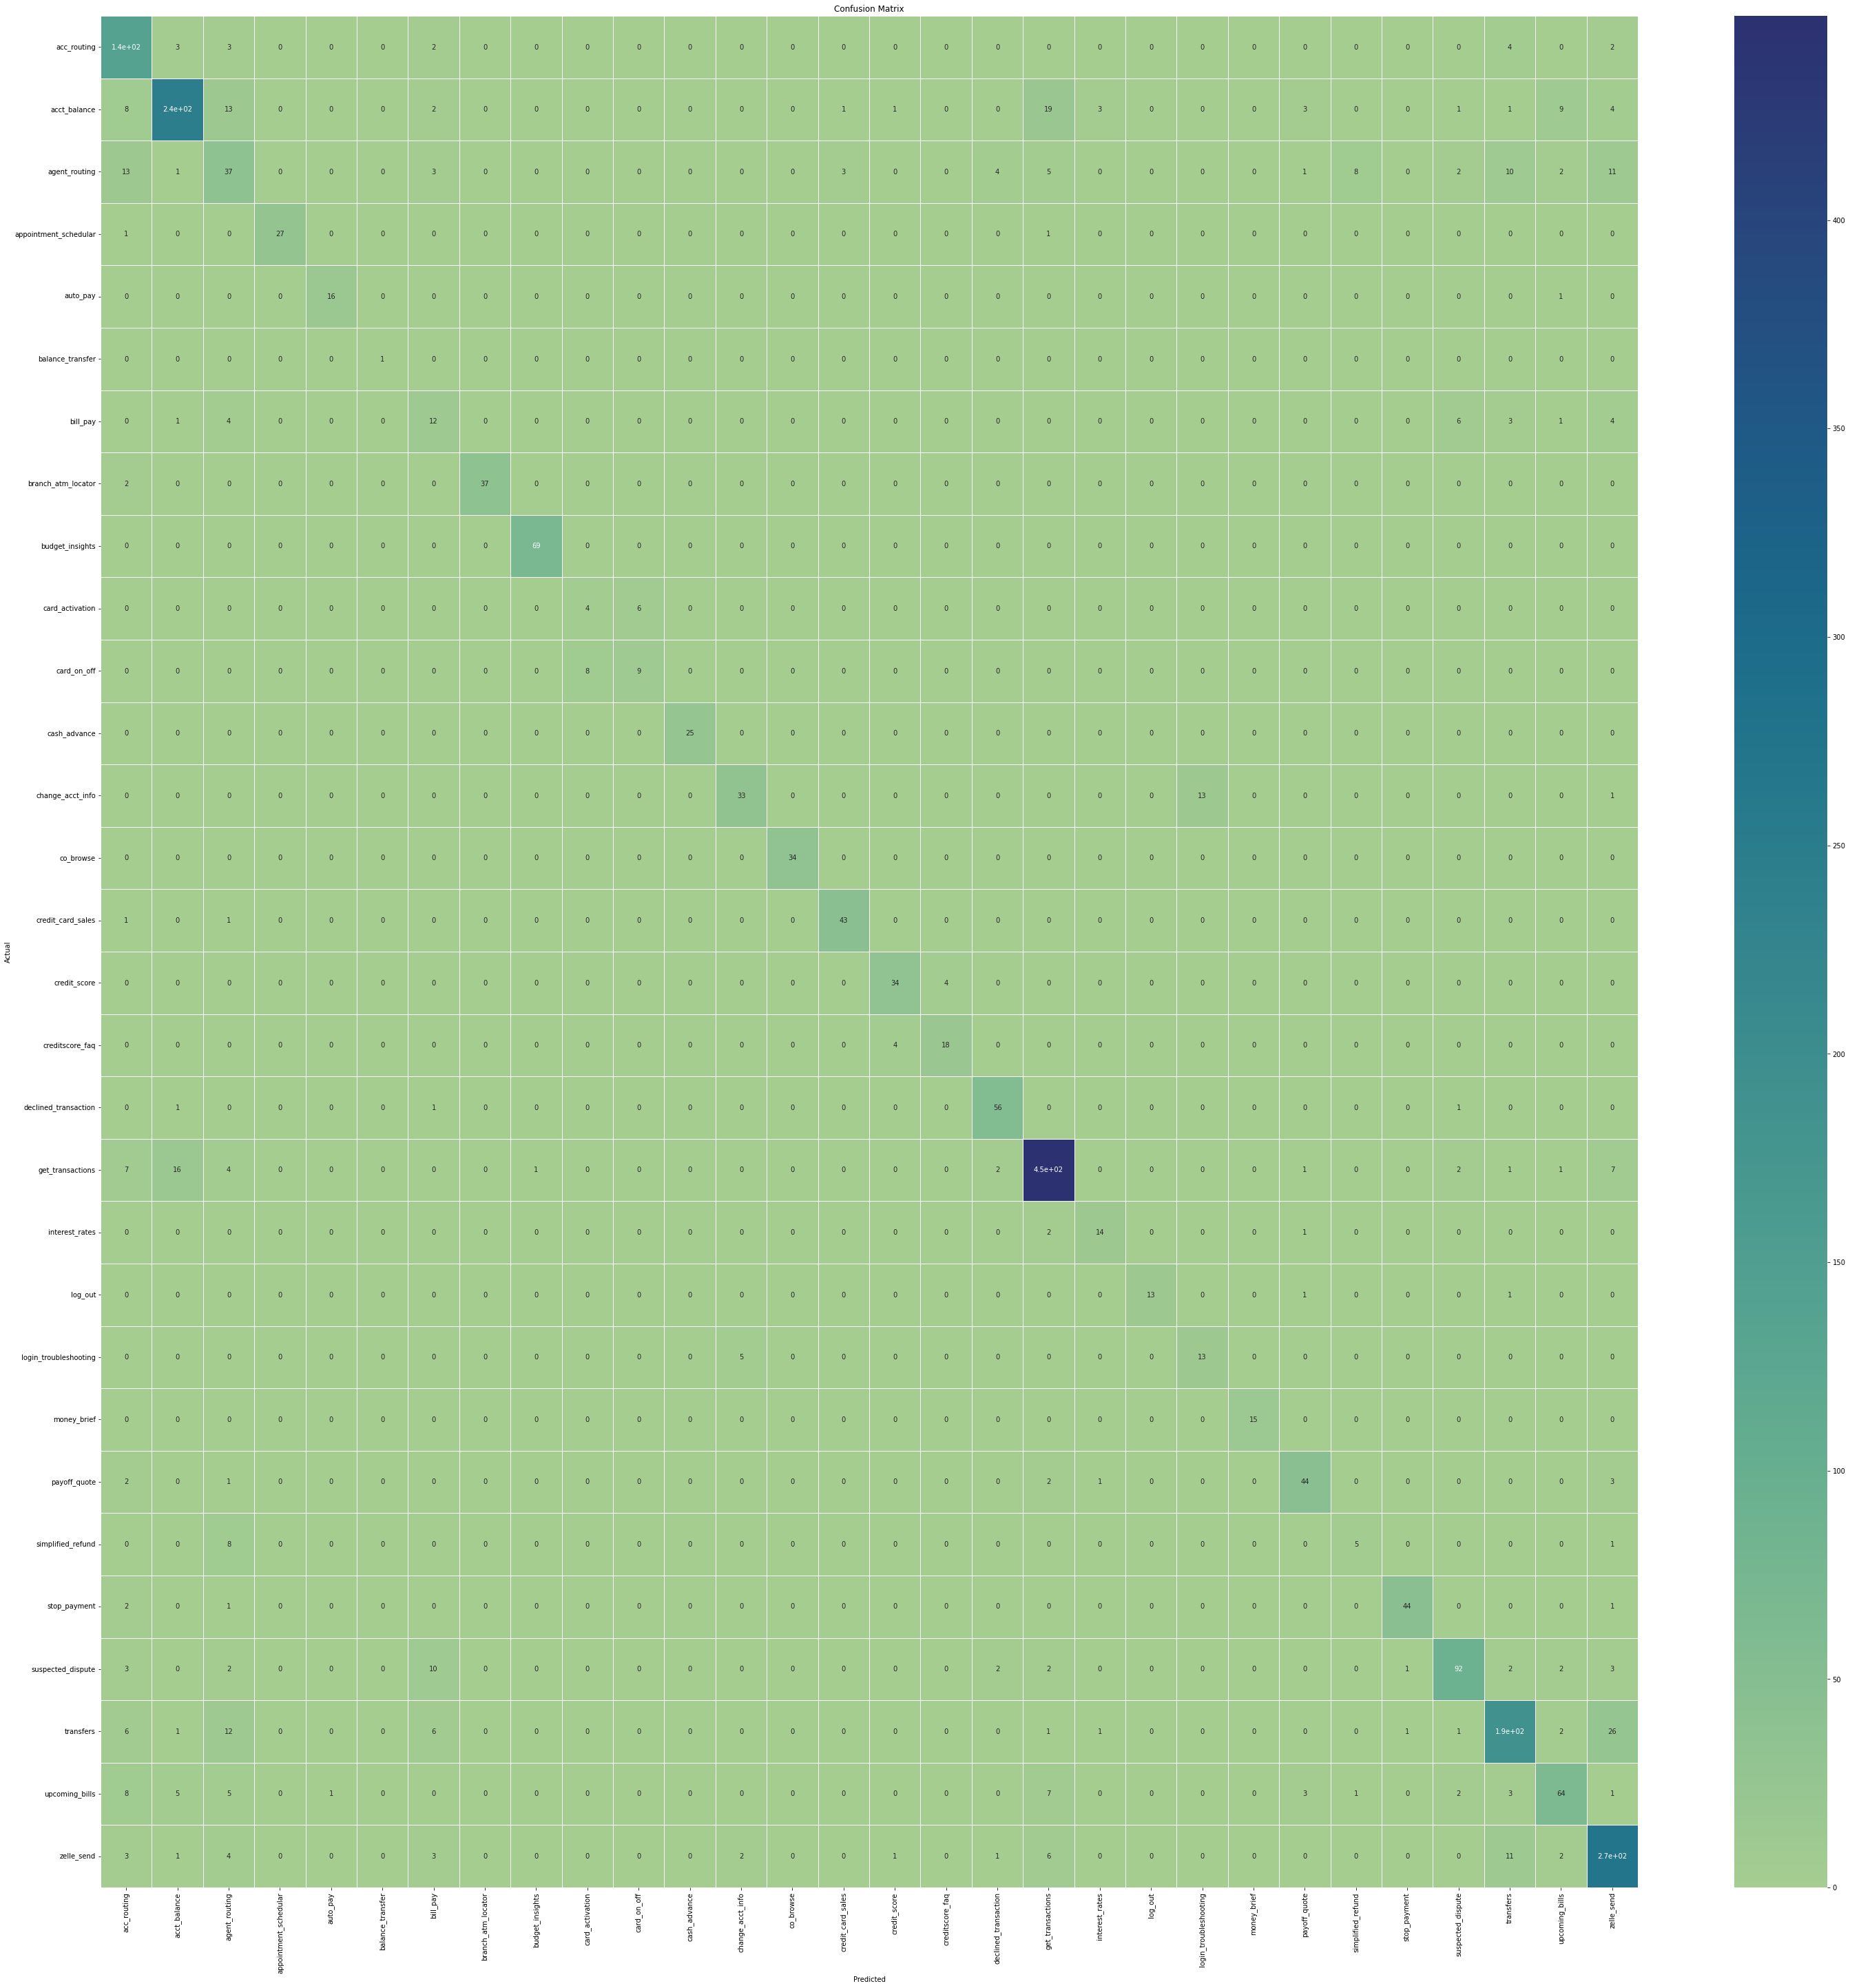

Total True Positives :  2046.0
Total False Positives :  435.0
Total True Negatives :  71514.0
Total False Negatives :  435.0


acc_routing  acct_balance  agent_routing  appointment_schedular  auto_pay  \
TP          137           244             37                     27        16   
TN         2275          2144           2324                   2453      2464   
FP           56            29             58                      0         1   
FN           14            65             63                      2         1   

    balance_transfer  bill_pay  branch_atm_locator  budget_insights  \
TP                 0         1                  12               37   
TN              2481      2480                2424             2443   
FP                 1         0                  27                0   
FN                 0         1                  19                2   

    card_activation  card_on_off  cash_advance  change_acct_info  co_browse  \
TP               69            4             9                25         33   
TN             2412         2464          2459              2457       2428   
FP                1            8             6                 0          7   
FN                0            6             8                 0         14   

    credit_card_sales  credit_score  creditscore_faq  declined_transaction  \
TP                 34            43               34                    18   
TN               2448          2433             2438                  2456   
FP                  0             4                6                     4   
FN                  0             2                4                     4   

    get_transactions  interest_rates  log_out  login_troubleshooting  \
TP                56             449       14                     13   
TN              2414            1946     2460                   2467   
FP                 9              45        5                      0   
FN                 3              42        3                      2   

    money_brief  payoff_quote  simplified_refund  stop_payment  \
TP           13            15                 44             5   
TN         2451          2467               2419          2459   
FP           13             0                 10             9   
FN            5             0                  9             9   

    suspected_dispute  transfers  upcoming_bills  zelle_send  
TP                 44         92             186          64  
TN               2432       2348            2203        2362  
FP                  2         15              36          20  
FN                  4         27              57          36

In [ ]:
# We will use TF-IDF Vectorizer with SVM Model (since SVM classifier above gives 
# highest accuracy so far) with SMOTE to balance the data.

tfidfVectorizer = TfidfVectorizer()
X = tfidfVectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Uncomment to see the distribution
#print("instances per class label in training data before oversampling.")
#display(Counter(y_train))

#Define SMOTE 

smote = SMOTE(k_neighbors=2)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Check the number of instanaces for each class in oversampled training data
#Uncomment to see the distribution
#print("instances per class label in training data after oversampling.")
#display(Counter(y_train_SMOTE))

SVM_classifier_model4 = SVC(kernel='linear', gamma='auto')

#fit with oversampled features 
SVM_classifier_model4.fit(X_train_SMOTE, y_train_SMOTE)

#get the predictions of X_test
y_pred = SVM_classifier_model4.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "SVMSMOT")

In [ ]:
res=preprocess_utterance("This week's balance forecast")
print(SVM_classifier_model4.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['balance_transfer']
(This week,)


In [ ]:
res=preprocess_utterance("Add Bank of America account to pay loan amount")
print(SVM_classifier_model4.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['add_external_account']
(Add Bank of America,)


In [ ]:
res=preprocess_utterance("Estimated balance for my account")
print(SVM_classifier_model4.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['balance_transfer']
()


#### Using RandomForestClassifer and SMOTE

Accuracy: 0.8079505774912705
F1 score: 0.8051507652675007
                       precision    recall  f1-score   support

          acc_routing       0.85      0.81      0.83       202
         acct_balance       0.83      0.78      0.81       450
 add_external_account       0.00      0.00      0.00         1
        agent_routing       0.45      0.49      0.47       135
appointment_schedular       0.97      0.97      0.97        36
             auto_pay       0.80      0.75      0.77        16
     balance_forecast       1.00      0.25      0.40         4
     balance_transfer       0.67      0.50      0.57         4
             bill_pay       0.62      0.39      0.48        59
   branch_atm_locator       0.92      0.80      0.85        55
      budget_insights       0.95      0.97      0.96        95
      card_activation       0.36      0.40      0.38        10
          card_on_off       0.64      0.53      0.58        17
         cash_advance       0.96      1.00      0.98       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


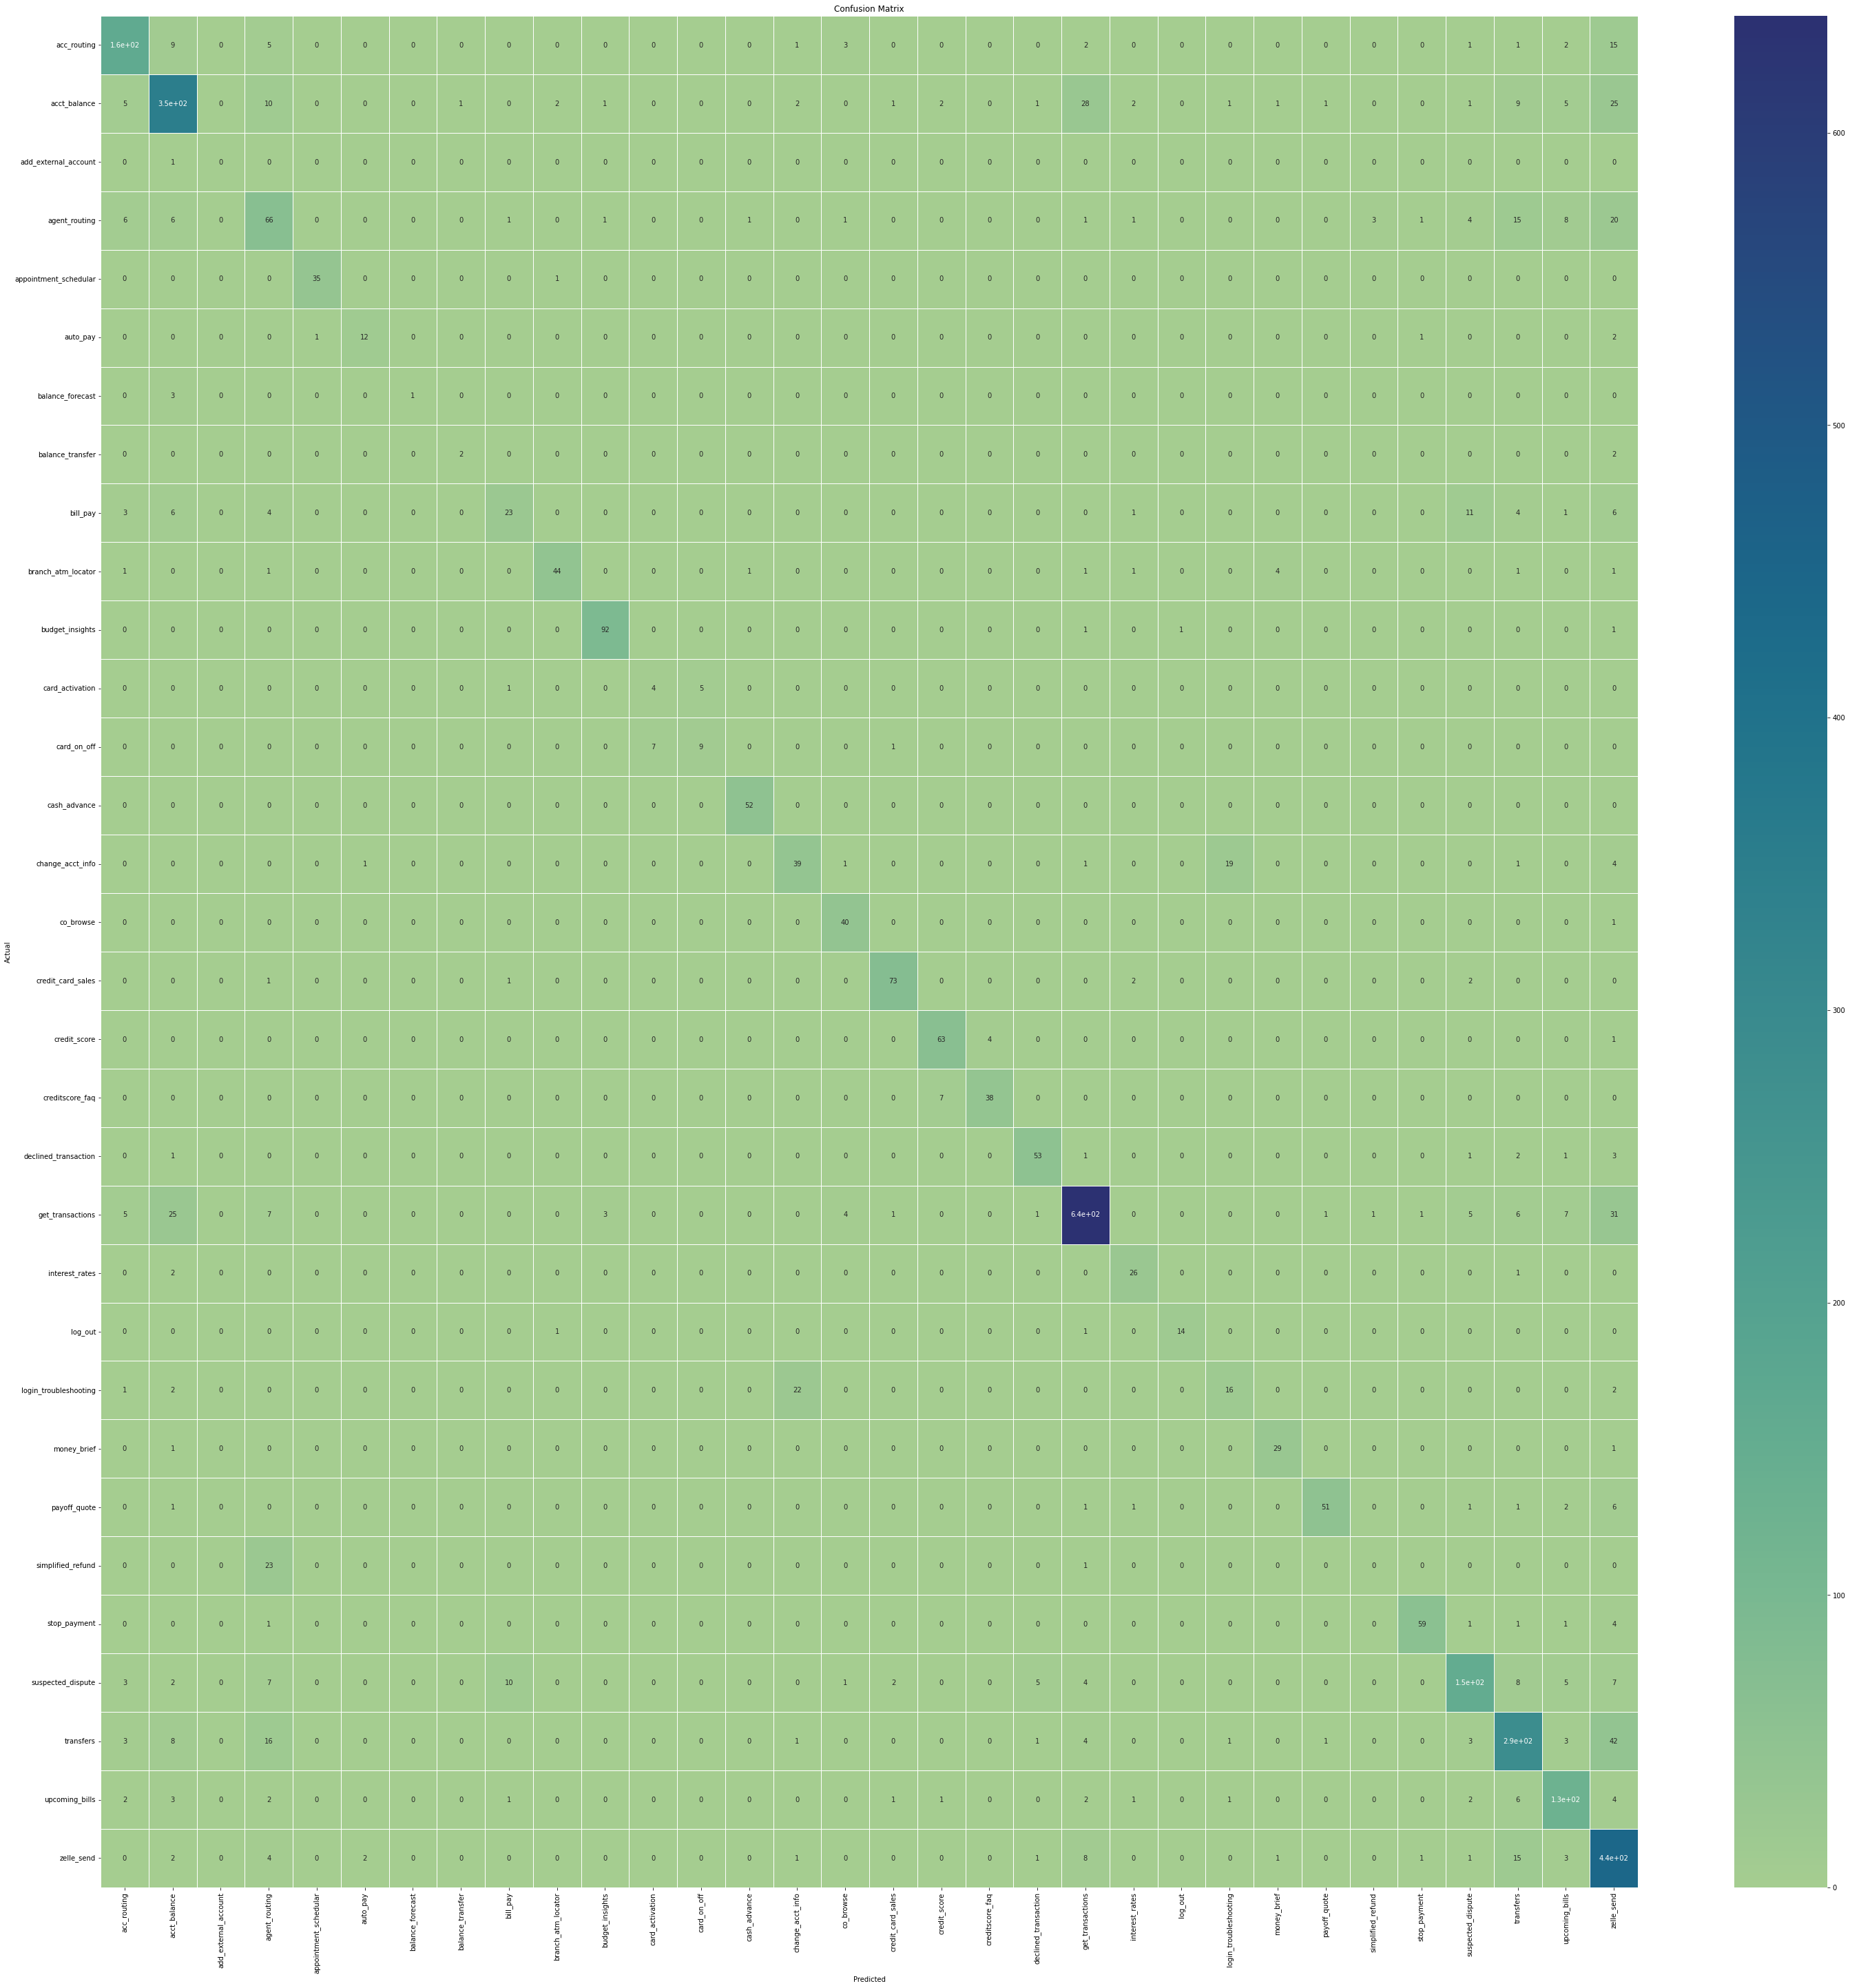

Total True Positives :  3008.0
Total False Positives :  715.0
Total True Negatives :  114698.0
Total False Negatives :  715.0


acc_routing  acct_balance  add_external_account  agent_routing  \
TP          163           352                     0             66   
TN         3492          3201                  3722           3507   
FP           29            72                     0             81   
FN           39            98                     1             69   

    appointment_schedular  auto_pay  balance_forecast  balance_transfer  \
TP                     35        12                 1                 2   
TN                   3686      3704              3719              3718   
FP                      1         3                 0                 1   
FN                      1         4                 3                 2   

    bill_pay  branch_atm_locator  budget_insights  card_activation  \
TP        23                  44               92                4   
TN      3650                3664             3623             3706   
FP        14                   4                5                7   
FN        36                  11                3                6   

    card_on_off  cash_advance  change_acct_info  co_browse  credit_card_sales  \
TP            9            52                39         40                 73   
TN         3701          3669              3630       3672               3638   
FP            5             2                27         10                  6   
FN            8             0                27          1                  6   

    credit_score  creditscore_faq  declined_transaction  get_transactions  \
TP            63               38                    53               640   
TN          3645             3674                  3652              2929   
FP            10                4                     9                56   
FN             5                7                     9                98   

    interest_rates  log_out  login_troubleshooting  money_brief  payoff_quote  \
TP              26       14                     16           29            51   
TN            3685     3706                   3658         3686          3656   
FP               9        1                     22            6             3   
FN               3        2                     27            2            13   

    simplified_refund  stop_payment  suspected_dispute  transfers  \
TP                  0            59                153        287   
TN               3695          3652               3483       3282   
FP                  4             4                 33         71   
FN                 24             8                 54         83   

    upcoming_bills  zelle_send  
TP             128         444  
TN            3531        3062  
FP              38         178  
FN              26          39

In [ ]:
# Using RandomForestClassifier and TF-IDF Vectorizer with OverSampling technique SMOTE

tfidfVectorizer = TfidfVectorizer()
X = tfidfVectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Define SMOTE 
smote = SMOTE(random_state=777, k_neighbors=1)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

randomForestClassifier3 = RandomForestClassifier()

#fit with oversampled features 
randomForestClassifier3.fit(X_train_SMOTE, y_train_SMOTE)

#get the predictions of X_test
y_pred = randomForestClassifier3.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "RFSMOT")

In [ ]:
res=preprocess_utterance("This week's balance forecast")
print(randomForestClassifier3.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['balance_transfer']
(This week,)


In [ ]:
res=preprocess_utterance("how long does a refund take to post to my account?")
print(randomForestClassifier3.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['acct_balance']
()


In [ ]:
res=preprocess_utterance("how do i cancel an activation")
print(randomForestClassifier3.predict(tfidfVectorizer.transform([res]).toarray()))
print(getEntities(res))

['suspected_dispute']
()


#### Using MultiNomialNB Classifier and SMOTE

In [ ]:
# Using CountVectorizer
countVectorizer = CountVectorizer(ngram_range=(1,2))
X = countVectorizer.fit_transform(utterances['lemmatized_utterance'])
X = np.array(X.todense())

y = utterances['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("Shape of X_train: ", X_train.shape)
#print("Shape of X_test: ", X_test.shape)

#Define SMOTE 
smote = SMOTE(random_state=777, k_neighbors=1)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Initalize MNB classifier and fit with features
MNB_model_SMOTE = MultinomialNB().fit(X_train_SMOTE, y_train_SMOTE)

# get the predictions for X_test using pipeline object
y_pred = MNB_model_SMOTE.predict(X_test)
#print(y_pred)

# get the model classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print (classification_report(y_test, y_pred))

# Plot heatmap of confusion matrix
plot_confusion_matrix(y_test, y_pred)

display_comprehensive_result(X_test, y_test, y_pred, "MNBSMOT")

### Building Neural Networks Using Word Embeddings

##### Model 1 - In this model, we will use Tokenizer to convert text to sequences, fit the tokenizer on a training data using most common words in vocabulary built using the same trainin data. Then, using SMOTE balance the imbalanced training set. We will then build a sequential model with Embedding Layer as the first layer with vocabulary size we obtained in previous steps, Outpur dim size as 100, and input length as 15 (this is the maximum length of utterance), Flatten layer and output Dense layer with 77 output space (since we have 77 different intent categories) and activation function as 'Softmax'. We will use 'rmsprop' optimizer with 'sparse_categorical_crossentropy' as loss function and metrics as 'accuracy' to evaluate the model.

In [ ]:
MAX_TEXT_LEN = 15
EMBEDDING_OUTPUT_DIM = 300

In [ ]:
# split the dataset into training and testing

X = utterances['lemmatized_utterance']
y = utterances['intent_labelEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
# Prepare tokenizer using Tokenizer

tokenizer_x = Tokenizer()
tokenizer_x.fit_on_texts(list(X))

#size of vocabulary ( +1 for padding token)
dataset_voc_size = len(tokenizer_x.word_index) + 1

dataset_voc_size

3758

In [ ]:
# Get the most common words in dataset and get the vocab size using Tokenizer

# threshold = 2

# cnt=0
# tot_cnt=0
# freq=0
# tot_freq=0

# for key,value in tokenizer_x.word_counts.items():
#     tot_cnt=tot_cnt+1
#     tot_freq=tot_freq+value
#     if(value<threshold):
#         cnt=cnt+1
#         freq=freq+value
    
# common_words = tot_cnt - cnt

# Redefine tokenzier with most common words in dataset
# tokenizer_x = Tokenizer(num_words=common_words)
# tokenizer_x.fit_on_texts(list(X_train))

# Convert text sequences into integer sequences
dataset_x_train_seq = tokenizer_x.texts_to_sequences(X_train)
dataset_x_test_seq = tokenizer_x.texts_to_sequences(X_test)

# Padding the sequences with zeros upto maximum length
dataset_x_train_seq_pad = pad_sequences(dataset_x_train_seq, MAX_TEXT_LEN, padding="post")
dataset_x_test_seq_pad = pad_sequences(dataset_x_test_seq, MAX_TEXT_LEN, padding="post") 

#Define SMOTE 
# smote = SMOTE(random_state=777, k_neighbors=1)
# X_train_SMOTE, y_train_SMOTE = smote.fit_resample(dataset_x_train_seq_pad, y_train)


In [ ]:
def printHistory_plot_graph(history):

  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
# Define a sequential model
model_1 = Sequential()
model_1.add(Embedding(dataset_voc_size, EMBEDDING_OUTPUT_DIM, input_length=MAX_TEXT_LEN))
model_1.add(Flatten())
model_1.add(Dense(77, activation="softmax"))

#compile the model
model_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
model_1.summary()

#fit the model with training data
history = model_1.fit(dataset_x_train_seq_pad, y_train, epochs=25)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 300)           1127400   
                                                                 
 flatten (Flatten)           (None, 4500)              0         
                                                                 
 dense (Dense)               (None, 77)                346577    
                                                                 
Total params: 1,473,977
Trainable params: 1,473,977
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
311/311 [==============================] - 12s 25ms/step - loss: 2.1526 - accuracy: 0.4578
Epoch 2/25
311/311 [==============================] - 2s 5ms/step - loss: 1.0239 - accuracy: 0.7288
Epoch 3/25
311/311 [==============================] - 1s 5ms/step - loss: 0.6872 - accuracy: 0.8101
Epoch 4/

dict_keys(['loss', 'accuracy'])


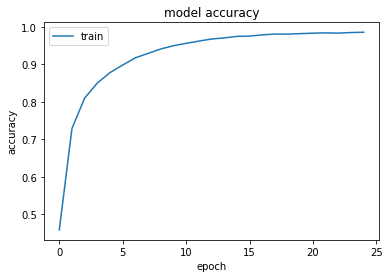

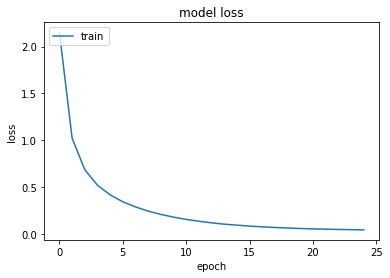

Accuracy: 82.514101


In [ ]:
print(history)
printHistory_plot_graph(history)

#evaluatte the model
loss, accuracy = model_1.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("account and routing for my college, grocery and toddler food accounts")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_1 = [np.argmax(pred) for pred in model_1.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_1 ])

account and route for my college grocery and to deer food accounts
3/3 [==============================] - 0s 3ms/step
[array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['acc_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['acc_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=

In [ ]:
corrected_utterance = preprocess_utterance("What's the routing number?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_1 = [np.argmax(pred) for pred in model_1.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_1 ])

What the routing number
1/1 [==============================] - 0s 19ms/step
[array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['acc_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['acc_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object)]


Model 2 - Using Embedding Layer, GlobalAveragePoolong1D, Dropout regularizer, 1 hidden Dense layer with 'relu' activation function, and output Dense layer with 'softmax' activation function.

In [ ]:
#defind drop_out_rate

drop_out_rate = 0.2

# Define a sequential model
model_2 = Sequential()
model_2.add(Embedding(dataset_voc_size, EMBEDDING_OUTPUT_DIM, input_length=MAX_TEXT_LEN))
model_2.add(GlobalAveragePooling1D())
model_2.add(Dropout(drop_out_rate))
model_2.add(Dense(512, activation='relu', kernel_initializer= he_normal(seed=40)))
model_2.add(Dense(77, activation="softmax", kernel_initializer= he_normal(seed=20)))

#compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
model_2.summary()

#fit the model with training data
history = model_2.fit(dataset_x_train_seq_pad, y_train, epochs=25)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 300)           1127400   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               154112    
                                                                 
 dense_2 (Dense)             (None, 77)                39501     
                                                                 
Total params: 1,321,013
Trainable params: 1,321,013
Non-trainable params: 0
____________________________________________

dict_keys(['loss', 'accuracy'])


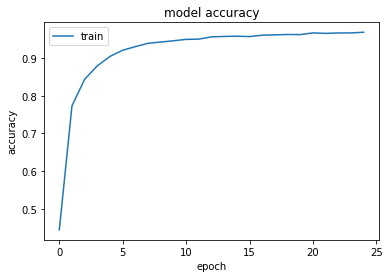

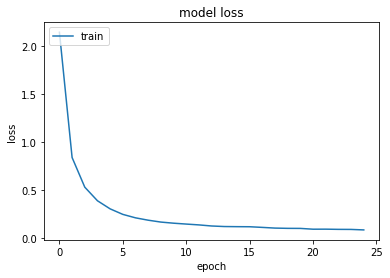

Accuracy: 80.781627


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_2.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("How much do I have in my portfolio account ?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_2 = [np.argmax(pred) for pred in model_2.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_2 ])

How much do have in my portfolio account
2/2 [==============================] - 0s 5ms/step
[array(['agent_routing'], dtype=object), array(['co_browse'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['transfers'], dtype=object), array(['co_browse'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['

In [ ]:
corrected_utterance = preprocess_utterance("What's the routing number?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_2 = [np.argmax(pred) for pred in model_2.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_2 ])

What the routing number
1/1 [==============================] - 0s 19ms/step
[array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['payoff_quote'], dtype=object), array(['agent_routing'], dtype=object), array(['payoff_quote'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['co_browse'], dtype=object), array(['agent_routing'], dtype=object), array(['payoff_quote'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['get_transactions'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object)]


#### Using Pre-trained embeddings Glove, Word2Vec, FastText

In [ ]:
# Load entire GloVe word embedding file into the memory as a dictionary of word to embedding array

embeddings_dict = dict()

def getEmbeddings(pretrained_model_url):
  f = open(pretrained_model_url, encoding="utf-8")
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dict[word] = coefs
  f.close()
  print('Loaded %s word vectors.' % len(embeddings_dict))
  return embeddings_dict

In [ ]:
# create a weight matrix for words in the training dataset

def getWeightMatrix(embeddings, vocab_size, dimen):
  embedding_matrix = np.zeros((vocab_size,dimen))
  for word, i in tokenizer_x.word_index.items():
    if word in embeddings:
      embedding_vector = embeddings[word]
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
  return embedding_matrix

In [ ]:
# Now, let's define the sequential model with pre-trained weights from embedding matrix.
def getSequentialModelWithoutHidden(embedding_layer):
  model = Sequential()
  #Since we chose 300d version of GloVe, we must defind output dimension as 300
  model.add(embedding_layer)
  model.add(Flatten())
  model.add(Dense(77, activation="softmax"))
  return model

In [ ]:
# Define a sequential model
def getSequentialModelWithHidden(embedding_layer, drop_out_rate):
  model = Sequential()
  model.add(embedding_layer)
  model.add(GlobalAveragePooling1D())
  model.add(Dropout(drop_out_rate))
  model.add(Dense(512, activation='relu', kernel_initializer= he_normal(seed=40)))
  model.add(Dense(77, activation="softmax", kernel_initializer= he_normal(seed=20)))
  return model

##### Model Building neural network using pre-trained Embedding model GloVe. It's trained on global word-word co-occurrence matrix,  which tabulates how frequently words co-occur with one another in a given corpus. Using Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab uncased, 300d vectors)

In [ ]:
# Embeddings for Glove 300 dimension
embeddings = getEmbeddings("/content/drive/MyDrive/Dissertation/Topic_Analysis/glove.6B/glove.6B.300d.txt")
embedding_matrix = getWeightMatrix(embeddings, dataset_voc_size, 300)

Loaded 400000 word vectors.


Model 3 - Using GloVe Embedding Layer, no hidden layers and output Dense layer with 'softmax' activation function.

In [ ]:
embedding_layer = Embedding(dataset_voc_size, 300, weights=[embedding_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_3 = getSequentialModelWithoutHidden(embedding_layer)
#compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_3.summary()
#fit the model with training data
history = model_3.fit(dataset_x_train_seq_pad, y_train, epochs=25)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 300)           1127400   
                                                                 
 flatten_2 (Flatten)         (None, 4500)              0         
                                                                 
 dense_4 (Dense)             (None, 77)                346577    
                                                                 
Total params: 1,473,977
Trainable params: 346,577
Non-trainable params: 1,127,400
_________________________________________________________________
Epoch 1/25
311/311 [==============================] - 2s 3ms/step - loss: 1.7428 - accuracy: 0.5595
Epoch 2/25
311/311 [==============================] - 1s 3ms/step - loss: 0.9011 - accuracy: 0.7664
Epoch 3/25
311/311 [==============================] - 1s 3ms/step - loss: 0.6787 - accuracy: 0.8261
Ep

dict_keys(['loss', 'accuracy'])


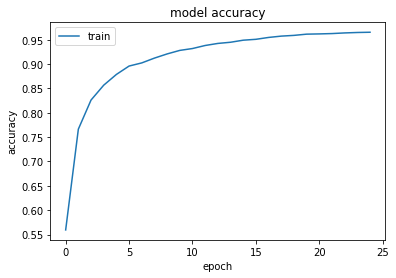

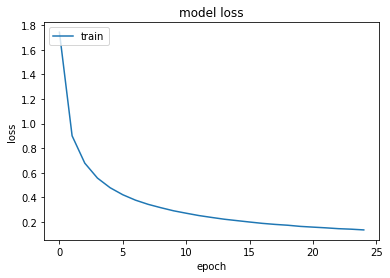

Accuracy: 76.510876


In [ ]:
printHistory_plot_graph(history)

#evaluatte the model
loss, accuracy = model_3.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("How do I locate my card?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_3.predict([data_seq_input])]
preds
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

How do locate my card
1/1 [==============================] - 0s 45ms/step
[array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['declined_transaction'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['declined_transaction'], dtype=object), array(['declined_transaction'], dtype=object)]


In [ ]:
corrected_utterance = preprocess_utterance("What's the routing number?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_2 = [np.argmax(pred) for pred in model_3.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_2 ])

What the routing number
1/1 [==============================] - 0s 19ms/step
[array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['declined_transaction'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['acc_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['upcoming_bills'], dtype=object), array(['zelle_send'], dtype=object), array(['declined_transaction'], dtype=object)]


Model 4 - Using GloVe Embedding Layer, GlobalAveragePoolong1D, Dropout rate, 1 hidden Dense layer with 'relu' activation function, and output Dense layer with 'softmax' activation function.

In [ ]:
#compile the model with drop_out_rate
embedding_layer = Embedding(dataset_voc_size, 300, weights=[embedding_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_4 = getSequentialModelWithHidden(embedding_layer, 0.2)
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_4.summary()
#fit the model with training data
history = model_4.fit(dataset_x_train_seq_pad, y_train, epochs=50)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 300)           1127400   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               154112    
                                                                 
 dense_6 (Dense)             (None, 77)                39501     
                                                                 
Total params: 1,321,013
Trainable params: 193,613
Non-trainable params: 1,127,400
______________________________________

dict_keys(['loss', 'accuracy'])


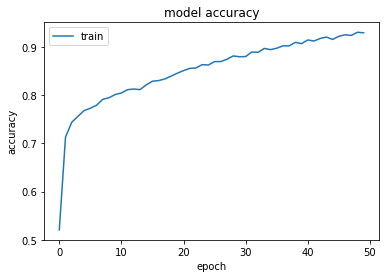

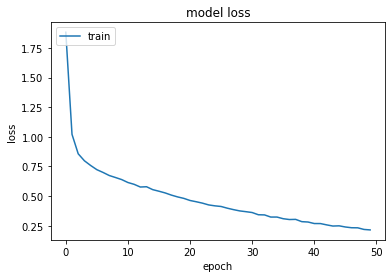

Accuracy: 82.151490


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_4.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("I am still waiting on my card")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_4 = [np.argmax(pred) for pred in model_4.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_4 ])

am still wait on my card
1/1 [==============================] - 0s 22ms/step
[array(['agent_routing'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['payoff_quote'], dtype=object), array(['payoff_quote'], dtype=object), array(['acct_balance'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['agent_routing'], dtype=object), array(['acct_balance'], dtype=object), array(['payoff_quote'], dtype=object), array(['co_browse'], dtype=object), array(['zelle_send'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['agent_routing'], dtype=object), array(['co_browse'], dtype=object), array(['zelle_send'], dtype=object)]


##### Using Deep CNN (Convolutional Neural Network) + Embedding Layer

In [ ]:
def getSequentialCNNModelWithEmbedding(embedding_layer):
  model = Sequential()
  model.add(embedding_layer)
  model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(77, activation='softmax'))
  print(model.summary())
  return model

##### Using Deep CNN and Glove Embedding

In [ ]:
#compile the CNN model with drop_out_rate
embedding_layer = Embedding(dataset_voc_size, 300, weights=[embedding_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_cnn = getSequentialCNNModelWithEmbedding(embedding_layer)
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_cnn.summary()
#fit the model with training data
history = model_cnn.fit(dataset_x_train_seq_pad, y_train, epochs=50)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 15, 300)           1127400   
                                                                 
 conv1d (Conv1D)             (None, 11, 128)           192128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 640)               0         
                                                                 
 dense_7 (Dense)             (None, 77)                49357     
                                                                 
Total params: 1,368,885
Trainable params: 241,485
Non-trainable params: 1,127,400
______________________________________

dict_keys(['loss', 'accuracy'])


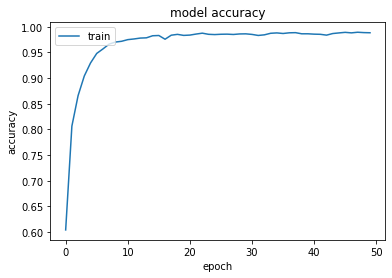

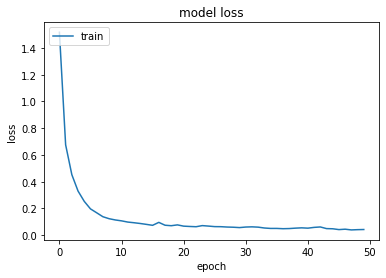

Accuracy: 79.935539


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_cnn.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("top-up my cheque")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_cnn.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

top up my cheque
1/1 [==============================] - 0s 28ms/step
[array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['request_refund'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['unable_to_verify_identity'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['verify_my_identity'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['request_refund'], dtype=object), array(['verify_my_identity'], dtype=object)]


In [ ]:
corrected_utterance = preprocess_utterance("What's the routing number?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_2 = [np.argmax(pred) for pred in model_cnn.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_2 ])

What the routing number
1/1 [==============================] - 0s 84ms/step
[array(['co_browse'], dtype=object), array(['transfers'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['co_browse'], dtype=object), array(['agent_routing'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['co_browse'], dtype=object), array(['transfers'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['agent_routing'], dtype=object), array(['transfers'], dtype=object), array(['co_browse'], dtype=object), array(['acc_routing'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['agent_routing'], dtype=object), array(['co_browse'], dtype=object), array(['payoff_quote'], dtype=object), array(['zelle_send'], dtype=object), array(['transfers'], dtype=object)]


##### Using Deep Learning model + LSTM Layer

In [ ]:
# Define a sequential model
def getSequentialModelWithLSTM(embedding_layer, drop_out_rate):
  model = Sequential()
  model.add(embedding_layer)
  model.add(Dropout(drop_out_rate))
  model.add(LSTM(64, dropout=drop_out_rate, recurrent_dropout=0.5))
  model.add(Dense(512, activation='relu', kernel_initializer= he_normal(seed=40)))
  model.add(Dense(77, activation="softmax", kernel_initializer= he_normal(seed=20)))
  return model

##### Using Sequential model with LSTM and Glove Embedding

In [ ]:
embedding_layer = Embedding(dataset_voc_size, 300, weights=[embedding_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_3 = getSequentialModelWithLSTM(embedding_layer, 0.2)
#compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_3.summary()
#fit the model with training data
history = model_3.fit(dataset_x_train_seq_pad, y_train, epochs=20)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 15, 300)           1127400   
                                                                 
 dropout_2 (Dropout)         (None, 15, 300)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 dense_8 (Dense)             (None, 512)               33280     
                                                                 
 dense_9 (Dense)             (None, 77)                39501     
                                                                 
Total params: 1,293,621
Trainable params: 166,221
Non-trainable params: 1,127,400
_________________________________________________________________
Epoch 1/20
311/311 [==================

dict_keys(['loss', 'accuracy'])


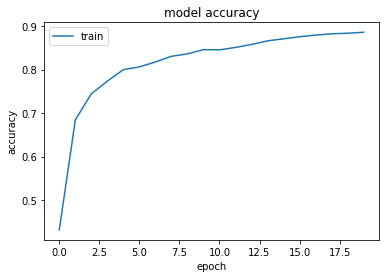

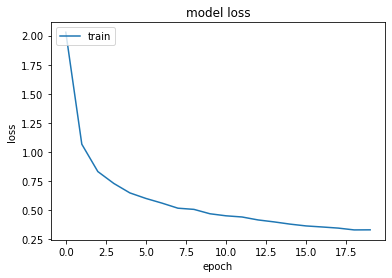

Accuracy: 83.722806


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_3.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("I need a new pin.")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_3.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

need new pin
1/1 [==============================] - 0s 54ms/step
[array(['passcode_forgotten'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['automatic_top_up'], dtype=object), array(['contactless_not_working'], dtype=object), array(['passcode_forgotten'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['contactless_not_working'], dtype=object), array(['contactless_not_working'], dtype=object), array(['contactless_not_working'], dtype=object), array(['transaction_charged_twice'], dtype=object), array(['passcode_forgotten'], dtype=object)]


In [ ]:
corrected_utterance = preprocess_utterance("What's the routing number?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds_model_2 = [np.argmax(pred) for pred in model_3.predict([data_seq_input])]
print([labelEncoding.inverse_transform([pred]) for pred in preds_model_2 ])

What the routing number


1/1 [==============================] - 0s 228ms/step
[array(['co_browse'], dtype=object), array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['co_browse'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['transfers'], dtype=object), array(['co_browse'], dtype=object), array(['co_browse'], dtype=object), array(['agent_routing'], dtype=object), array(['co_browse'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['co_browse'], dtype=object)]


#### Using Word2Vec Pre-trained Embedding Layer with GoogleNews-vectors-negative300 pre-trained model

In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import KeyedVectors

def getGensimWord2VecModel():
  filename = '/content/drive/MyDrive/Dissertation/Topic_Analysis/GoogleNews-vectors-negative300.bin'
  word2vec_model = KeyedVectors.load_word2vec_format(filename, binary=True)
  return word2vec_model

In [ ]:
weight_matrix = getWeightMatrix(getGensimWord2VecModel(), dataset_voc_size, 300)

In [ ]:
#compile the model with drop_out_rate
embedding_layer = Embedding(dataset_voc_size, 300, weights=[weight_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_6 = getSequentialModelWithHidden(embedding_layer, 0.2)
model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_6.summary()
#fit the model with training data
history = model_6.fit(dataset_x_train_seq_pad, y_train, epochs=50)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 15, 300)           1127400   
                                                                 
 global_average_pooling1d_2   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               154112    
                                                                 
 dense_11 (Dense)            (None, 77)                39501     
                                                                 
Total params: 1,321,013
Trainable params: 193,613
Non-trainable params: 1,127,400
______________________________________

dict_keys(['loss', 'accuracy'])


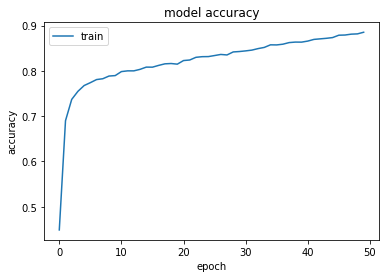

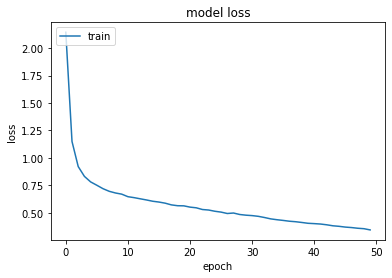

Accuracy: 82.715553


In [ ]:
printHistory_plot_graph(history)
#evaluate the model
loss, accuracy = model_6.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("i would like to change my pin.")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_6.predict([data_seq_input])]
print(preds)
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

would like to change my pin
1/1 [==============================] - 0s 25ms/step
[25, 25, 58, 25, 25, 25, 25, 25, 25, 13, 25, 25, 25, 25, 25, 25, 25, 70, 25, 13, 25, 2, 25, 25, 25, 25, 70]
[array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['top_up_by_cash_or_cheque'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['card_delivery_estimate'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['country_support'], dtype=object), array(['verify_source_of_funds'], dtype=object), array(['country_support'], dtype

In [ ]:
corrected_utterance = preprocess_utterance("What's the routing number?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_6.predict([data_seq_input])]
print(preds)
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

What the routing number
1/1 [==============================] - 0s 25ms/step
[31, 29, 31, 31, 31, 31, 29, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 25, 31, 31]
[array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['payoff_quote'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_se

In [ ]:
#compile the cnn model
embedding_layer = Embedding(dataset_voc_size, 300, weights=[weight_matrix], input_length=MAX_TEXT_LEN, trainable=False)
model_cnn = getSequentialCNNModelWithEmbedding(embedding_layer)
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model_cnn.summary()
#fit the model with training data
history = model_cnn.fit(dataset_x_train_seq_pad, y_train, epochs=50)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 15, 300)           1127400   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 128)           192128    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 640)               0         
                                                                 
 dense_12 (Dense)            (None, 77)                49357     
                                                                 
Total params: 1,368,885
Trainable params: 241,485
Non-trainable params: 1,127,400
______________________________________

dict_keys(['loss', 'accuracy'])


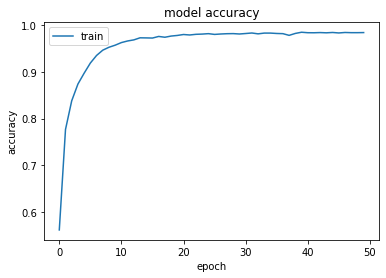

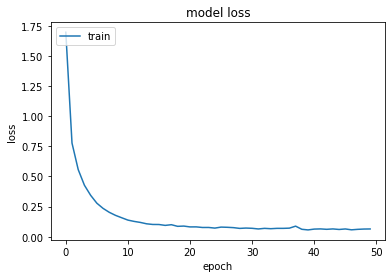

Accuracy: 81.345689


In [ ]:
printHistory_plot_graph(history)
#evaluatte the model
loss, accuracy = model_cnn.evaluate(dataset_x_test_seq_pad, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

In [ ]:
corrected_utterance = preprocess_utterance("i would like to change my pin.")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_cnn.predict([data_seq_input])]
print(preds)
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

would like to change my pin
1/1 [==============================] - 1s 588ms/step
[75, 75, 37, 75, 73, 75, 75, 3, 75, 24, 75, 75, 75, 75, 75, 75, 75, 3, 75, 24, 75, 25, 75, 75, 75, 3, 3]
[array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['fiat_currency_support'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['visa_or_mastercard'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['apple_pay_or_google_pay'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['contactless_not_working'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), array(['wrong_amount_of_cash_received'], dtype=object), arra

In [ ]:
corrected_utterance = preprocess_utterance("What's the routing number?")
print(corrected_utterance)
data_seq_input = pad_sequences(tokenizer_x.texts_to_sequences(corrected_utterance), MAX_TEXT_LEN, padding="post")
preds = [np.argmax(pred) for pred in model_cnn.predict([data_seq_input])]
print(preds)
print([labelEncoding.inverse_transform([pred]) for pred in preds ])

What the routing number
1/1 [==============================] - 0s 71ms/step
[31, 29, 31, 29, 31, 29, 29, 3, 31, 3, 31, 31, 29, 3, 31, 3, 31, 31, 31, 31, 29, 3, 3]
[array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['transfers'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['agent_routing'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['zelle_send'], dtype=object), array(['transfers'], dtype=object), array(['agent_routing'], dtype=object), array(['agent

#### Using FastText Embedding Model

In [ ]:
!pip install fastText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4395836 sha256=60194c2ab69123480fb41b654a36df9a2e2ea58753c1fc50d9d71a2c03e16d4b
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fastText


In [ ]:
import fasttext

In [ ]:
train_file = "/content/drive/MyDrive/Dissertation/Topic_Analysis/train_file_fastText.csv"
test_file = "/content/drive/MyDrive/Dissertation/Topic_Analysis/test_file_fastText.csv"
fastText_vector = "/content/drive/MyDrive/Dissertation/Topic_Analysis/crawl-300d-2M.vec"

In [ ]:
# #add __label__ in front of the labels for fastText to read
utterances['intent_labeled_fasttext'] = '__label__' + utterances['intent_labelEncoded'].astype(str)
utterances['intent_labeled_fasttext'].head()

0    __label__30
1    __label__20
2    __label__20
3    __label__31
4     __label__1
Name: intent_labeled_fasttext, dtype: object

In [ ]:
#put intent label and utterance together
utterance_label= utterances['intent_labeled_fasttext'] + " " + utterances['lemmatized_utterance']
utterance_label.head()

0    __label__30 How can check my overdue bill for ...
1    __label__20 can see banking transactions above...
2    __label__20 What is my list for the fees make ...
3                __label__31 send money to dave verner
4      __label__1 show me transaction through December
dtype: object

In [ ]:
#split into train and test
train, test = train_test_split(utterance_label, test_size=0.3, train_size=0.7, random_state=42)

In [ ]:
#write test and train into files
f_train = open(train_file, "w")
for i in range(len(np.array(train))):
    f_train.write(np.array(train)[i] + "\n")
f_train.close()

f_test = open(test_file, "w")
for i in range(len(np.array(test))):
    f_test.write(np.array(test)[i] + "\n")
f_test.close()

In [ ]:
#train model using supervised function
def getFastTextModel():
  model_fastText = fasttext.train_supervised(input=train_file, dim=300,
                             pretrainedVectors=fastText_vector)
  return model_fastText

In [ ]:
model_fastText = getFastTextModel()

In [ ]:
#test using the model
model_fastText.test(test_file) #(n, precision, recall)

(3723, 0.8176201987644373, 0.8176201987644373)

In [ ]:
# save the model to file.
fastText_finetuned_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/fastText_finetuned"
model_fastText.save_model(fastText_finetuned_path)

In [ ]:
corrected_utterance = preprocess_utterance("I need a new pin.")
print(corrected_utterance)
result = model_fastText.predict(corrected_utterance)
result = result[0][0]
result = result.split('__')[2]
print(labelEncoding.inverse_transform([int(result)]))
print(getEntities(corrected_utterance))

need new pin
['change_acct_info']


In [ ]:
corrected_utterance = preprocess_utterance("What's the routing number?")
print(corrected_utterance)
result = model_fastText.predict(corrected_utterance)
result = result[0][0]
result = result.split('__')[2]
print(labelEncoding.inverse_transform([int(result)]))
print(getEntities(corrected_utterance))

What the routing number
['acc_routing']


In [ ]:
corrected_utterance = preprocess_utterance("this is not a this is not a checking account it's my loan payment that i want to talk about")
print(corrected_utterance)
result = model_fastText.predict(corrected_utterance)
result = result[0][0]
result = result.split('__')[2]
print(labelEncoding.inverse_transform([int(result)]))
print(getEntities(corrected_utterance))

this is not this is not check account it is my loan payment that want to talk about
['agent_routing']


In [ ]:
corrected_utterance = preprocess_utterance("how much money can i transfer for my credit card into my checking")
print(corrected_utterance)
result = model_fastText.predict(corrected_utterance)
result = result[0][0]
result = result.split('__')[2]
print(labelEncoding.inverse_transform([int(result)]))
print(getEntities(corrected_utterance))

how much money can transfer for my credit card into my checking
['acct_balance']


### Using Bidirectional Encoder Representations from Transformer (BERT)Pre-trained Transformer

##### Using pre-trained Bert model (bert_en_uncased_L-4_H-512_A-8) to get the embeddings

In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 KB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 109.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
  

In [ ]:
pip install -q tf-models-official==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 41.5 MB/s eta 0:00:0

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

In [ ]:
num_classes = len(utterances['intent_labelEncoded'].value_counts())

In [ ]:
# BERT pre-processor layer
BERT_processor_model = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
preprocessing_layer = hub.KerasLayer(BERT_processor_model, name='preprocessing')

# BERT encoder layer
BERT_encoder_model = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
BERT_encoder = hub.KerasLayer(BERT_encoder_model, trainable=False, name='BERT_encoder')


# text_test = ['this is such an amazing movie!']
# text_preprocessed = preprocessing_layer(text_test)

# print(f'Keys       : {list(text_preprocessed.keys())}')
# print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
# print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
# print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
# print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

def build_BERT_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoder_inputs = preprocessing_layer(text_input)
  outputs = BERT_encoder(encoder_inputs)
  net = outputs['pooled_output']
  drop1=Dropout(0.2, name="dropout")(net)
  relu_layer=tf.keras.layers.Dense(768,activation='relu', name="relu")(drop1)
  drop2=Dropout(0.3, name="dropout2")(relu_layer)
  sigmoid_layer=tf.keras.layers.Dense(512,activation='sigmoid', name="sigmoid")(drop2)
  output = tf.keras.layers.Dense(num_classes,activation='softmax', name="output")(drop1)
  return tf.keras.Model(text_input, output)


In [ ]:
model_BERT = build_BERT_classifier_model()

In [ ]:
X = utterances['lemmatized_utterance']
y = tf.keras.utils.to_categorical(utterances['intent_labelEncoded'].values, num_classes=num_classes)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9928,)
(9928, 32)
(2482,)
(2482, 32)


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.metrics.CategoricalAccuracy(name="accuracy")
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_BERT.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
model_BERT.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [ ]:
model_fit = model_BERT.fit(X_train, 
                      y_train, 
                      epochs = 50,
                      validation_data = (X_test, y_test),
                      callbacks = [earlystop_callback],
                      batch_size=32)

Epoch 1/50
311/311 [==============================] - 38s 111ms/step - loss: 2.2489 - accuracy: 0.3656 - val_loss: 1.7046 - val_accuracy: 0.5363
Epoch 2/50
311/311 [==============================] - 34s 109ms/step - loss: 1.5825 - accuracy: 0.5539 - val_loss: 1.4148 - val_accuracy: 0.6064
Epoch 3/50
311/311 [==============================] - 34s 108ms/step - loss: 1.3553 - accuracy: 0.6188 - val_loss: 1.2590 - val_accuracy: 0.6543
Epoch 4/50
311/311 [==============================] - 34s 108ms/step - loss: 1.2387 - accuracy: 0.6457 - val_loss: 1.1902 - val_accuracy: 0.6640
Epoch 5/50
311/311 [==============================] - 34s 108ms/step - loss: 1.1654 - accuracy: 0.6679 - val_loss: 1.1516 - val_accuracy: 0.6801
Epoch 6/50
311/311 [==============================] - 34s 108ms/step - loss: 1.1165 - accuracy: 0.6725 - val_loss: 1.1072 - val_accuracy: 0.6841
Epoch 7/50
311/311 [==============================] - 34s 108ms/step - loss: 1.0782 - accuracy: 0.6839 - val_loss: 1.0725 - val_ac

In [ ]:
#evaluatte the model
loss, accuracy = model_BERT.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

Accuracy: 72.723609


In [ ]:
# save the model to file.
BERT_banking77_finetuned_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned"
model_BERT.save(BERT_banking77_finetuned_path)


In [ ]:
# retrieve the saved model
from tensorflow import keras

test_model =  keras.models.load_model(BERT_banking77_finetuned_path)

In [ ]:
# predictions using saved model
pred = [np.argmax(pred) for pred in model_BERT.predict(["How do I locate my card?"])]
pred
labelEncoding.inverse_transform([pred])

1/1 [==============================] - 1s 683ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['suspected_dispute'], dtype=object)

In [ ]:
corrected_utterance = preprocess_utterance("hello i am getting an error message when i try to use my pen with my cash card")
pred = [np.argmax(pred) for pred in model_BERT.predict([corrected_utterance])]
pred
print(labelEncoding.inverse_transform([pred]))
print(getEntities(corrected_utterance))

1/1 [==============================] - 0s 41ms/step
['bill_pay']
()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
corrected_utterance = preprocess_utterance("i have # transfers to this account in my doordash application, they cannot reach it, because this account is blocked, you can figure it out")
pred = [np.argmax(pred) for pred in model_BERT.predict([corrected_utterance])]
pred
print(labelEncoding.inverse_transform([pred]))
print(getEntities(corrected_utterance))

1/1 [==============================] - 0s 61ms/step
['suspected_dispute']
()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
corrected_utterance = preprocess_utterance("Checking 1234 to Savings 4567")
pred = [np.argmax(pred) for pred in model_BERT.predict([corrected_utterance])]
pred
print(labelEncoding.inverse_transform([pred]))
print(getEntities(corrected_utterance))

1/1 [==============================] - 0s 42ms/step
['transfers']
(1234, 4567)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
corrected_utterance = preprocess_utterance("Cancel stop payments")
pred = [np.argmax(pred) for pred in model_BERT.predict([corrected_utterance])]
pred
print(labelEncoding.inverse_transform([pred]))
print(getEntities(corrected_utterance))

1/1 [==============================] - 0s 41ms/step
['stop_payment']
()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Download the model
from google.colab import files
!zip -r /content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned.zip /content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned
files.download("/content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned.zip")

updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/ (stored 0%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/assets/ (stored 0%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/assets/vocab.txt (deflated 53%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/fingerprint.pb (stored 0%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/keras_metadata.pb (deflated 83%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/variables/ (stored 0%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/variables/variables.index (deflated 74%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_finetuned/variables/variables.data-00000-of-00001 (deflated 7%)
updating: content/drive/MyDrive/Dissertation/Topic_Analysis/BERT_banking77_fi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Using pre-trained distilroberta-base fine-tuned model for intent classification

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
model_id = 'philschmid/DistilBERT-Banking77'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model_DistilBERT= AutoModelForSequenceClassification.from_pretrained(model_id)
classifier = pipeline('text-classification', tokenizer=tokenizer, model=model)
classifier('What is the base of the exchange rates?')

[{'label': 'exchange_rate', 'score': 0.9791280627250671}]

In [ ]:
# predictions using huggingface model
classifier("How do I locate my card?")

[{'label': 'card_arrival', 'score': 0.6912513375282288}]

### MultiLingual Intent Classification Model for Spanish and Engish Languages

##### Using pre-trained Bert model LaBSE - Language-agnostic BERT sentence embedding model supporting 109 languages to get the embeddings

In [ ]:
# BERT pre-processor layer
LaBSE_processor_model = "https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2"
preprocessing_layer = hub.KerasLayer(LaBSE_processor_model, name='preprocessing')

# BERT encoder layer
LaBSE_encoder_model = "https://tfhub.dev/google/LaBSE/2"
BERT_encoder = hub.KerasLayer(LaBSE_encoder_model, trainable=False, name='BERT_encoder')


# text_test = ['this is such an amazing movie!']
# text_preprocessed = preprocessing_layer(text_test)

# print(f'Keys       : {list(text_preprocessed.keys())}')
# print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
# print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
# print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
# print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

def build_LaBSE_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoder_inputs = preprocessing_layer(text_input)
  outputs = BERT_encoder(encoder_inputs)
  net = outputs['pooled_output']
  drop1=Dropout(0.3, name="dropout1")(net)
  relu_layer=tf.keras.layers.Dense(768,activation='relu', name="relu")(drop1)
  drop2=Dropout(0.3, name="dropout2")(relu_layer)
  sigmoid_layer=tf.keras.layers.Dense(512,activation='sigmoid', name="sigmoid")(drop2)
  output = tf.keras.layers.Dense(num_classes,activation='softmax', name="output")(sigmoid_layer)
  return tf.keras.Model(text_input, output)

In [ ]:
model_LaBSE = build_LaBSE_classifier_model()

In [ ]:
X = utterances['lemmatized_utterance']
y = tf.keras.utils.to_categorical(utterances['intent_labelEncoded'].values, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9928,)
(9928, 32)
(2482,)
(2482, 32)


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.metrics.CategoricalAccuracy(name="accuracy")
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_LaBSE.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
model_fit = model_LaBSE.fit(X_train, 
                      y_train, 
                      epochs = 20,
                      validation_data = (X_test, y_test),
                      callbacks = [earlystop_callback],
                      batch_size=32)

Epoch 1/20
311/311 [==============================] - 138s 413ms/step - loss: 1.1456 - accuracy: 0.6795 - val_loss: 0.6471 - val_accuracy: 0.8026
Epoch 2/20
311/311 [==============================] - 124s 398ms/step - loss: 0.6445 - accuracy: 0.8017 - val_loss: 0.5369 - val_accuracy: 0.8316
Epoch 3/20
311/311 [==============================] - 133s 428ms/step - loss: 0.5148 - accuracy: 0.8293 - val_loss: 0.5101 - val_accuracy: 0.8292
Epoch 4/20
311/311 [==============================] - 129s 414ms/step - loss: 0.4359 - accuracy: 0.8536 - val_loss: 0.4695 - val_accuracy: 0.8461
Epoch 5/20
311/311 [==============================] - 131s 420ms/step - loss: 0.3761 - accuracy: 0.8693 - val_loss: 0.4605 - val_accuracy: 0.8501
Epoch 6/20
311/311 [==============================] - 121s 388ms/step - loss: 0.3337 - accuracy: 0.8822 - val_loss: 0.4662 - val_accuracy: 0.8497
Epoch 7/20
311/311 [==============================] - 120s 386ms/step - loss: 0.2945 - accuracy: 0.8966 - val_loss: 0.4608 -

In [ ]:
#evaluatte the model
loss, accuracy = model_LaBSE.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %f" % (accuracy * 100))

Accuracy: 85.012084


In [ ]:
# save the model to file.
LaBSE_banking77_finetuned_path = "/content/drive/MyDrive/Dissertation/Topic_Analysis/LaBSE_banking77_finetuned"
model_LaBSE.save(LaBSE_banking77_finetuned_path)

In [ ]:
# retrieve the saved model
from tensorflow import keras

test_model =  keras.models.load_model(LaBSE_banking77_finetuned_path)

In [ ]:
# predictions using saved model on English utterance
corrected_utterance = preprocess_utterance("How do I locate my card?")
pred = [np.argmax(pred) for pred in model_LaBSE.predict([corrected_utterance])]
pred
print(labelEncoding.inverse_transform([pred]))
print(getEntities(corrected_utterance))

1/1 [==============================] - 0s 45ms/step
['suspected_dispute']
()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# predictions using saved model on Spanish utterance
pred_es = [np.argmax(pred_es) for pred_es in model_LaBSE.predict(["¿Cómo localizo mi tarjeta?"])]
pred_es
labelEncoding.inverse_transform([pred_es])

1/1 [==============================] - 0s 43ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['suspected_dispute'], dtype=object)

In [ ]:
# predictions using saved model on English utterance
corrected_utterance = preprocess_utterance("I need a new pin.")
pred = [np.argmax(pred) for pred in model_LaBSE.predict([corrected_utterance])]
pred
print(labelEncoding.inverse_transform([pred]))
print(getEntities(corrected_utterance))

1/1 [==============================] - 0s 49ms/step
['change_acct_info']
()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
corrected_utterance = preprocess_utterance("how much is the minimum payment on my credit card to this month")
pred = [np.argmax(pred) for pred in model_LaBSE.predict([corrected_utterance])]
pred
print(labelEncoding.inverse_transform([pred]))
print(getEntities(corrected_utterance))

1/1 [==============================] - 0s 43ms/step
['acct_balance']
(this month,)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred_es = [np.argmax(pred_es) for pred_es in model_LaBSE.predict(["cual es mi credit score?"])]
pred_es
print(labelEncoding.inverse_transform([pred_es]))
print(getEntities("cual es mi credit score?"))

1/1 [==============================] - 0s 66ms/step
['credit_score']
()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred_es = [np.argmax(pred_es) for pred_es in model_LaBSE.predict(["â¿cuã¡l es el nãºmero de cuenta y de ruta bancaria de checking #?"])]
pred_es
print(labelEncoding.inverse_transform([pred_es]))
print(getEntities("â¿cuã¡l es el nãºmero de cuenta y de ruta bancaria de checking #?"))

1/1 [==============================] - 0s 79ms/step
['acc_routing']
(AC, bancaria de checking)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Take User Input to detect intent

In [ ]:
def predict_using_BERT(utterance):
  corrected_utterance = preprocess_utterance(utterance)
  pred = [np.argmax(pred) for pred in model_BERT.predict([corrected_utterance])]
  print(pred)
  print(labelEncoding.inverse_transform([pred]))
  print(getEntities(corrected_utterance))

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=d70d3363e8a15b00e1597d7428d4d26740802be58cf52cf8a9e2ee40537e45d5
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
from langdetect import detect

def predict_using_LaBSE(utterance):
  lang = detect(utterance)
  print(lang)
  if(lang == "es"):
    pred = [np.argmax(pred) for pred in model_LaBSE.predict([utterance])]
    print(pred)
    print(labelEncoding.inverse_transform([pred]))
    print(getEntities(utterance))
  else:
    corrected_utterance = preprocess_utterance(utterance)
    pred = [np.argmax(pred) for pred in model_LaBSE.predict([corrected_utterance])]
    print(pred)
    print(labelEncoding.inverse_transform([pred]))
    print(getEntities(corrected_utterance))

In [ ]:


while(True):
  utterance = input("Enter the utterance to detect inent: ")
  print(f"Entered utterance ", utterance) 
  model_to_use = input("Please enter model to use: 1. BERT 2. LaBSE ")

  if(model_to_use == 1):
    predict_using_BERT(utterance)
  else:
    predict_using_LaBSE(utterance)

Enter the utterance to detect inent: â¿cuã¡l es el nãºmero de cuenta y de ruta bancaria de checking - #?
Entered utterance  â¿cuã¡l es el nãºmero de cuenta y de ruta bancaria de checking - #?
Please enter model to use: 1. BERT 2. LaBSE 2
es
1/1 [==============================] - 0s 58ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]
['acc_routing']
(AC, bancaria de checking - #)
Enter the utterance to detect inent: crã©dit score
Entered utterance  crã©dit score
Please enter model to use: 1. BERT 2. LaBSE 2
ro
1/1 [==============================] - 0s 48ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]
['credit_score']
()
Enter the utterance to detect inent: cancel dispute i filed
Entered utterance  cancel dispute i filed
Please enter model to use: 1. BERT 2. LaBSE 1
it
1/1 [==============================] - 0s 49ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]
['suspected_dispute']
()


KeyboardInterrupt: ignored